In [90]:
import pandas as pd
import numpy as np

%matplotlib inline

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import scipy.stats as stats

In [92]:
pip install feature_engine

In [93]:
import feature_engine

In [94]:
plt.style.use('seaborn')

In [95]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [ ]:
url = 'https://raw.githubusercontent.com/avocadosquirrel/PhD-Stipends---DSS-Competition/master/csv?token=AN3DAR4XUWIDDXJPGJOMZ527CNOIG'
stip = pd.read_csv(url)
stip.head()

University  Department Overall Pay  LW Ratio Academic Year Program Year 12 M Gross Pay 9 M Gross Pay 3 M Gross Pay    Fees                                           Comments
0  University of Tennessee - Knoxville  Economics       $1,850      0.09     2020-2021          1st            NaN        $1,850           NaN     NaN                                                NaN
1       University of Arizona (U of A)   Economics     $21,000      1.01     2020-2021          1st            NaN       $21,000           NaN     NaN  $10500 per semester. RA/TA required. Need to p...
2       University of Arizona (U of A)   Economics     $19,800      0.96     2020-2021          1st            NaN       $21,000           NaN  $1,200                                                NaN
3                University of Florida         ECE     $22,600       NaN     2020-2021          1st        $24,000           NaN           NaN  $1,400                                                NaN
4         University of Virginia (UVA)         ECE     $26,000      1.14     2020-2021          1st        $26,000           NaN           NaN     NaN                                                NaN

In [ ]:
# stip = pd.read_csv("csv")

In [ ]:
''' 

!! General Remark: Dataset heavily biased towards U.S. -> comparison of universities outside the US is not the best idea based on these data!!
? It might be a good idea to create an additional var "dept @uni" (cf. car make & model of PGDMLAI-Capstone) ?

??? Where do the LW_Ratios come from??? They are not included in the survey link below!?!? Big Brother knows your GPS via IP !?!?!?!?

EXTERNAL KNOWLEDGE USED FOR INTERPRETATION

from http://www.phdstipends.com/survey - the actual survey GUI (the GP_3M option appeared only after selecting "per9M" ... ;) ...) :
fees, explanation: "Please list any mandatory fees that you pay out of the gross pay that you listed above."
-> should not exceed GP in that case ...

GP, explanation: When you enter your pay, please use your gross (before withholdings/taxes) income from any/all sources relevant to your role as a grad student 
- stipend, RA or TA pay, fellowship, scholarship, summer pay, internship. If your pay is different during the summer than from the school year, please enter the 
two amounts separately and consider explaining in the Additional Comments section. Please do not include scholarships that were used to pay for your tuition and other qualified fees.

from https://academicpositions.com/career-advice/phd-professor-and-postdoc-salaries-in-the-united-states 
A Master’s degree is not always required to do a PhD in the US. Several top universities offer direct entry PhD programs. 
An American PhD begins with two to three years of coursework in order to pass qualifying exams. 
...
Most programs require PhD students to gain two to three years of teaching experience as well, either by leading their own class or as teaching assistants for a professor. 
It takes an average of six years to earn a PhD in the US.
...
PhD students earn between $15,000 and $30,000 a year depending on their institution, field of study, and location. 
This stipend can be tax-free (if it is a fellowship award) or taxable (if it is a salary e.g from a teaching position). 
American PhD students are usually only paid for nine months of the year but many programs offer summer funding opportunities. 

from https://gradschool.cornell.edu/financial-support/stipend-rates/ 
GA, RA, TA... explained (graduate, research, teaching)

from https://gradadmissions.mit.edu/costs-funding/stipend-rates 
rates @MIT :)

from http://www.phdstipends.com/results :
The living wage ratio (LW ratio) normalizes each gross pay entry to the local living wage.       (lw = Existenzminimum!)
The purpose is to allow you to quickly compare the pay received by students at universities in different cost-of-living areas. 

https://www.quora.com/Is-PhD-stipend-in-USA-enough-to-survive-for-international-student-without-any-other-financial-support -> annual stipends range from under 10k to nearly 40k $ !!!!!!!! 

University Departments: not standardized (in the US): 
https://en.wikipedia.org/wiki/Academic_department 

'''


In [ ]:
'''
EXTERNAL DATA USED FOR VISUALIZATION

https://www.latlong.net/category/universities-236-47.html

Hypothesis 1: 1st & 2nd year students earn less than 3rd+, since there is a lot of coursework

Hypothesis 2: virtually all PhD students earn a 9M-salary ("stipend", between $15,000 and $30,000 a year), whereas summer funding opportunities only exist in certain programs 

Hypothesis 3: regional differences in university fees partially compensate for discrepancies in LW's

Hypothesis 4: even after correcting for LW, students get higher stipends / more GP in total at some universities than at others

In [ ]:
# -> DECISION: CUT @ 65k !
# LOL! I don't want GRANT BONUSES in my GP values ... obs 847 useless! ... 

# !!! study the comments to better understand fees and earnings !!!
# limitation: obs. 48 e.g.: entered $ in NZD (~0.66 USD!)

stip.loc[stip.Comments.isna() == False]#.sort_values(by = ['GrossPay_12M', 'GrossPay_9M'], ascending=[0, 0])[0:49]

# tow_investigation.sort_values(by = ['Calculated_Tow_Miles', 'Basic_Cost'], ascending=[0, 0])[300:400]


University                            Department Overall Pay  LW Ratio Academic Year Program Year 12 M Gross Pay 9 M Gross Pay 3 M Gross Pay    Fees                                           Comments
1                       University of Arizona (U of A)                             Economics     $21,000      1.01     2020-2021          1st            NaN       $21,000           NaN     NaN  $10500 per semester. RA/TA required. Need to p...
13         Washington University in St. Louis (Wash U)        Imaging Science in Engineering     $31,000      1.50     2020-2021          1st        $31,000           NaN           NaN     NaN  Also received an enhancement to monthly base s...
17                                Yale University (YU)                              Classics     $32,700      1.32     2020-2021          1st        $32,700           NaN           NaN     NaN  Health insurance included. I also receive an a...
21                                Dalhousie University           Psychology and Neuroscience     $10,000       NaN     2019-2020          1st        $19,000           NaN           NaN  $9,000  Our funding is also capped. This means that ev...
26    University of North Carolina - Greensboro (UNCG)  Communication Sciences and Disorders     $10,000      0.47     2020-2021          4th            NaN       $10,000           NaN     NaN                                   I have a master#
...                                                ...                                   ...         ...       ...           ...          ...            ...           ...           ...     ...                                                ...
8701                              Duke University (DU)                      Computer Science     $30,000      1.60           NaN   6th and up        $30,000           NaN           NaN     NaN  My summer salary is normally higher than my 9-...
8703                      University of Virginia (UVA)                  Chemical Engineering     $32,000      1.63     2013-2014          4th        $32,000           NaN           NaN     NaN  This includes health insurance coverage, tuiti...
8704                              Duke University (DU)                Biomedical Engineering     $32,000      1.70     2013-2014          2nd        $32,000           NaN           NaN     NaN  This is the stipend associated with the NSF Fe...
8705                      University of Virginia (UVA)                  Chemical Engineering     $25,000      1.28     2013-2014          4th        $25,000           NaN           NaN     NaN  This stipend includes full health insurance co...
8706                              Duke University (DU)                Biomedical Engineering     $27,850      1.48     2013-2014   6th and up        $27,850           NaN           NaN     NaN  I just receive the base stipend in my departme...

[2155 rows x 11 columns]

In [ ]:
stip.describe()

LW Ratio
count  7796.000000
mean      1.075777
std       0.828874
min     -34.010000
25%       0.850000
50%       1.100000
75%       1.300000
max      40.970000

In [ ]:
stip.shape

(8707, 11)

In [ ]:
stip.columns

Index(['University', 'Department', 'Overall Pay', 'LW Ratio', 'Academic Year',
       'Program Year', '12 M Gross Pay', '9 M Gross Pay', '3 M Gross Pay',
       'Fees', 'Comments'],
      dtype='object')

In [ ]:
stip.columns = stip.columns.str.replace(' ', '_')

In [ ]:
stip.columns          # stip.columns.values will yield an exactly identical output this time

Index(['University', 'Department', 'Overall_Pay', 'LW_Ratio', 'Academic_Year',
       'Program_Year', '12_M_Gross_Pay', '9_M_Gross_Pay', '3_M_Gross_Pay',
       'Fees', 'Comments'],
      dtype='object')

## ORIGINAL DATASET

In [ ]:
stip.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   University      8444 non-null   object 
 1   Department      8247 non-null   object 
 2   Overall_Pay     8686 non-null   object 
 3   LW_Ratio        7796 non-null   float64
 4   Academic_Year   8703 non-null   object 
 5   Program_Year    7687 non-null   object 
 6   12_M_Gross_Pay  6209 non-null   object 
 7   9_M_Gross_Pay   2474 non-null   object 
 8   3_M_Gross_Pay   798 non-null    object 
 9   Fees            3352 non-null   object 
 10  Comments        2155 non-null   object 
dtypes: float64(1), object(10)
memory usage: 748.4+ KB


In [ ]:
stip.isna().sum(axis = 0)

University         263
Department         460
Overall_Pay         21
LW_Ratio           911
Academic_Year        4
Program_Year      1020
12_M_Gross_Pay    2498
9_M_Gross_Pay     6233
3_M_Gross_Pay     7909
Fees              5355
Comments          6552
dtype: int64

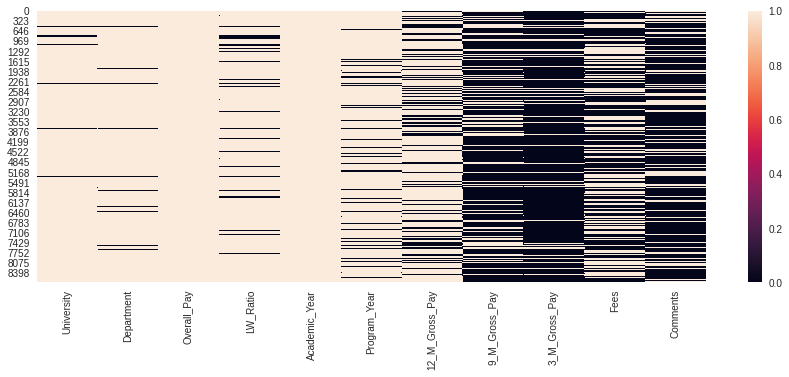

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(stip.notna())
plt.show()

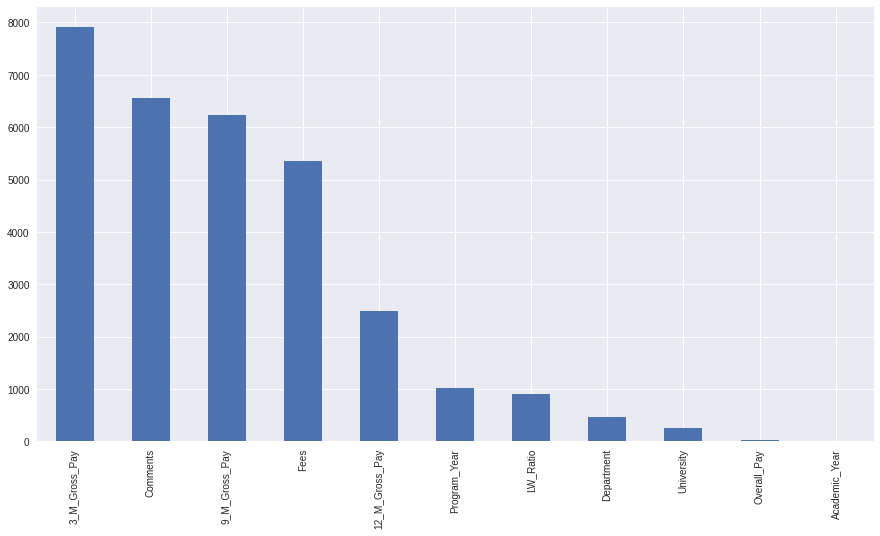

In [ ]:
stip.isnull().sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,8), logy=False)

In [ ]:
# Overall pay should probably be recoded to value ranges - remove the $ in a first step and save as integers
# Academic Year: extract the start year and recode to numeric! 2021-2022? 
# ... why not ... these students just already know the size of their stipend as well as of their fees ...
# create meaningful groups to get rid of the values occurring only once!? (College of Charleston: € Universities!?)
# relationship between 3/9/12M gross pays? recode to numeric after removing the $ sign!
# comments: of any relevance!?! -> probably: just forget about them!? ev helpful to explain low salaries?!?? ;)

for var in stip.columns:
    print("---- %s ---" % var)
    print(stip[var].value_counts(dropna=False))

---- University ---
NaN                                                 263
Duke University (DU)                                172
University of North Carolina - Chapel Hill (UNC)    146
University of California - Berkeley                 140
University of Michigan - Ann Arbor (UM)             135
                                                   ... 
NANYANG TECHNOLOGICAL UNIVERSITY                      1
UC Berkeley                                           1
Rowan University                                      1
Bath                                                  1
University of Georgia                                 1
Name: University, Length: 693, dtype: int64
---- Department ---
NaN                                                    460
Chemistry                                              335
English                                                237
Psychology                                             212
Sociology                                              209
     

## EDA & NUMERIC VARIABLE CLEANING

In [ ]:
# recode program year to numeric, so that I can scatterplot it etc...

stip['PY_DR'] = stip.Program_Year.replace([('1st')], 1)
stip['PY_DR'] = stip.PY_DR.replace([('2nd')], 2)
stip['PY_DR'] = stip.PY_DR.replace([('3rd')], 3)
stip['PY_DR'] = stip.PY_DR.replace([('4th')], 4)
stip['PY_DR'] = stip.PY_DR.replace([('5th')], 5)
stip['PY_DR'] = stip.PY_DR.replace([('6th and up')], 6)

In [ ]:
stip['PY_DR'].value_counts(dropna=False)

1.0    4368
2.0    1071
NaN    1020
3.0     841
4.0     660
5.0     504
6.0     243
Name: PY_DR, dtype: int64

In [ ]:
stip.PY_DR = pd.to_numeric(stip.PY_DR)
stip.PY_DR = stip.PY_DR.astype('Int64')

(array([4368., 1071.,  841.,  660.,  504.,  243.]),
 array([1.0, 1.8333333333333335, 2.666666666666667, 3.5, 4.333333333333334,
        5.166666666666667, 6.0], dtype=object),
 <a list of 6 Patch objects>)

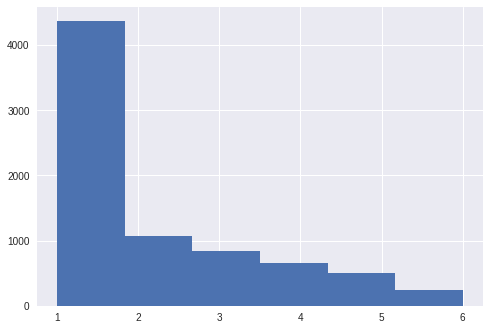

In [ ]:
plt.hist(stip.PY_DR.dropna(), bins=6) # -> log scale would be nicer -> much better :)    #log=True, bins=18, range=(2002, 2020))         

In [ ]:
stip['Acad_Y'] = stip.Academic_Year.str.slice(0, 4)

# stip['Overall_Pay_2'] = stip['Overall_Pay'].str.slice(1, -1)
# bad idea!
# I lost some unique values by cutting off by position! try to remove the $ sign instead!!

In [ ]:
stip['Acad_Y'].describe()

count     8703
unique      20
top       2016
freq      2198
Name: Acad_Y, dtype: object

In [ ]:
stip['Acad_Y'].unique()

array(['2020', '2019', '2017', '2015', '2016', '2018', '2011', '2010',
       '2009', '2021', '2002', '2006', '2013', '2012', '2014', '2007',
       nan, '2008', '2003', '2005', '2004'], dtype=object)

In [ ]:
stip.Acad_Y = pd.to_numeric(stip.Acad_Y)
stip.Acad_Y = stip.Acad_Y.astype('Int64')

In [ ]:
stip['Acad_Y'].describe()

count    8703.000000
mean     2017.053660
std         2.055927
min      2002.000000
25%      2016.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: Acad_Y, dtype: float64

(array([   6.,    4.,    3.,    5.,   14.,   16.,    8.,   14.,   27.,
          41.,   41.,   97.,  556.,  427., 2198., 1197., 1911., 2136.]),
 array([2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
        2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0,
        2018.0, 2019.0, 2020.0], dtype=object),
 <a list of 18 Patch objects>)

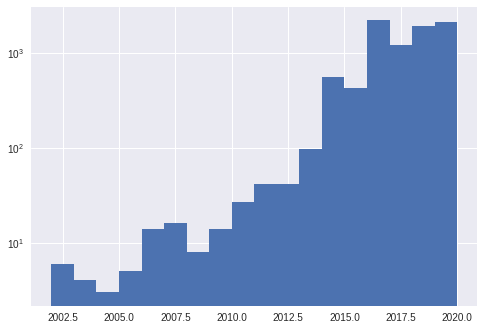

In [ ]:
# -> EXCLUDE THE YEAR WITHOUT ANY OBSERVATIONS?!?!?
# my bins are not too perfect yet ;) ... note however: there seems to be a year completely lacking observations!!!

plt.hist(stip.Acad_Y.dropna(), log=True, bins=18, range=(2002, 2020)) # -> log scale would be nicer -> much better :)            

# dropna=True does not work here ... -> use .dropna() instead !!

In [ ]:
stip.Overall_Pay.describe()

count        8686
unique       2600
top       $30,000
freq          330
Name: Overall_Pay, dtype: object

In [ ]:
stip.Overall_Pay.value_counts(dropna=False)

$30,000    330
$25,000    220
$24,000    217
$20,000    181
$27,000    170
          ... 
$20,320      1
$28,292      1
$2,884       1
$14,250      1
$22,760      1
Name: Overall_Pay, Length: 2601, dtype: int64

In [ ]:
stip['Overall_Pay_num'] = stip.Overall_Pay.str.replace('$', '')

# also commas were not interpretable ... -> remove them as well:

stip['Overall_Pay_num'] = stip.Overall_Pay_num.str.replace(',', '')

In [ ]:
stip.Overall_Pay_num.describe()

count      8686
unique     2600
top       30000
freq        330
Name: Overall_Pay_num, dtype: object

In [ ]:
stip['Overall_Pay_num'] = pd.to_numeric(stip.Overall_Pay_num)

In [ ]:
# doublecheck, whether e.g. the 10 most frequent values of the original variable match those of my recoded one!! ;)

stip.Overall_Pay_num.value_counts().sort_values(ascending=False)       #.plot.bar()

30000.0    330
25000.0    220
24000.0    217
20000.0    181
27000.0    170
          ... 
28470.0      1
18058.0      1
25412.0      1
43692.0      1
35280.0      1
Name: Overall_Pay_num, Length: 2600, dtype: int64

In [ ]:
stip.Overall_Pay_num = stip.Overall_Pay_num.astype('Int64')

In [ ]:
type(stip['Overall_Pay_num'][0])

numpy.int64

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.578e+03, 9.500e+01,
        9.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-900000.0, -710600.0, -521200.0, -331800.0, -142400.0, 47000.0,
        236400.0, 425800.0, 615200.0, 804600.0, 994000.0], dtype=object),
 <a list of 10 Patch objects>)

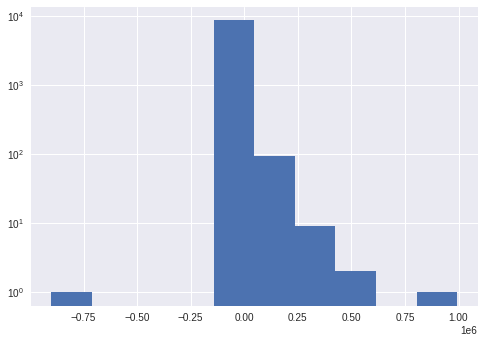

In [ ]:
# Extremely high Overall Pay values: everything above 100k includes extra earnings for sure!?? Won lottery, Erbschaften ... ??? ;) ??

plt.hist(stip.Overall_Pay_num.dropna(), log=True) # -> there seem to be crazy min & max values... !?

In [ ]:
uniqueOP = stip.Overall_Pay_num.unique()#.sort(ascending=False)[0:20]
len(uniqueOP)

2601

In [ ]:
#sorted(uniqueOP)#[-40:-1]

In [ ]:
stip.Overall_Pay_num.isna().sum(axis=0)

21

In [ ]:
stip.Overall_Pay_num = stip.Overall_Pay_num.replace([np.nan], 0)
stip.Overall_Pay_num.isna().sum(axis=0)    #value_counts(dropna=False)

0

In [ ]:
# Overall Pay kann durchaus negative Werte annehmen: wenn die Semestergebühren höher sind als das Einkommen ...

neg = stip.loc[stip['Overall_Pay_num']<0]
len(neg)

74

In [ ]:
neg

# looks like they have to pay fees, they earn money (gross pay), and overall pay = gross pay - fees ? :) -> check!

University              Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay     Fees                              Comments  PY_DR  Acad_Y  Overall_Pay_num
226                             DePaul University     School of Computing     $-4,600       NaN     2020-2021          1st            NaN        $2,200           NaN   $6,800                                   NaN      1    2020            -4600
231                       Northcentral University               Education       $-250     -0.01     2020-2021          3rd            NaN           NaN           NaN     $250                                   NaN      3    2020             -250
270                   Texas Tech University (TTU)              Mechanical    $-29,000     -1.43     2020-2021          NaN            NaN           NaN           NaN  $29,000                                   NaN   <NA>    2020           -29000
304              Carnegie Mellon University (CMU)            Neuroscience    $-14,378     -0.69     2020-2021          1st        $33,204           NaN           NaN  $47,582                                   NaN      1    2020           -14378
305                    University of Pennsylvania  Mechanical Engineering     $-6,743     -0.28     2020-2021          NaN        $34,500           NaN           NaN  $41,243                                   NaN   <NA>    2020            -6743
...                                           ...                     ...         ...       ...           ...          ...            ...           ...           ...      ...                                   ...    ...     ...              ...
8126                           Indiana University               Economics     $-4,000     -0.23     2014-2015          1st         $1,000           NaN           NaN   $5,000                                   NaN      1    2014            -4000
8271  Texas A&amp;M; University - College Station       Political Science       $-500       NaN     2015-2016          1st         $1,800           NaN           NaN   $2,300                                   NaN      1    2015             -500
8323       North Carolina State University (NCSU)       Civil Engineering       $-469     -0.02     2013-2014          4th         $1,800           NaN           NaN   $2,269                                   NaN      4    2013             -469
8389                                          NaN                     NaN    $-11,800       NaN     2014-2015          NaN         $2,200           NaN           NaN  $14,000                                   NaN   <NA>    2014           -11800
8440                   University of Chicago (UC)               Sociology     $-3,000     -0.14     2014-2015   6th and up            NaN           NaN           NaN   $3,000  Our stipends end after the 5th year.      6    2014            -3000

[74 rows x 14 columns]

In [ ]:
stip['12_M_Gross_Pay'].describe()

count        6209
unique       1275
top       $30,000
freq          418
Name: 12_M_Gross_Pay, dtype: object

In [ ]:
stip['GrossPay_12M'] = stip['12_M_Gross_Pay'].str.replace('$', '')
stip.GrossPay_12M = stip.GrossPay_12M.str.replace(',', '')

In [ ]:
stip.GrossPay_12M.describe()

count      6209
unique     1275
top       30000
freq        418
Name: GrossPay_12M, dtype: object

In [ ]:
stip.GrossPay_12M = pd.to_numeric(stip.GrossPay_12M)
stip.GrossPay_12M = stip.GrossPay_12M.astype('Int64')

In [ ]:
stip.GrossPay_12M = stip.GrossPay_12M.replace([np.nan], 0)
stip.GrossPay_12M.value_counts(dropna=False)

0        2498
30000     418
25000     312
24000     274
32000     207
         ... 
38376       1
31714       1
1327        1
43992       1
NaN         0
Name: GrossPay_12M, Length: 1277, dtype: Int64

In [ ]:
stip.GrossPay_12M.describe() # 1M guy: again rather unlikely... -> explore further!!!

count       8707.000000
mean       20138.107729
std        22090.409654
min            0.000000
25%            0.000000
50%        24000.000000
75%        30000.000000
max      1000000.000000
Name: GrossPay_12M, dtype: float64

(array([8.678e+03, 1.300e+01, 6.000e+00, 7.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.0, 100000.0, 200000.0, 300000.0, 400000.0, 500000.0, 600000.0,
        700000.0, 800000.0, 900000.0, 1000000.0], dtype=object),
 <a list of 10 Patch objects>)

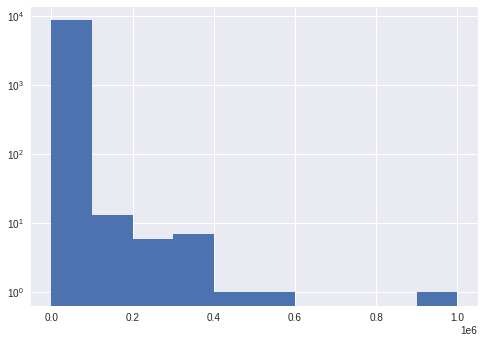

In [ ]:
# top values around 100-500k/y can impossibly be stipends...!?

plt.hist(stip.GrossPay_12M.dropna(), log=True) # -> top value: investigate further!

In [ ]:
unique12 = stip.GrossPay_12M.unique()#.sort(ascending=False)[0:20]
len(unique12)

1276

In [ ]:
# sorted(unique12)[-40:-1]

In [ ]:
# 3ry year Computer Science @MIT: fees = 40k !?!??

stip.loc[stip.GrossPay_12M > 50000]

# neg = stip.loc[stip['Overall_Pay_num']<0]

University                           Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay    Fees                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M
34                          Columbia University (CU)            Neurobiology and Behavior     $51,000      1.72     2020-2021          5th        $51,000           NaN           NaN     NaN                                                NaN      5    2020            51000         51000
95                        University of Pennsylvania                                  NaN     $51,000      2.12     2020-2021          1st        $51,000           NaN           NaN     NaN                                                NaN      1    2020            51000         51000
160                                              NaN                                  NaN     $90,000       NaN     2020-2021          NaN        $90,000           NaN           NaN     NaN                                                NaN   <NA>    2020            90000         90000
241         Ecole Polytechnique Federale de Lausanne    Doctoral Program Computer Science     $53,600       NaN     2020-2021          1st        $53,600           NaN           NaN     NaN                                                NaN      1    2020            53600         53600
531                   Arizona State University (ASU)                                  NaN    $122,272      5.51     2020-2021          1st       $122,272           NaN           NaN     NaN                                                NaN      1    2020           122272        122272
...                                              ...                                  ...         ...       ...           ...          ...            ...           ...           ...     ...                                                ...    ...     ...              ...           ...
8334  Georgia Institute of Technology (Georgia Tech)  Electrical and Computer Engineering     $48,083      2.29     2014-2015          2nd        $51,500           NaN           NaN  $3,417  5500 is supplemental fellowship from the schoo...      2    2014            48083         51500
8384     Texas A&amp;M; University - College Station                           Statistics     $65,000       NaN     2011-2012          NaN        $65,000           NaN           NaN     NaN                                                NaN   <NA>    2011            65000         65000
8385     Texas A&amp;M; University - College Station                           Statistics     $65,000       NaN     2010-2011          NaN        $65,000           NaN           NaN     NaN                                                NaN   <NA>    2010            65000         65000
8386               University of Louisville (U of L)                         Biochemistry     $71,000      4.12     2003-2004          4th        $71,000           NaN           NaN     NaN                                                NaN      4    2003            71000         71000
8674                              University of Utah                             business    $220,000     11.21           NaN          NaN       $220,000           NaN           NaN     NaN                                                NaN   <NA>    <NA>           220000        220000

[86 rows x 15 columns]

In [ ]:
stip['9_M_Gross_Pay'].describe()

count        2474
unique        748
top       $18,000
freq          168
Name: 9_M_Gross_Pay, dtype: object

In [ ]:
stip['GrossPay_9M'] = stip['9_M_Gross_Pay'].str.replace('$', '')
stip.GrossPay_9M = stip.GrossPay_9M.str.replace(',', '')

In [ ]:
stip.GrossPay_9M.describe()

count      2474
unique      748
top       18000
freq        168
Name: GrossPay_9M, dtype: object

In [ ]:
stip.GrossPay_9M = pd.to_numeric(stip.GrossPay_9M)
stip.GrossPay_9M = stip.GrossPay_9M.astype('Int64')

In [ ]:
stip.GrossPay_9M = stip.GrossPay_9M.replace([np.nan], 0)
stip.GrossPay_9M.value_counts(dropna=False)

0        6233
18000     168
20000     156
15000      93
25000      80
         ... 
18300       1
20820       1
18268       1
16726       1
NaN         0
Name: GrossPay_9M, Length: 750, dtype: Int64

In [ ]:
stip.GrossPay_9M.describe()    # 189 k in 9 Months!? not bad!?!?!?!? ...

count      8707.000000
mean       5568.039853
std       10042.148903
min           0.000000
25%           0.000000
50%           0.000000
75%       13490.500000
max      189600.000000
Name: GrossPay_9M, dtype: float64

(array([7.437e+03, 1.240e+03, 2.100e+01, 2.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0.0, 18960.0, 37920.0, 56880.0, 75840.0, 94800.0, 113760.0,
        132720.0, 151680.0, 170640.0, 189600.0], dtype=object),
 <a list of 10 Patch objects>)

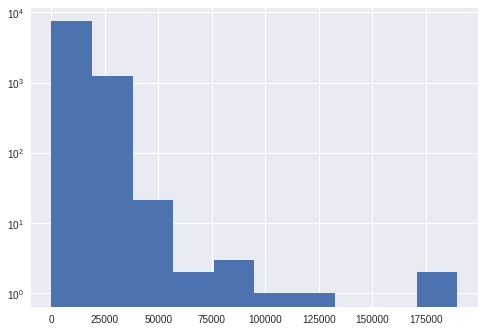

In [ ]:
plt.hist(stip.GrossPay_9M.dropna(), log=True) # -> top value: investigate further! (much more reasonable than @12M!?)

In [ ]:
unique9 = stip.GrossPay_9M.unique()#.sort(ascending=False)[0:20]
len(unique9)

749

In [ ]:
sorted(unique9)[-20:-1]

[38545,
 40000,
 41885,
 43000,
 44560,
 45000,
 46000,
 47995,
 52593,
 53595,
 54587,
 56899,
 67000,
 77400,
 87467,
 90000,
 101280,
 120000,
 180000]

In [ ]:
# DECISION: CUT @60k (8 top value obs removed)
# 3ry year Computer Science @MIT: fees = 40k !?!??

stip.loc[stip.GrossPay_9M > 35000].sort_values(by = ['GrossPay_9M'], ascending=0)

# neg = stip.loc[stip['Overall_Pay_num']<0]

University                              Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay     Fees                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M
3390     Georgia Institute of Technology (Georgia Tech)                               Economics    $192,840      8.28     2018-2019          2nd            NaN      $189,600        $4,000     $760  Parking is $700-$800/year, cheapest campus hou...      2    2018           192840             0       189600
2537        Texas A&amp;M; University - College Station                            Neuroscience    $179,950       NaN     2018-2019          1st            NaN      $180,000           NaN      $50                                                NaN      1    2018           179950             0       180000
2302                University of California - Berkeley                        COMPUTER SCIENCE    $120,000      4.32     2018-2019          NaN            NaN      $120,000           NaN      NaN                                                NaN   <NA>    2018           120000             0       120000
513                   University of Texas - Austin (UT)                                     NaN    $101,280      4.44     2020-2021          1st            NaN      $101,280           NaN      NaN                                                NaN      1    2020           101280             0       101280
6757      New Mexico Institute of Mining and Technology                               Economics     $90,000      4.50     2016-2017          NaN            NaN       $90,000           NaN      NaN                                                NaN   <NA>    2016            90000             0        90000
10                                 Duke University (DU)                             environment     $87,467      3.94     2020-2021          1st            NaN       $87,467           NaN      NaN                                                NaN      1    2020            87467             0        87467
5712             University of California - Davis (UCD)                                     MAE     $77,400      3.23     2016-2017          3rd            NaN       $77,400           NaN      NaN                                                NaN      3    2016            77400             0        77400
6639                                    Anna University                                   civil     $84,000       NaN     2015-2016          2nd            NaN       $67,000       $45,000  $28,000                                                NaN      2    2015            84000             0        67000
5849                     University of Arizona (U of A)                              Chemistry       $6,344      0.31     2017-2018          1st            NaN       $56,899           NaN  $50,555                                                NaN      1    2017             6344             0        56899
5850            University of California - Irvine (UCI)       Materials Science and Engineering     $22,500      0.77     2017-2018          1st            NaN       $54,587           NaN  $32,087  32087 to cover Tuition, Insurance. Plus 2500/m...      1    2017            22500             0        54587
4691                 Purdue University - West Lafayette                  Engineering Education      $52,695      2.49     2017-2018          1st            NaN       $53,595           NaN     $900                                                NaN      1    2017            52695             0        53595
4600                                      Virginia Tech                               Chemistry     $47,393      2.25     2017-2018          1st            NaN       $52,593           NaN   $5,200                                                NaN      1    2017            47393             0        52593
4078                                      Virginia Tec

In [ ]:
stip['3_M_Gross_Pay'].describe()

count        798
unique       210
top       $3,000
freq         101
Name: 3_M_Gross_Pay, dtype: object

In [ ]:
stip['GrossPay_3M'] = stip['3_M_Gross_Pay'].str.replace('$', '')
stip.GrossPay_3M = stip.GrossPay_3M.str.replace(',', '')

stip.GrossPay_3M = pd.to_numeric(stip.GrossPay_3M)
stip.GrossPay_3M = stip.GrossPay_3M.astype('Int64')

In [ ]:
# Experiment: Interpretate all NaN in GrossPay columns as ZEROS -> replace NaNs ...

stip.GrossPay_3M = stip.GrossPay_3M.replace([np.nan], 0)
stip.GrossPay_3M.value_counts(dropna=False)

0        7909
3000      101
4000       98
5000       87
6000       44
         ... 
11960       1
3772        1
5991        1
8070        1
NaN         0
Name: GrossPay_3M, Length: 212, dtype: Int64

In [ ]:
stip.GrossPay_3M.describe()    # 56 k in 3 Months!? not bad!?!?!?!? ...

count     8707.000000
mean       462.201677
std       1844.074435
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      55816.000000
Name: GrossPay_3M, dtype: float64

(array([8.476e+03, 2.040e+02, 1.800e+01, 4.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0.0, 5581.6, 11163.2, 16744.800000000003, 22326.4, 27908.0,
        33489.600000000006, 39071.200000000004, 44652.8, 50234.4, 55816.0],
       dtype=object),
 <a list of 10 Patch objects>)

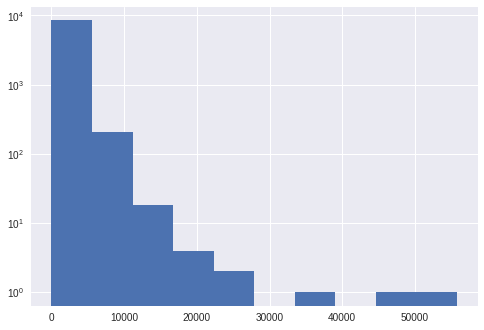

In [ ]:
plt.hist(stip.GrossPay_3M.dropna(), log=True) # -> top value: investigate further! (much more reasonable than @12M!?)

In [ ]:
unique3 = stip.GrossPay_3M.unique()#.sort(ascending=False)[0:20]
len(unique3)

211

In [ ]:
sorted(unique3)[-40:-1]

[8353,
 8500,
 8580,
 8593,
 8608,
 8800,
 8860,
 8951,
 9000,
 9240,
 9425,
 9588,
 9999,
 10000,
 10199,
 10485,
 10500,
 10956,
 11000,
 11300,
 11917,
 11960,
 12000,
 12868,
 13200,
 13230,
 13518,
 15000,
 15186,
 15680,
 15984,
 16548,
 17000,
 17204,
 18332,
 24000,
 25000,
 35000,
 45000]

In [ ]:
# DECISION: cut at 20k

stip.loc[stip.GrossPay_3M > 10000].sort_values(by='GrossPay_3M', ascending=0)

University                                     Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay     Fees                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M
3798               Johns Hopkins University (JHU)                                       Physics      $80,816      3.14     2019-2020          1st            NaN       $25,000       $55,816      NaN  9 more stipend for TA, additional stipend for ...      1    2019            80816             0        25000        55816
6639                              Anna University                                          civil     $84,000       NaN     2015-2016          2nd            NaN       $67,000       $45,000  $28,000                                                NaN      2    2015            84000             0        67000        45000
1012                    New York University (NYU)                                      Sociology     $63,000      2.12     2018-2019          4th            NaN       $28,000       $35,000      NaN                                                NaN      4    2018            63000             0        28000        35000
7534       University of Colorado - Boulder (UCB)                                      Sociology     $40,000      1.57     2016-2017          1st            NaN       $17,000       $25,000   $2,000                                                NaN      1    2016            40000             0        17000        25000
4175                                          NaN                                            NaN     $58,000       NaN     2018-2019          NaN            NaN       $34,000       $24,000      NaN                                                NaN   <NA>    2018            58000             0        34000        24000
8670           New Mexico State University (NMSU)                                      Astronomy     $29,804      1.76     2013-2014          4th            NaN       $16,665       $18,332   $5,193  Summer/Other includes $10,000 NM Space Grant F...      4    2013            29804             0        16665        18332
8064                     Stanford University (SU)                               Computer Science     $44,528      1.55     2015-2016          1st            NaN       $27,324       $17,204      NaN                                                NaN      1    2015            44528             0        27324        17204
7498                           Indiana University                                      Sociology     $32,000      1.48     2016-2017          NaN            NaN       $15,000       $17,000      NaN  I really cannot stress this enough--this depar...   <NA>    2016            32000             0        15000        17000
5715               Arizona State University (ASU)                                          SEMTE     $20,300      0.91     2016-2017          2nd            NaN        $5,100       $17,000   $1,800                                                NaN      2    2016            20300             0         5100        17000
1493                University of Washington (UW)                                      Astronomy     $40,398      1.74     2019-2020          3rd            NaN       $24,822       $16,548     $972  UW grad students are unionized so there is set...      3    2019            40398             0        24822        16548
1226       University of Colorado - Boulder (UCB)                           Computer Engineering     $38,960      1.53     2018-2019          3rd            NaN       $23,976       $15,984   $1,000                                                NaN      3    2018            38960             0        23976        15984
4356   University of Massachusetts - Lowell (UML)            Civil and Environmental Engineering     $29,480      1.06     2017-2018          1st            NaN       $13,800       $15,68

In [ ]:
stip['GrossPay_sumOf3'] = stip.GrossPay_3M + stip.GrossPay_9M + stip.GrossPay_12M
stip['GrossPay_sumOf3'].describe()

count       8707.000000
mean       26168.349259
std        19097.350698
min            0.000000
25%        20000.000000
50%        25860.000000
75%        31000.000000
max      1000000.000000
Name: GrossPay_sumOf3, dtype: float64

In [ ]:
stip.GrossPay_sumOf3.isna().sum(axis=0)

0

In [ ]:
type(stip.GrossPay_sumOf3[46])

numpy.int64

In [ ]:
# There are in fact 12 students with a GP of 0


stip.loc[stip.GrossPay_sumOf3 == 0]

University                                         Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay     Fees                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3
231                          Northcentral University                                          Education       $-250     -0.01     2020-2021          3rd            NaN           NaN           NaN     $250                                                NaN      3    2020             -250             0            0            0                0
270                      Texas Tech University (TTU)                                         Mechanical    $-29,000     -1.43     2020-2021          NaN            NaN           NaN           NaN  $29,000                                                NaN   <NA>    2020           -29000             0            0            0                0
997                            University of Windsor                                                NaN    $-10,000       NaN     2019-2020          4th            NaN           NaN           NaN  $10,000                                           No pay.       4    2019           -10000             0            0            0                0
1033                  Johns Hopkins University (JHU)  Bloomberg School of Public Health/PhD in Healt...    $-13,944     -0.54     2017-2018          5th            NaN           NaN           NaN  $13,944                                                NaN      5    2017           -13944             0            0            0                0
1276                        Columbia University (CU)                       Population and Family Health    $-50,000     -1.68     2018-2019          NaN            NaN           NaN           NaN  $50,000                                                NaN   <NA>    2018           -50000             0            0            0                0
1396                        University of Cambridge             Education /PhD full time (Creativities)    $-11,129       NaN     2019-2020          1st            NaN           NaN           NaN  $11,129  Unfunded., had to get a student loan to pay fo...      1    2019           -11129             0            0            0                0
1795                   University of Washington (UW)                           Health Services Research         NaN      0.00     2018-2019          NaN            NaN           NaN           NaN      NaN                                         No funding   <NA>    2018                0             0            0            0                0
1856                       University of Dayton (UD)                               Chemical Engineering         NaN      0.00     2019-2020          1st            NaN           NaN           NaN      NaN                                                NaN      1    2019                0             0            0            0                0
2564                            Yale University (YU)                                            Physics    $-40,000     -1.62     2018-2019          NaN            NaN           NaN           NaN  $40,000                                                NaN   <NA>    2018           -40000             0            0            0                0
4110                     Ohio State University (OSU)                                        Psychology          NaN      0.00     2019-2020          1st            NaN           NaN           NaN      NaN                                                NaN      1    2019                0             0            0            0                0
4140                                             NaN                                                NaN         NaN       NaN           NaN          NaN            NaN           NaN           NaN      NaN                                           

In [ ]:
# Fees = NAN: can mean that are yet unknown - do NOT REPLACE Fees = NAN by ZEROS, but try using k-NN to impute missing values here (>50% of valuable data have missing fees!)

In [ ]:
stip.Fees.describe()

count       3352
unique       769
top       $1,000
freq         214
Name: Fees, dtype: object

In [ ]:
stip['Fees_num'] = stip.Fees.str.replace('$', '')
stip['Fees_num'] = stip.Fees_num.str.replace(',', '')

In [ ]:
stip.Fees_num = pd.to_numeric(stip.Fees_num)
stip.Fees_num = stip.Fees_num.astype('Int64')

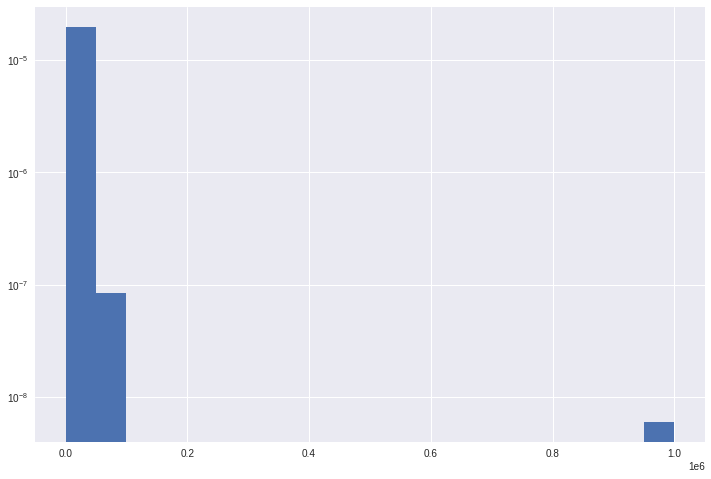

In [ ]:
# can a guy with fees of 60$ per year be a PhD student ????
# -> if we cut or upper-cap around 40k (fees), we keep true values for 99% of our PhD students (go back to feature-engineering...!)

# plot a cumulative histogram of fees :)

plt.figure(figsize=(12,8))
plt.hist(stip.Fees_num.dropna(), density=True, cumulative=False, log=True, bins=20)
plt.show()

In [ ]:
stip.Fees_num.value_counts(dropna=False).sort_values(ascending=False)[0:9]    # looks reasonable for majority of data, however a few extremely high values occur!

NaN     5355
1000     214
2000     204
500      161
1200     111
1500     105
3000      92
200       92
600       90
Name: Fees_num, dtype: Int64

In [ ]:
stip.Fees_num.describe()

count       3352.000000
mean        2869.667661
std        18471.151022
min            1.000000
25%          500.000000
50%         1005.500000
75%         2000.000000
max      1000000.000000
Name: Fees_num, dtype: float64

In [ ]:
# -> how many students indicated fees higher than 50'000 ?

crazy_fees = stip.loc[stip['Fees_num']>50000]
len(crazy_fees)

15

In [ ]:
crazy_fees

University                            Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay        Fees         Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3  Fees_num
766                    University of Chicago (UC)                          Linguistics      $31,000      1.28     2020-2021          1st        $98,000           NaN           NaN     $67,000              NaN      1    2020            31000         98000            0            0            98000     67000
767                          Duke University (DU)                               Nursing      $4,544      0.20     2020-2021          1st        $98,269           NaN           NaN     $93,725              NaN      1    2020             4544         98269            0            0            98269     93725
1951               Johns Hopkins University (JHU)                          Neuroscience    $-20,449     -0.80     2019-2020          2nd        $33,551           NaN           NaN     $54,000              NaN      2    2019           -20449         33551            0            0            33551     54000
2223           Purdue University - West Lafayette                               physics    $-80,000     -3.78     2019-2020          1st        $20,000           NaN           NaN    $100,000              NaN      1    2019           -80000         20000            0            0            20000    100000
2550                        University of Alberta        Earth and Atmospheric Sciences    $-32,208       NaN     2018-2019          1st        $24,000           NaN           NaN     $56,208              NaN      1    2018           -32208         24000            0            0            24000     56208
2933                         Princeton University                   Geological Sciences     $40,900      1.61     2019-2020          1st        $94,670           NaN           NaN     $53,770              NaN      1    2019            40900         94670            0            0            94670     53770
3350  University of California - San Diego (UCSD)                Information Technology   $-900,000    -34.01     2018-2019          2nd       $100,000           NaN           NaN  $1,000,000              NaN      2    2018          -900000        100000            0            0           100000   1000000
3834                                Virginia Tech                             education         NaN      0.00     2019-2020          5th        $76,666           NaN           NaN     $76,666             7777      5    2019                0         76666            0            0            76666     76666
5249                         Princeton University                     Political Science     $36,500      1.44     2017-2018          1st        $87,750           NaN           NaN     $51,250              NaN      1    2017            36500         87750            0            0            87750     51250
5395  University of California - San Diego (UCSD)  Mechanical and Aerospace Engineering    $-30,237     -1.14     2016-2017          1st        $26,763           NaN           NaN     $57,000              NaN      1    2016           -30237         26763            0            0            26763     57000
5555                                          NaN                                   NaN    $-59,999       NaN     2016-2017          NaN             $1           NaN           NaN     $60,000  Nothing to say    <NA>    2016           -59999             1            0            0                1     60000
5556                                          NaN                                   NaN    $-59,999       NaN     2016-2017          NaN             $1           NaN           NaN     $60,000  Nothing to say    <NA>    2016           -59999             1            0            0                1     60000
5849               University of Ar

In [ ]:
low_fees = stip.loc[stip.Fees_num < 200]
len(low_fees)

357

## SORRY ... NO K-NN IMPUTATION NEEDED HERE... MISSING FEES CAN BE CALCULATED BACK FROM OVERALL PAY ;) ...

In [ ]:
# GrossPay_sumOf3 - MISSING FEES = Overall Pay

stip['MissingFees_DR'] = stip.GrossPay_sumOf3 - stip.Overall_Pay_num

In [ ]:
stip['MissingFees_DR'].describe()

count     6604.000000
mean       637.951545
std       2036.937132
min          0.000000
25%          0.000000
50%          0.000000
75%        700.000000
max      50555.000000
Name: MissingFees_DR, dtype: float64

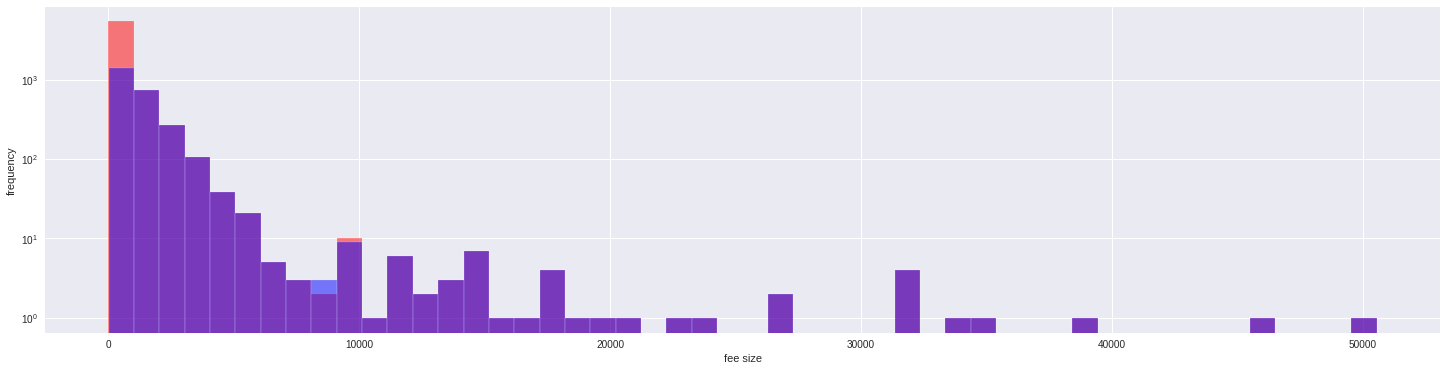

In [ ]:
# cutoff / upper-cap...?... crazy fees ... ... -> repeat when all clean :) ... but distributions look VERY similar!?!! :)
# create boxplot to compare missing fee values to available fee values :) or: overlay of 2 sns histograms ;)

# many more ZEROS!?!?!? ARE THESE VALUES CREDIBLE?????

plt.style.use('seaborn')
plt.figure(figsize = (25,6))
plt.hist(stip.MissingFees_DR, label = "Missing Fees", log=True, bins=50, alpha=0.5, color="red")              
plt.hist(stip.Fees_num.dropna(), label = "Available Fees", log=True, bins=50, alpha=0.5, color="blue")
# plt.hist(max_products_per_member, bins=8, label = "max_products_per_member", alpha=0.5, color="blue")
# plt.yscale("log")
plt.xlabel("fee size")
plt.ylabel("frequency")
plt.grid(True)
plt.show()


In [ ]:
fees_NAN = stip[['Fees_num', 'MissingFees_DR']]

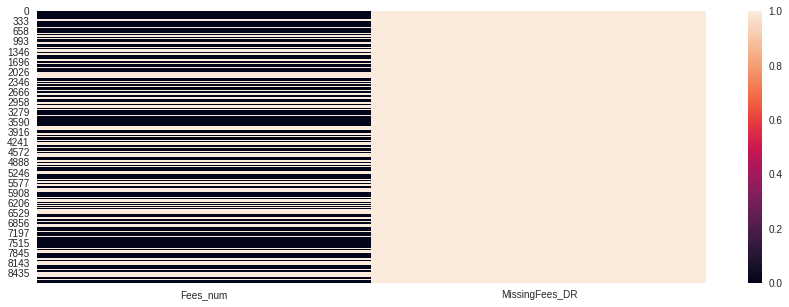

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(fees_NAN.notna())
plt.show()

In [ ]:
# compare whether calculated match indicated fees wherever fees were not missing: WOW... PERFECT MATCH ... THIS MUST HAVE BEEN REMOVED ON PURPOSE ;) ? ... ...

fee_countercheck = (stip.Fees_num == stip.MissingFees_DR)

In [ ]:
fee_countercheck.value_counts(dropna=False)

NaN     3993
True    2611
dtype: Int64

In [ ]:
# combine available and calculated fees in a common column -> not necessary... just use my calculated Fees throughout :)

# data['Home_Owner'] = np.where(data['Home_Owner'].isna(), data['Occupant_Type'], data['Home_Owner'])   # seems to be the solution: fixed the 9.7k NAN to 9.4k :))))
# data['Home_Owner'].value_counts(dropna=False)

stip['Fees_correct'] = stip.MissingFees_DR

In [ ]:
uniqueFees = stip.Fees_correct.unique()#.sort(ascending=False)[0:20]
len(uniqueFees)

641

In [ ]:
sorted(uniqueFees)[-40:-1]

[8157,
 9000,
 9100,
 9121,
 9286,
 10000,
 10500,
 11187,
 11206,
 11500,
 12000,
 12500,
 13000,
 13925,
 14000,
 14167,
 14500,
 15000,
 15130,
 15756,
 16985,
 17355,
 17581,
 17892,
 18000,
 18858,
 20000,
 20800,
 23000,
 24000,
 27086,
 31427,
 32000,
 32087,
 32121,
 33500,
 35000,
 38820,
 46500]

In [ ]:
# DECISION: cut fees @58k to stay on the safe side

# stip.loc[stip.Fees_correct > 35000].sort_values(by='Fees_correct', ascending=False)

? OVERALL PAY = GP3 + GP9 + GP12 -FEES ?

In [ ]:
stip['OP_DR'] = stip.GrossPay_sumOf3 - stip.Fees_num
stip['OP_doublecheck'] = stip.OP_DR - stip.Overall_Pay_num

In [ ]:
stip.OP_doublecheck.value_counts(dropna=False)

NaN    5355
0      3352
Name: OP_doublecheck, dtype: Int64

In [ ]:
stip.Overall_Pay_num.isna().sum(axis=0)

0

In [ ]:
stip.GrossPay_sumOf3.isna().sum(axis=0)

0

In [ ]:
# relationship between 3/9/12 M Gross Pay Values ??
# we know, what PhD students have earned in 3/9/12 months, but we always have just one of the 3 entries, right?!?!

gross_pay_dup3_12 = stip.loc[stip['12_M_Gross_Pay'] == 4 * stip['3_M_Gross_Pay']]
gross_pay_dup3_9 = stip.loc[stip['9_M_Gross_Pay'] == 3 * stip['3_M_Gross_Pay']]

In [ ]:
len(gross_pay_dup3_12)

0

In [ ]:
len(gross_pay_dup3_9)

0

In [ ]:
# question: if we have earnings for 12M, do we have earnings for 9M as well in some cases??

available_12M = stip.loc[stip.GrossPay_12M > 0]

# stip.drop(stip[(stip['12_M_Gross_Pay'] == 0)].index)
len(available_12M)

6209

In [ ]:
available_9M = stip.loc[stip.GrossPay_9M > 0]
len(available_9M)

2474

In [ ]:
available_3M = stip.loc[stip.GrossPay_3M > 0]

In [ ]:
len(available_3M)

798

In [ ]:
# students who earn sth per 9M, do not have another income per 12M, but gross pay per 3M can be combined with gp per 9M! :
# -> it looks like we have 329 observations with a value != NaN for both 3M and 9M gross pay!


available_3M.GrossPay_9M.unique()#value_counts(dropna=False)

<IntegerArray>
[30000, 22000, 25000, 18000, 21000,  1900, 18600, 14112, 20426, 25500,
 ...
 21580, 21560, 15300,  2351, 21334, 23319, 23800, 21573, 16100, 16665]
Length: 329, dtype: Int64

In [ ]:
stip.LW_Ratio.describe()

count    7796.000000
mean        1.075777
std         0.828874
min       -34.010000
25%         0.850000
50%         1.100000
75%         1.300000
max        40.970000
Name: LW_Ratio, dtype: float64

In [ ]:
stip.LW_Ratio.value_counts(bins=5)

(-4.018, 10.978]      7787
(10.978, 25.974]         7
(25.974, 40.97]          1
(-34.086, -19.014]       1
(-19.014, -4.018]        0
Name: LW_Ratio, dtype: int64

In [ ]:
stip.LW_Ratio.sort_values()[0:9]

3350   -34.01
2223    -3.78
7854    -2.63
1276    -1.68
4060    -1.66
2564    -1.62
790     -1.52
270     -1.43
5395    -1.14
Name: LW_Ratio, dtype: float64

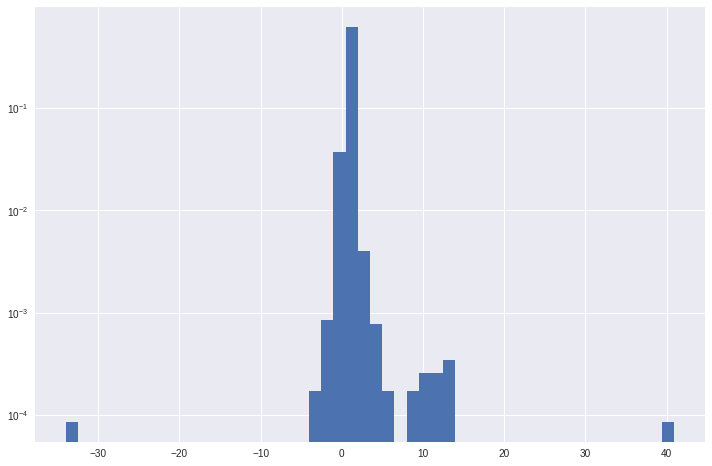

In [ ]:
# -> the LW_R of 40 looks like an error, whereas values around 8-14 might be reasonable? check where these guys study (live: impossible, unfortunately....)!

plt.figure(figsize=(12,8))
plt.hist(stip.LW_Ratio.dropna(), density=True, cumulative=False, log=True, bins=50)
plt.show()

In [ ]:
LW_huge = stip.loc[stip.LW_Ratio > 5]
len(LW_huge)

15

In [ ]:
# can a student with fees of 60$ per year in fact be a PhD student in Engineering ?? check cumulative histogram of fees!
# obs. 3111 does not add ANYTHING to our dataset, just contains a lot of outliers -> remove thie 1M GrossPayGuy !!

LW_huge

University                    Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay    Fees                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3  Fees_num  MissingFees_DR  Fees_correct   OP_DR  OP_doublecheck
531                      Arizona State University (ASU)                           NaN    $122,272      5.51     2020-2021          1st       $122,272           NaN           NaN     NaN                                                NaN      1    2020           122272        122272            0            0           122272      <NA>               0             0    <NA>            <NA>
1478                                  Dartmouth College  Thayer School of Engineering    $319,940     12.91     2018-2019          NaN       $320,000           NaN           NaN     $60                                                NaN   <NA>    2018           319940        320000            0            0           320000        60              60            60  319940               0
3070                            Harvard University (HU)                medical school    $350,000     12.22     2018-2019          NaN       $350,000           NaN           NaN     NaN                                                NaN   <NA>    2018           350000        350000            0            0           350000      <NA>               0             0    <NA>            <NA>
3111             Illinois Institute of Technology (IIT)                       Finance    $994,000     40.97     2018-2019          1st     $1,000,000           NaN           NaN  $6,000                                                NaN      1    2018           994000       1000000            0            0          1000000      6000            6000          6000  994000               0
3390     Georgia Institute of Technology (Georgia Tech)                     Economics    $192,840      8.28     2018-2019          2nd            NaN      $189,600        $4,000    $760  Parking is $700-$800/year, cheapest campus hou...      2    2018           192840             0       189600         4000           193600       760             760           760  192840               0
3418  University of Illinois - Urbana- Champaign (UIUC)    Curriculum and Instruction    $230,000     10.46     2018-2019          5th       $230,000           NaN           NaN     NaN                                                NaN      5    2018           230000        230000            0            0           230000      <NA>               0             0    <NA>            <NA>
3719   University of North Carolina - Chapel Hill (UNC)                      Strategy    $300,000     13.50     2018-2019          3rd       $300,000           NaN           NaN     NaN                                                NaN      3    2018           300000        300000            0            0           300000      <NA>               0             0    <NA>            <NA>
4290                       Northwestern University (NU)                    statistics    $310,000     12.78     2018-2019          1st       $310,000           NaN           NaN     NaN                                                NaN      1    2018           310000        310000            0            0           310000      <NA>               0             0    <NA>            <NA>
5057            University of Southern California (USC)           Biological sciences    $340,000     13.14     2016-2017          4th       $340,000           NaN           NaN     NaN                                                NaN      4    2016           340000        340000            0            0           340000      <NA>               0             0    <NA>            <NA>
5772      University of California - Los Angeles (UCLA)              computer science    $275,000     10.63     2016-2017          1st       $275

In [ ]:
LW_neg = stip.loc[stip.LW_Ratio < 0]
len(LW_neg)

57

In [ ]:
# negative values for LW_Ratio just don't make sense, do they ???

# shouldn't Universities more or less correlate with LW_Ratios? Do they reflect the place students are living, not where they are studying? This high discrepancies !?!?!?
# -> check whether LW_Ratio is usually constant for all students studying at the same University!

LW_neg.sort_values('LW_Ratio')



University                                         Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay        Fees                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3  Fees_num  MissingFees_DR  Fees_correct    OP_DR  OP_doublecheck
3350        University of California - San Diego (UCSD)                             Information Technology   $-900,000    -34.01     2018-2019          2nd       $100,000           NaN           NaN  $1,000,000                                                NaN      2    2018          -900000        100000            0            0           100000   1000000         1000000       1000000  -900000               0
2223                 Purdue University - West Lafayette                                            physics    $-80,000     -3.78     2019-2020          1st        $20,000           NaN           NaN    $100,000                                                NaN      1    2019           -80000         20000            0            0            20000    100000          100000        100000   -80000               0
7854        Massachusetts Institute of Technology (MIT)                                      Environmental    $-73,344     -2.63     2015-2016          1st         $5,622           NaN           NaN     $78,966                                                NaN      1    2015           -73344          5622            0            0             5622     78966           78966         78966   -73344               0
1276                           Columbia University (CU)                       Population and Family Health    $-50,000     -1.68     2018-2019          NaN            NaN           NaN           NaN     $50,000                                                NaN   <NA>    2018           -50000             0            0            0                0     50000           50000         50000   -50000               0
4060                               Duke University (DU)                                  political science    $-37,000     -1.66     2018-2019          1st            NaN        $3,000           NaN     $40,000                                                NaN      1    2018           -37000             0         3000            0             3000     40000           40000         40000   -37000               0
2564                               Yale University (YU)                                            Physics    $-40,000     -1.62     2018-2019          NaN            NaN           NaN           NaN     $40,000                                                NaN   <NA>    2018           -40000             0            0            0                0     40000           40000         40000   -40000               0
790                       Oregon State University (OSU)  Chemical, Biological and Environmental Enginee...    $-31,790     -1.52     2020-2021          1st            NaN       $17,870           NaN     $49,660                                                NaN      1    2020           -31790             0        17870            0            17870     49660           49660         49660   -31790               0
270                         Texas Tech University (TTU)                                         Mechanical    $-29,000     -1.43     2020-2021          NaN            NaN           NaN           NaN     $29,000                                                NaN   <NA>    2020           -29000             0            0            0                0     29000           29000         29000   -29000               0
5395        University of California - San Diego (UCSD)               Mechanical and Aerospace Engineering    $-30,237     -1.14     2016-2017          1st        $26,763           NaN           NaN     $57,000                                                NaN      1    2016           -30237        

In [ ]:
MIT_studs = stip.loc[stip.University == 'Massachusetts Institute of Technology (MIT)']
MIT_studs.LW_Ratio.describe()

count    90.000000
mean      1.142000
std       0.622354
min      -2.630000
25%       1.165000
50%       1.320000
75%       1.430000
max       2.150000
Name: LW_Ratio, dtype: float64

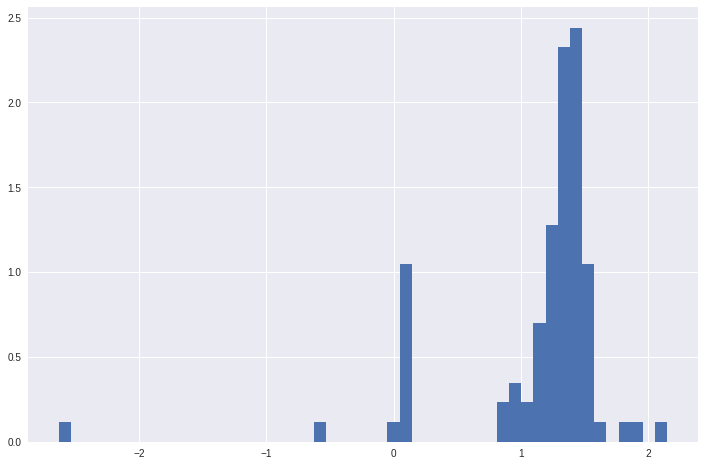

In [ ]:
# why are there still negative Ratios??? (even in cleaned DF!?)

plt.figure(figsize=(12,8))
plt.hist(MIT_studs.LW_Ratio.dropna(), density=True, cumulative=False, bins=50)
plt.show()

In [ ]:
# np.percentile(stip.Fees_correct, 50)

0.0

In [ ]:
# stip['LW_2groups'] = np.where((stip.LW_Ratio > 1.11), 'high-LW', 'low-LW')
# stip['LW_2groups'].value_counts(dropna=False)

low-LW     4943
high-LW    3764
Name: LW_2groups, dtype: int64

In [ ]:
stip.LW_Ratio.value_counts(bins=2)

(-34.086, 3.48]    7772
(3.48, 40.97]        24
Name: LW_Ratio, dtype: int64

In [ ]:
np.percentile(stip.LW_Ratio, 50)

nan

In [ ]:
stip['LW_2groups'] = np.where((stip.LW_Ratio > 1.11), 'high-LW', 'low-LW')
stip['LW_2groups'].value_counts(dropna=False)

low-LW     4943
high-LW    3764
Name: LW_2groups, dtype: int64

In [ ]:
stip.columns

Index(['University', 'Department', 'Overall_Pay', 'LW_Ratio', 'Academic_Year',
       'Program_Year', '12_M_Gross_Pay', '9_M_Gross_Pay', '3_M_Gross_Pay',
       'Fees', 'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num',
       'GrossPay_12M', 'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3',
       'Fees_num', 'OP_DR', 'OP_doublecheck'],
      dtype='object')

In [ ]:
stip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   University       8444 non-null   object 
 1   Department       8247 non-null   object 
 2   Overall_Pay      8686 non-null   object 
 3   LW_Ratio         7796 non-null   float64
 4   Academic_Year    8703 non-null   object 
 5   Program_Year     7687 non-null   object 
 6   12_M_Gross_Pay   6209 non-null   object 
 7   9_M_Gross_Pay    2474 non-null   object 
 8   3_M_Gross_Pay    798 non-null    object 
 9   Fees             3352 non-null   object 
 10  Comments         2155 non-null   object 
 11  PY_DR            7687 non-null   Int64  
 12  Acad_Y           8703 non-null   Int64  
 13  Overall_Pay_num  8707 non-null   Int64  
 14  GrossPay_12M     8707 non-null   Int64  
 15  GrossPay_9M      8707 non-null   Int64  
 16  GrossPay_3M      8707 non-null   Int64  
 17  GrossPay_sumOf

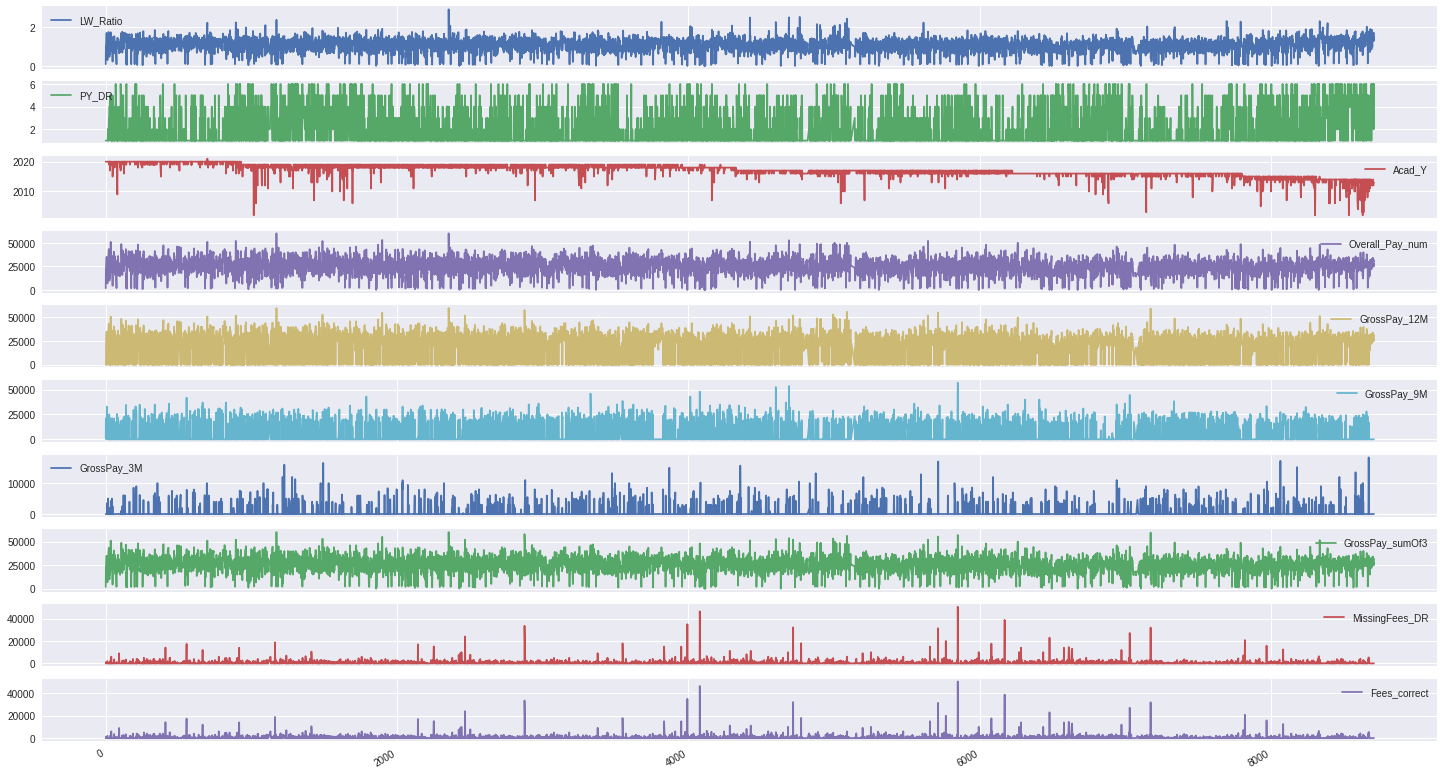

In [ ]:
stip.plot(subplots=True, figsize=(25,15))              # shit ... I have to solve my NAN problem :( ...
plt.show()

In [ ]:
stip.columns

Index(['University', 'Department', 'Overall_Pay', 'LW_Ratio', 'Academic_Year',
       'Program_Year', '12_M_Gross_Pay', '9_M_Gross_Pay', '3_M_Gross_Pay',
       'Fees', 'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num',
       'GrossPay_12M', 'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3',
       'Fees_num', 'MissingFees_DR', 'Fees_correct', 'OP_DR', 'OP_doublecheck',
       'LW_2groups'],
      dtype='object')

## !!! WAIT HERE! first finish cleaning -> -> below ... only in the end, extract variables for final df !!!


In [ ]:
# !!! FOR CODING LAZYNESS: !!

# stip = stip_new.copy()

NameError: ignored

In [ ]:
stip.columns

Index(['University', 'Department', 'LW_Ratio', 'Academic_Year', 'Program_Year',
       'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num', 'GrossPay_12M',
       'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3', 'Dep_DR',
       'Dep_DR_top14', 'GP9_binary', 'MissingFees_DR', 'Fees_correct'],
      dtype='object')

In [ ]:
stip.describe()

LW_Ratio        PY_DR       Acad_Y  Overall_Pay_num  GrossPay_12M   GrossPay_9M   GrossPay_3M  GrossPay_sumOf3  MissingFees_DR  Fees_correct
count  6604.000000  6604.000000  6604.000000      6604.000000   6604.000000   6604.000000   6604.000000      6604.000000     6604.000000   6604.000000
mean      1.069029     2.044670  2017.023773     25037.651726  19238.490612   5933.741672    503.370987     25675.603271      637.951545    637.951545
std       0.339477     1.470999     2.085020      8427.236394  14258.411803   9685.692004   1702.430264      8245.890376     2036.937132   2036.937132
min       0.000000     1.000000  2002.000000         0.000000      0.000000      0.000000      0.000000         0.000000        0.000000      0.000000
25%       0.860000     1.000000  2016.000000     20000.000000      0.000000      0.000000      0.000000     20600.000000        0.000000      0.000000
50%       1.110000     1.000000  2017.000000     25423.000000  24200.000000      0.000000      0.000000     26000.000000        0.000000      0.000000
75%       1.300000     3.000000  2018.000000     30500.000000  30000.000000  15000.000000      0.000000     31000.000000      700.000000    700.000000
max       2.900000     6.000000  2021.000000     60000.000000  60000.000000  56899.000000  18332.000000     60000.000000    50555.000000  50555.000000

In [ ]:
stip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6604 entries, 0 to 8706
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   University       6604 non-null   object 
 1   Department       6604 non-null   object 
 2   LW_Ratio         6604 non-null   float64
 3   Academic_Year    6604 non-null   object 
 4   Program_Year     6604 non-null   object 
 5   Comments         1761 non-null   object 
 6   PY_DR            6604 non-null   Int64  
 7   Acad_Y           6604 non-null   Int64  
 8   Overall_Pay_num  6604 non-null   Int64  
 9   GrossPay_12M     6604 non-null   Int64  
 10  GrossPay_9M      6604 non-null   Int64  
 11  GrossPay_3M      6604 non-null   Int64  
 12  GrossPay_sumOf3  6604 non-null   Int64  
 13  Dep_DR           6604 non-null   object 
 14  Dep_DR_top14     6604 non-null   object 
 15  GP9_binary       6604 non-null   object 
 16  MissingFees_DR   6604 non-null   Int64  
 17  Fees_correct  

In [ ]:
# create a sub-df containing only my nicely cleaned (+numeric!?) vars:

# stip_clean = stip[['University', 'Dep_DR_top12', 'LW_Ratio', 'LW_2groups', 'Academic_Year', 'Program_Year', 'PY_DR', 'GrossPay_3M', 'GrossPay_9M', 'GrossPay_12M', 'GrossPay_sumOf3', 'Fees_correct', 'Overall_Pay_num']]

In [ ]:
from google.colab import files

# stip_clean.to_csv('CLEAN_5429_reduced.csv')
# files.download('CLEAN_5429_reduced.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#get correlations of each features in dataset
corrmat = stip.corr()
top_corr_features = corrmat.index

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,12))
# plt.legend(loc='left')
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map

# plot heat map
g=sns.heatmap(stip[top_corr_features].corr(),annot=True,cmap="RdBu", mask=mask, fmt='.1g')

TypeError: ignored

## EDA & CATEGORIC VARIABLE CLEANING

In [ ]:
# 1 observation = 0.0148 % (relative frequency)

uni_names = stip.University.value_counts(dropna=False)                             # normalize=True
uni_names

NaN                                                 263
Duke University (DU)                                172
University of North Carolina - Chapel Hill (UNC)    146
University of California - Berkeley                 140
University of Michigan - Ann Arbor (UM)             135
                                                   ... 
NANYANG TECHNOLOGICAL UNIVERSITY                      1
UC Berkeley                                           1
Rowan University                                      1
Bath                                                  1
University of Georgia                                 1
Name: University, Length: 693, dtype: int64

In [ ]:
# misspellings ? ? ...

stip.University.nunique()

692

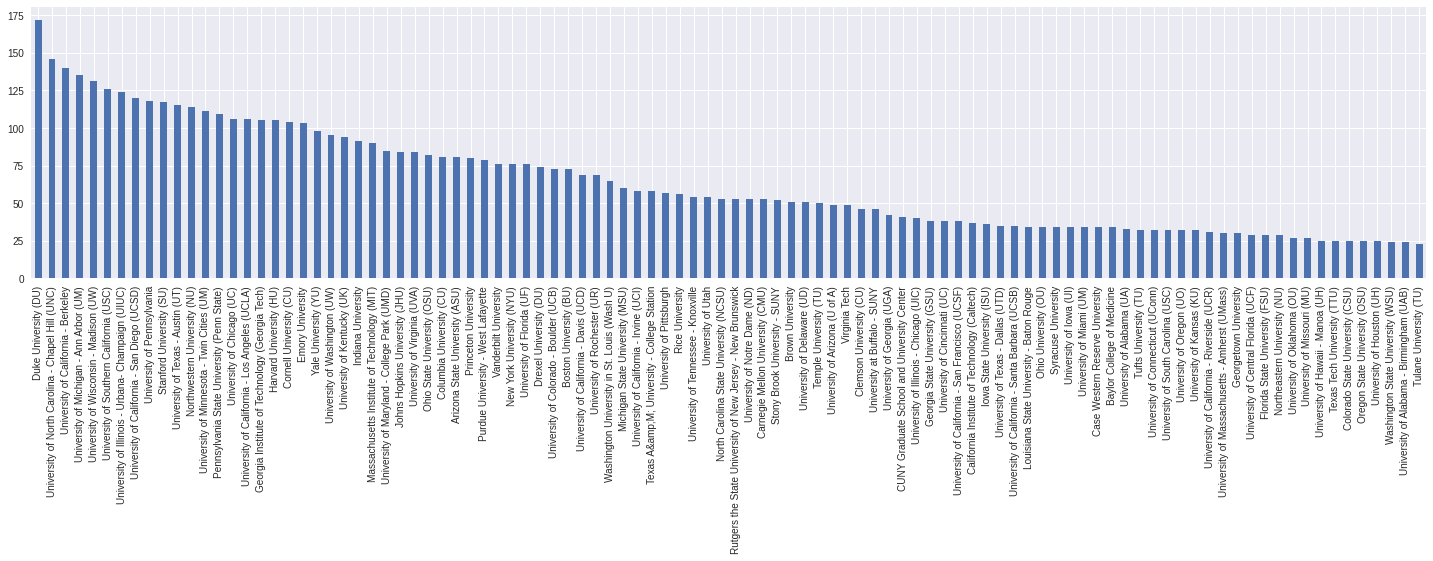

In [ ]:
# 100 most frequent universities: from Duke University (2.34%) to Tulane University (1.05%)

stip.University.value_counts()[0:100].plot(kind="bar", figsize=(25,5))

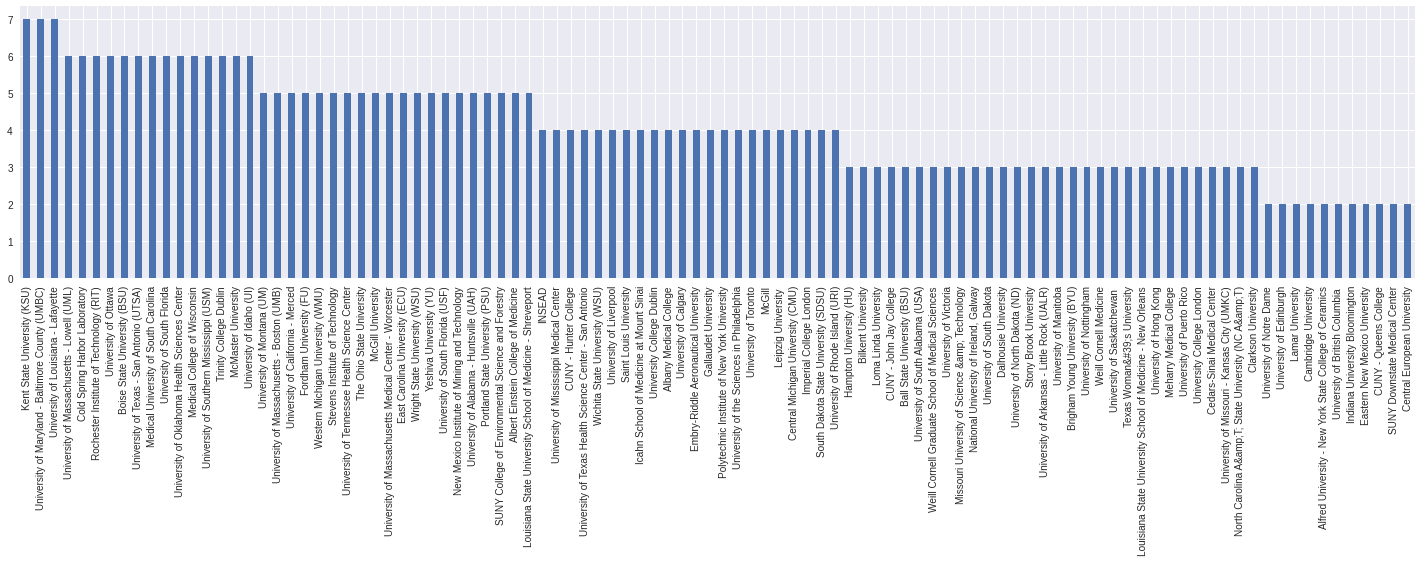

In [ ]:
# just delete these rows out for any comparison of different universities!! Cleaning not worthwile !!! ;)
# the last ~500 unis contain 1-6 obs ... cutting @20 might make sense? ... might be better however to cut where I can ensure not to have misspelling-duplicates... !?!?... tryout!

stip.University.value_counts()[-500:-400].plot(kind="bar", figsize=(25,5))

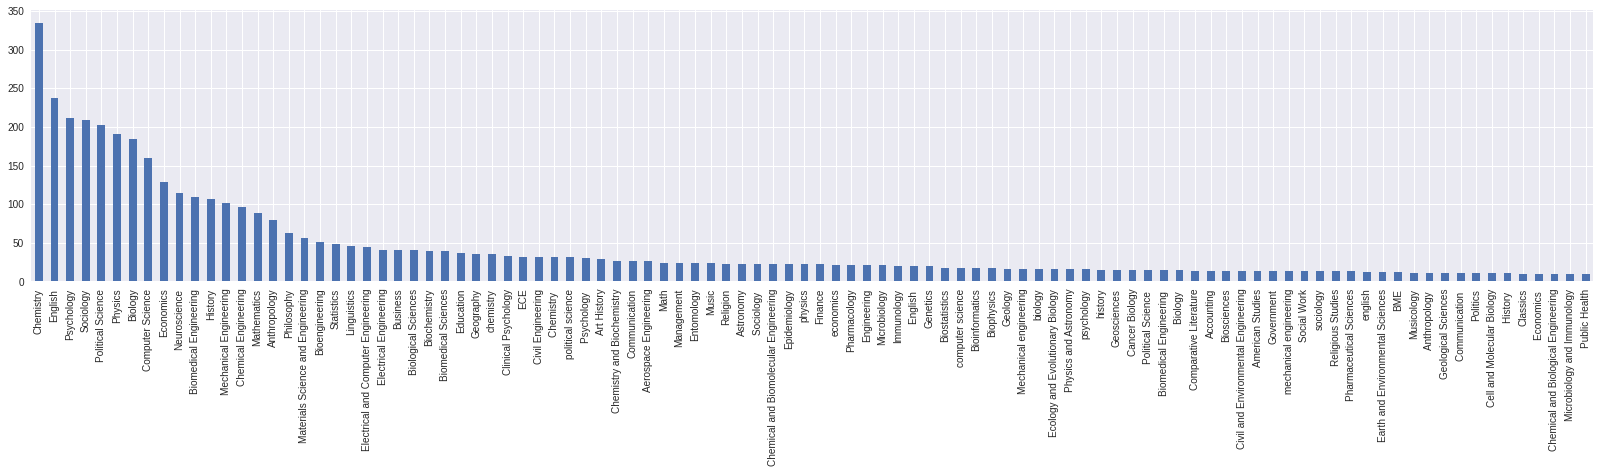

In [ ]:
# ! Dataset is slightly "biased towards Chemistry Departments" -> keep this in mind when interpreting results !

stip.Department.value_counts()[0:100].plot(kind="bar", figsize=(28,5))

In [ ]:
dept_names = stip.Dep_DR.value_counts().sort_values(ascending=False)
dept_names

HistPolSoc                        931
Engineering                       703
Biology                           475
Chemistry                         475
MathematicsAndComputer Science    435
                                 ... 
Applied Clinical Research           1
bcmb                                1
MOden Languages and Classics        1
Clinical Psychology Ph.D.           1
NEUROSCIENCE                        1
Name: Dep_DR, Length: 2359, dtype: int64

In [ ]:
# better than manually copying value names: extract list -> know misspellings for sure :) :



list(dept_names.index)


['HistPolSoc',
 'Engineering',
 'Biology',
 'Chemistry',
 'MathematicsAndComputer Science',
 'LinguisticsAndCommunication',
 'Medical',
 'PhysicsAndAstronomy',
 'BusinessAndManagement',
 'ArtsAndTheology',
 'Geography',
 'Education',
 'ECE',
 'Entomology',
 'American Studies',
 'BME',
 'Anthropology ',
 'Physics & Astronomy',
 'Kinesiology',
 'Chemical engineering',
 'Bioinformatics and Systems Biology',
 'MSTP',
 'Computer Science and Engineering',
 'Marketing',
 'Psychological Sciences',
 'Materials Science',
 'Mathematics ',
 'MCB',
 'Plant and Microbial Biology',
 'political science ',
 'BBSP',
 'Biomedical Science',
 'Computer Engineering',
 'Molecular and Cell Biology',
 'Political science',
 'Computer science',
 'Information Science',
 'Electrical engineering',
 'Neurobiology',
 'Medicine',
 'Nutrition',
 'Electrical',
 'Earth Sciences',
 'EECS',
 'Counseling Psychology',
 'Nursing',
 'Biological sciences',
 'Biomedical engineering',
 'Pharmaceutical Sciences PhD Program',
 'Exp

In [ ]:
list(dept_names[0:49].index)

['HistPolSoc',
 'Engineering',
 'Biology',
 'Chemistry',
 'MathematicsAndComputer Science',
 'LinguisticsAndCommunication',
 'Medical',
 'PhysicsAndAstronomy',
 'BusinessAndManagement',
 'ArtsAndTheology',
 'Geography',
 'Education',
 'ECE',
 'Entomology',
 'American Studies',
 'BME',
 'Anthropology ',
 'Physics & Astronomy',
 'Kinesiology',
 'Chemical engineering',
 'Bioinformatics and Systems Biology',
 'MSTP',
 'Computer Science and Engineering',
 'Marketing',
 'Psychological Sciences',
 'Materials Science',
 'Mathematics ',
 'MCB',
 'Plant and Microbial Biology',
 'political science ',
 'BBSP',
 'Biomedical Science',
 'Computer Engineering',
 'Molecular and Cell Biology',
 'Political science',
 'Computer science',
 'Information Science',
 'Electrical engineering',
 'Neurobiology',
 'Medicine',
 'Nutrition',
 'Electrical',
 'Earth Sciences',
 'EECS',
 'Counseling Psychology',
 'Nursing',
 'Biological sciences',
 'Biomedical engineering',
 'Pharmaceutical Sciences PhD Program']

In [ ]:
educ = stip.loc[stip.Dep_DR == 'Education']
len(educ)

61

In [ ]:
# !!! I also have to check, whether there are significant differences between 
#     any of the subgroups I am smashing into the same category in these recoding steps... !!!!

# include Chem & Biochem into Chem and cleanup spelling issues ...

stip['Dep_DR'] = stip.Department.replace([('Chemistry', 'Chemistry ', ' Chemistry', 'chemistry', 'chemistry', 'Chemistry and Biochemistry', 'Chemisty', 'Biochemistry', 'chemisty', 'Biochemistry ')], 'Chemistry')
# stip['Dep_DR'] = stip.Dep_DR.replace([( )], )


In [ ]:
# (Materials science included, since 56 unknown ...)

stip['Dep_DR'] = stip.Dep_DR.replace([('Biomedical Engineering', 'Mechanical Engineering', 'Chemical Engineering', 'mechanical engineering', 'Materials Science and Engineering', 'Bioengineering', 'Chemical and Biological Engineering', 'chemical engineering', 'Mechanical engineering',
                                       'Biomedical Engineering ', 'Civil and Environmental Engineering', 'Mechanical Engineering ', 'Environmental Engineering', 
                                       'Electrical and Computer Engineering', 'Civil Engineering', 'Aerospace Engineering', 'Chemical and Biomolecular Engineering', 'Electrical Engineering', 'Mechanical and Aerospace Engineering')], 'Engineering')

In [ ]:
stip['Dep_DR'] = stip.Dep_DR.replace([('Political Science', 'Politics', 'Public Policy', 'Government', 'political science', 'History', 'history', 'Sociology', 'Sociology ', 'sociology',  'Social Work', 'Political Science ', 'Psychology', 'psychology', 'Psychology ', 'History ')], 'HistPolSoc')

In [ ]:
stip['Dep_DR'] = stip.Dep_DR.replace([('Economics', 'Economics (Stern)', 'Business', 'Management', 'Economics ', 'economics')], 'BusinessAndManagement')


In [ ]:
stip['Dep_DR'] = stip.Dep_DR.replace([('Philosophy', 'Classics', 'Theology', 'Musicology', 'Art History', 'Music', 'Religion', 'Religious Studies')], 'ArtsAndTheology')

In [ ]:
stip['Dep_DR'] = stip.Dep_DR.replace([('Neuroscience', 'Epidemiology', 'Pharmacology', 'Immunology', 'Microbiology and Immunology', 'Neuroscience ', 'Clinical Psychology', 'Public Health', 'Pharmacology ', 'Pharmaceutical Sciences', 'Biomedical Sciences')], 'Medical')

In [ ]:
stip['Dep_DR'] = stip.Dep_DR.replace([('Geological Sciences', 'Geosciences', 'Earth Science', 'Earth and Environmental Sciences', 'Geology', 'Ecology')], 'Geography')

In [ ]:
stip['Dep_DR'] = stip.Dep_DR.replace([('Biology', 'biology', 'Anthropology', 'Biological Sciences', 'Microbiology', 'microbiology', 'Cancer Biology', 'Biology ', 'Genetics', 'Cell and Molecular Biology', 'Molecular Biology')], 'Biology')

In [ ]:
stip['Dep_DR'] = stip.Dep_DR.replace([('Biology', 'biology', 'Anthropology', 'Biological Sciences', 'Microbiology', 'microbiology', 'Ecology and Evolutionary Biology', 'Biosciences', 'Biological and Biomedical Sciences', 'Plant Pathology', 'Molecular and Cellular Biology')], 'Biology')

In [ ]:
stip['Dep_DR'] = stip.Dep_DR.replace([('Statistics', 'Biostatistics', 'statistics', 'Math', 'Finance', 'Accounting', 'Computer Science', 'computer science', 'Mathematics', 'Computer Science ', 'Bioinformatics', 'math')], 'MathematicsAndComputer Science')

In [ ]:
stip['Dep_DR'] = stip.Dep_DR.replace([('Astronomy', 'physics', 'Physics', 'Physics and Astronomy', 'Physics & Astronomy ', 'Physics ', 'Biophysics', 'Applied Physics')], 'PhysicsAndAstronomy')

In [ ]:
stip['Dep_DR'] = stip.Dep_DR.replace([('Curriculum and Instruction', 'Education ', 'Graduate School of Education')], 'Education')

In [ ]:
# what is the spelling of this English with 50 obs??? -> create list from pd series of the respective var :)

stip['Dep_DR'] = stip.Dep_DR.replace([('Linguistics', 'Communication', 'Communication ', 'English', 'English ', 'english', 'French', 'Comparative Literature', 'Spanish', 'Communication Sciences and Disorders')], 'LinguisticsAndCommunication')

In [ ]:
# use the 12 most frequent categories / smash NaN and all other into 1 common "others"-pot:

stip['Dep_DR_top14'] = stip.Dep_DR.copy()

In [ ]:
def simplifyDep_DR(value):
    if value not in ['Engineering', 'Chemistry', 'HistPolSoc', 'Biology', 'MathematicsAndComputer Science', 'Psychology', 'BusinessAndManagement', 'ArtsAndTheology', 'Medical', 'Geography', 'Biology', 
                     'PhysicsAndAstronomy', 'Education', 'LinguisticsAndCommunication']:
        return 'Other'
    else:
       return value

stip['Dep_DR_top14'] = stip['Dep_DR_top14'].apply(simplifyDep_DR)

In [ ]:
stip.Dep_DR_top14.value_counts(dropna=False).sort_values(ascending=False)   # , normalize=True

Other                             4132
HistPolSoc                         931
Engineering                        703
Biology                            475
Chemistry                          475
MathematicsAndComputer Science     435
LinguisticsAndCommunication        392
Medical                            302
PhysicsAndAstronomy                286
BusinessAndManagement              226
ArtsAndTheology                    182
Geography                          107
Education                           61
Name: Dep_DR_top14, dtype: int64

In [ ]:
stip.Overall_Pay_num.describe()

count      8707.000000
mean      25063.591478
std       21653.888223
min     -900000.000000
25%       19000.000000
50%       25000.000000
75%       30351.000000
max      994000.000000
Name: Overall_Pay_num, dtype: float64

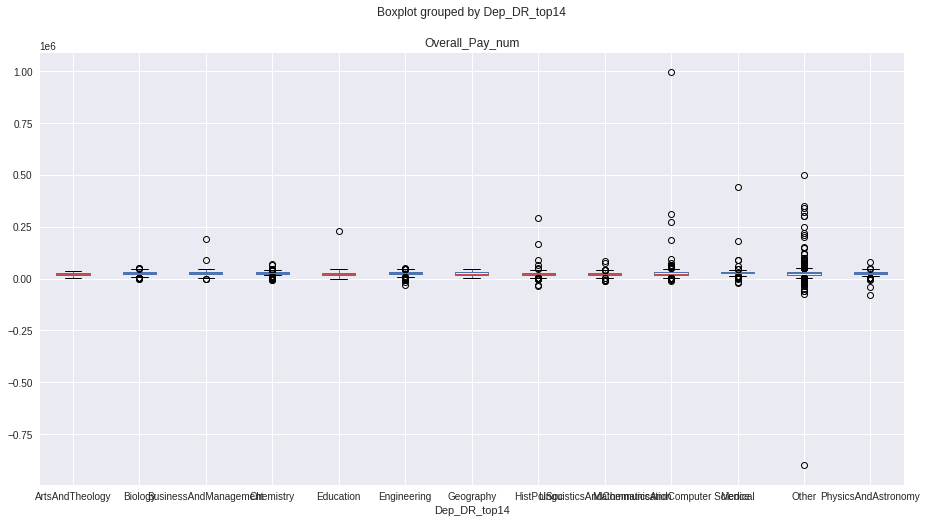

In [ ]:
# there are negative values for overall pay !!!?! -> CLEAN THESE OUT!!!
# IDEA: for numeric vars: .... OR: do not cut them off / upper-cap at all, just create equal-sized bins!?! :) :) :) -> Sole!!

# Problem 1: at which threshold do I start cutting off outliers? 
# -> go back to feature-engine techniques :)

stip.boxplot('Overall_Pay_num', by='Dep_DR_top14', figsize=(15,8)) 

In [ ]:
stip_no_other_unideptAbove6.columns

Index(['Unnamed: 0', 'University', 'Department', 'LW_Ratio', 'Academic_Year',
       'Program_Year', 'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num',
       'GrossPay_12M', 'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3',
       'Dep_DR', 'Dep_DR_top14', 'GP9_binary', 'MissingFees_DR',
       'Fees_correct', 'uni_and_dept', 'Overall_Pay_Corr'],
      dtype='object')

In [ ]:
stip_no_other_unideptAbove6['Overall_Pay_Corr'] = stip_no_other_unideptAbove6.Overall_Pay_num / stip_no_other_unideptAbove6.LW_Ratio

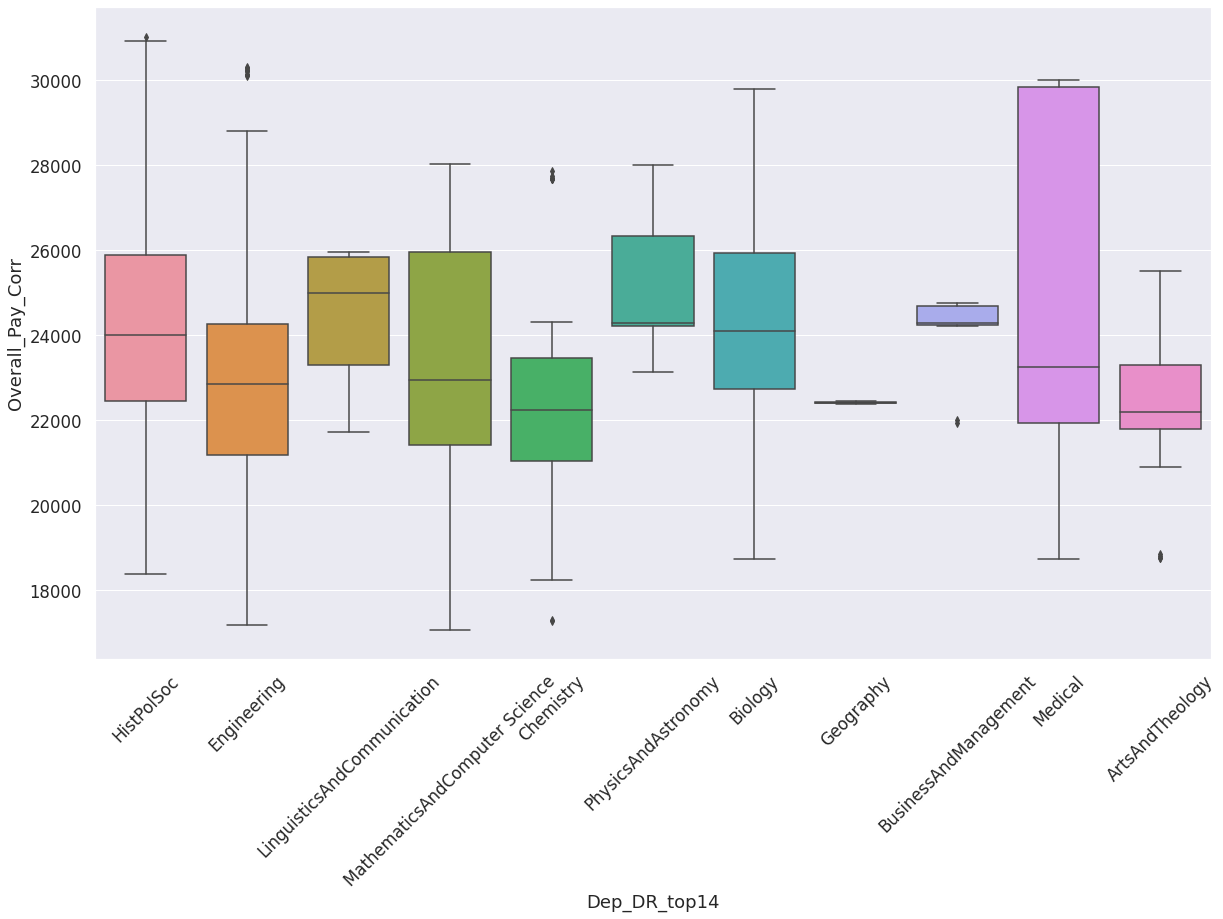

In [ ]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="Dep_DR_top14", y="Overall_Pay_Corr", data=stip_no_other_unideptAbove6)    #hue='target', 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

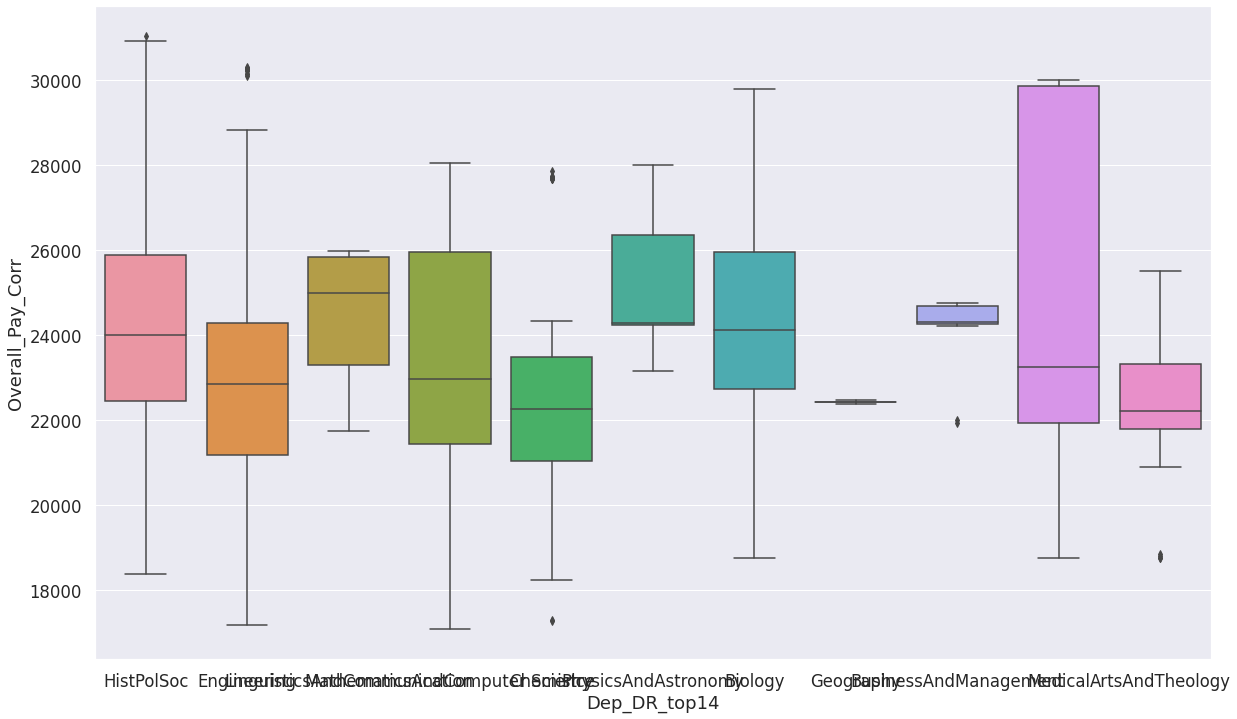

In [ ]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.5, palette='viridis')
sns.boxplot(x=stip_no_other_unideptAbove6["Dep_DR_top14"], y=stip_no_other_unideptAbove6["Overall_Pay_Corr"] )
plt.show()


In [ ]:
sns.stripplot(data=stip, x='Overall_Pay_num', y='Program_Year', jitter=True, hue='LW_2groups', dodge=True)

## ORDER OK NOW ?? ............ first recode categorical vars & DELETE ROWS OUT !!!, ONLY AFTER, CONTINUE RUNNING!!

In [ ]:
stud_per_uni = stip.University.value_counts(dropna=False)
stud_per_uni

Duke University (DU)                                    152
University of North Carolina - Chapel Hill (UNC)        131
University of Michigan - Ann Arbor (UM)                 121
University of California - Berkeley                     119
University of Southern California (USC)                 113
                                                       ... 
University of Nebraska Medical Center                     1
Marshall University                                       1
Rosalind Franklin University of Medicine and Science      1
SUNY Upstate Medical Center                               1
Jackson State University (JSU)                            1
Name: University, Length: 278, dtype: int64

In [ ]:
# It does not make any sense to include Universities having less than x observations -> where to cut ???

morethan19 = stud_per_uni.loc[stud_per_uni > 19]
morethan19

Duke University (DU)                                152
University of North Carolina - Chapel Hill (UNC)    131
University of Michigan - Ann Arbor (UM)             121
University of California - Berkeley                 119
University of Southern California (USC)             113
                                                   ... 
University of Missouri (MU)                          22
University of Alabama - Birmingham (UAB)             21
Washington State University (WSU)                    20
University of Houston (UH)                           20
Oklahoma State University (OSU)                      20
Name: University, Length: 99, dtype: int64

In [ ]:
stip_new = stip[stip.University.isin(list(morethan19.index))].copy()

# stip.University.isin(morethan19).value_counts() -> yields all-false -> create list from pd.Series & index needed!
# stip = stip.drop(stip[(stip.University is in morethan19 == True)].index) # no boolean needed here!

# function as below would be an option, if I was willing to manually write my selected unis into a list ... ;) :
'''
def simplifyDep_DR(value):
    if value not in ['Engineering', 'Chemistry', 'HistPolSoc', 'Biology', 'Mathematics & Computer Science', 'Psychology', 'Business & Management', 'Physics', 
                     'Physics & Astronomy', 'Mathematics', 'Linguistics & Communication']:
        return 'Other'
    else:
       return value

stip['Dep_DR_top12'] = stip['Dep_DR_top12'].apply(simplifyDep_DR)
'''

# initial thought: use these values and with the help of a ? dictionary ? map them to the respective lines in my stip ...

"\ndef simplifyDep_DR(value):\n    if value not in ['Engineering', 'Chemistry', 'HistPolSoc', 'Biology', 'Mathematics & Computer Science', 'Psychology', 'Business & Management', 'Physics', \n                     'Physics & Astronomy', 'Mathematics', 'Linguistics & Communication']:\n        return 'Other'\n    else:\n       return value\n\nstip['Dep_DR_top12'] = stip['Dep_DR_top12'].apply(simplifyDep_DR)\n"

In [ ]:
stip_new

University              Department  LW_Ratio Academic_Year Program_Year                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3                 Dep_DR           Dep_DR_top14 GP9_binary  MissingFees_DR  Fees_correct
0             University of Tennessee - Knoxville              Economics       0.09     2020-2021          1st                                                NaN      1    2020             1850             0         1850            0             1850  BusinessAndManagement  BusinessAndManagement        low               0             0
1                  University of Arizona (U of A)               Economics      1.01     2020-2021          1st  $10500 per semester. RA/TA required. Need to p...      1    2020            21000             0        21000            0            21000  BusinessAndManagement  BusinessAndManagement       high               0             0
2                  University of Arizona (U of A)               Economics      0.96     2020-2021          1st                                                NaN      1    2020            19800             0        21000            0            21000  BusinessAndManagement  BusinessAndManagement       high            1200          1200
4                    University of Virginia (UVA)                     ECE      1.14     2020-2021          1st                                                NaN      1    2020            26000         26000            0            0            26000                    ECE                  Other        low               0             0
6     Washington University in St. Louis (Wash U)                    olin      1.69     2020-2021          1st                                                NaN      1    2020            35000         35000            0            0            35000                   olin                  Other        low               0             0
...                                           ...                     ...       ...           ...          ...                                                ...    ...     ...              ...           ...          ...          ...              ...                    ...                    ...        ...             ...           ...
8702                         Duke University (DU)            Biochemistry      1.59     2012-2013   6th and up                                                NaN      6    2012            29840         29840            0            0            29840              Chemistry              Chemistry        low               0             0
8703                 University of Virginia (UVA)    Chemical Engineering      1.63     2013-2014          4th  This includes health insurance coverage, tuiti...      4    2013            32000         32000            0            0            32000            Engineering            Engineering        low               0             0
8704                         Duke University (DU)  Biomedical Engineering      1.70     2013-2014          2nd  This is the stipend associated with the NSF Fe...      2    2013            32000         32000            0            0            32000            Engineering            Engineering        low               0             0
8705                 University of Virginia (UVA)    Chemical Engineering      1.28     2013-2014          4th  This stipend includes full health insurance co...      4    2013            25000         25000            0            0            25000            Engineering            Engineering        low               0             0
8706                         Duke University (DU)  Biomedical Engineering      1.48     2013-2014   6th and up  I just receive the base stipend in my departme...      6    2013            27850         27850            0            0            27850            Engineering            Engineering        low              

In [ ]:
# save this stip_new :) ....




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import files

stip_new.to_csv('CLEAN_5429.csv')
files.download('CLEAN_5429.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## !!! WAIT !!! CONTINUE ONLY AFTER HAVING DELETED ROWS ... -> BELOW ...

In [ ]:
# FOR LAZINESS:

stip = stip_new.copy()

In [ ]:
stip.columns

Index(['University', 'Department', 'LW_Ratio', 'Academic_Year', 'Program_Year',
       'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num', 'GrossPay_12M',
       'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3', 'Dep_DR',
       'Dep_DR_top14', 'GP9_binary', 'MissingFees_DR', 'Fees_correct'],
      dtype='object')

In [ ]:
stip.Dep_DR_top14.value_counts(dropna=False)

Other                             2375
HistPolSoc                         648
Engineering                        518
Chemistry                          323
MathematicsAndComputer Science     295
Biology                            271
LinguisticsAndCommunication        257
PhysicsAndAstronomy                171
Medical                            171
BusinessAndManagement              161
ArtsAndTheology                    133
Geography                           72
Education                           34
Name: Dep_DR_top14, dtype: int64

In [ ]:
# 20min -> fine!

stip.University.value_counts(dropna=False)

Duke University (DU)                                152
University of North Carolina - Chapel Hill (UNC)    131
University of Michigan - Ann Arbor (UM)             121
University of California - Berkeley                 119
University of Southern California (USC)             113
                                                   ... 
University of Missouri (MU)                          22
University of Alabama - Birmingham (UAB)             21
Oklahoma State University (OSU)                      20
Washington State University (WSU)                    20
University of Houston (UH)                           20
Name: University, Length: 99, dtype: int64

In [ ]:
stip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5429 entries, 0 to 8706
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   University       5429 non-null   object 
 1   Department       5429 non-null   object 
 2   LW_Ratio         5429 non-null   float64
 3   Academic_Year    5429 non-null   object 
 4   Program_Year     5429 non-null   object 
 5   Comments         1456 non-null   object 
 6   PY_DR            5429 non-null   Int64  
 7   Acad_Y           5429 non-null   Int64  
 8   Overall_Pay_num  5429 non-null   Int64  
 9   GrossPay_12M     5429 non-null   Int64  
 10  GrossPay_9M      5429 non-null   Int64  
 11  GrossPay_3M      5429 non-null   Int64  
 12  GrossPay_sumOf3  5429 non-null   Int64  
 13  Dep_DR           5429 non-null   object 
 14  Dep_DR_top14     5429 non-null   object 
 15  GP9_binary       5429 non-null   object 
 16  MissingFees_DR   5429 non-null   Int64  
 17  Fees_correct  

In [ ]:
stip.columns

Index(['University', 'Department', 'LW_Ratio', 'Academic_Year', 'Program_Year',
       'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num', 'GrossPay_12M',
       'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3', 'Dep_DR',
       'Dep_DR_top14', 'GP9_binary', 'MissingFees_DR', 'Fees_correct'],
      dtype='object')

In [ ]:
# Data are biased towards Engineering @Giorgia Tech -> the only non-Other combi in the 50 most frequent combis with 42 observations ...
# combine University + Dept


stip['uni_and_dept'] = stip['University'].str.cat(stip['Dep_DR_top14'],sep="_")
stip['uni_and_dept'].value_counts(dropna=False).sort_values(ascending=False)[0:49]

Duke University (DU)_Other                                     84
University of Michigan - Ann Arbor (UM)_Other                  58
University of North Carolina - Chapel Hill (UNC)_Other         58
University of Southern California (USC)_Other                  57
University of Wisconsin - Madison (UW)_Other                   56
University of California - Berkeley_Other                      56
Harvard University (HU)_Other                                  52
University of Pennsylvania_Other                               51
University of Minnesota - Twin Cities (UM)_Other               51
University of California - San Diego (UCSD)_Other              48
Indiana University_Other                                       47
Massachusetts Institute of Technology (MIT)_Other              45
Cornell University (CU)_Other                                  44
Arizona State University (ASU)_Other                           42
University of Kentucky (UK)_Other                              40
Georgia In

In [ ]:
# HPS@UNC / @Berkeley / @SanDiego, tollowed by Engineering@Stanford, HPC @Penn, Chemistry @Illinois ...

stip['uni_and_dept'].value_counts(dropna=False).sort_values(ascending=True)[0:49]

Florida State University (FSU)_Geography                                          1
Georgia State University (GSU)_Medical                                            1
Stony Brook University - SUNY_PhysicsAndAstronomy                                 1
Arizona State University (ASU)_Education                                          1
Arizona State University (ASU)_Engineering                                        1
University of Pittsburgh_Education                                                1
University of California - Riverside (UCR)_Biology                                1
Georgetown University_Medical                                                     1
Vanderbilt University_ArtsAndTheology                                             1
University of Alabama (UA)_Chemistry                                              1
University of Washington (UW)_Biology                                             1
Pennsylvania State University (Penn State)_PhysicsAndAstronomy              

! REMARK ! It is possible, that a University is excluded from stip_new, but included in this selection here, if 10-20 survey respondents all study in the same dept !! -> 2 parallel analyses, not necessarily mutually exclusive :) - remark has probably become obsolete / wrong, since I recoded both uni+dept in my stip already this time ...

In [ ]:
# NUMBERS HAVE CHANGED SLIGHTLY AFTER IMPROVING MY CLEANING STEPS ... INTERESTING COMBIS REMAIN THE SAME :)

# are there departments completely missing from this Eng-HPS-Chem-Phys-MathCS-B&M-Psych-Bio-Ling&C list? (yes, 9 only ...)

# Engineering: ~9x
# HPS: ~11x
# -> for all other depts, it will be difficult-impossible to evaluate the top10 paying universities...!?!...

''' 
interesting combis:
42 Georgia Institute of Technology (Georgia Tech)_Engineering
27 University of North Carolina - Chapel Hill (UNC)_HistPolSoc
20 University of California - Berkeley_HistPolSoc
18 University of California - San Diego (UCSD)_HistPolSoc
18 Stanford University (SU)_Engineering
17 Pennsylvania State University (Penn State)_HistPolSoc
17 University of Illinois - Urbana- Champaign (UIUC)_Chemistry
16 University of Michigan - Ann Arbor (UM)_HistPolSoc
16 University of Chicago (UC)_HistPolSoc
15 Clemson University (CU)_Engineering
15 Carnegie Mellon University (CMU)_Engineering
14 Drexel University (DU)_Physics
14 University of California - Los Angeles (UCLA)_HistPolSoc
13 Northwestern University (NU)_HistPolSoc
13 University of Wisconsin - Madison (UW)_Chemistry
13 University of Illinois - Urbana- Champaign (UIUC)_Engineering
12 University of Maryland - College Park (UMD)_Engineering
12 Stony Brook University - SUNY_Mathematics & Computer Science
12 Johns Hopkins University (JHU)_HistPolSoc
12 University of Virginia (UVA)_Engineering
12 University of Texas - Austin (UT)_Engineering
12 University of Michigan - Ann Arbor (UM)_Engineering
12 New York University (NYU)_HistPolSoc
University of Texas - Austin (UT)_HistPolSoc
11 University of California - Berkeley_Chemistry
...
10 Yale University (YU)_Business & Management
9 University of Virginia (UVA)_Psychology
9 University of Oregon (UO)_Biology
9 University of Wisconsin - Madison (UW)_Mathematics & Computer Science
9 University of Southern California (USC)_Linguistics & Communication
...
7 Massachusetts Institute of Technology (MIT)_Physics
...
6 Duke University (DU)_Business & Management


'''

' \ninteresting combis:\n42 Georgia Institute of Technology (Georgia Tech)_Engineering\n27 University of North Carolina - Chapel Hill (UNC)_HistPolSoc\n20 University of California - Berkeley_HistPolSoc\n18 University of California - San Diego (UCSD)_HistPolSoc\n18 Stanford University (SU)_Engineering\n17 Pennsylvania State University (Penn State)_HistPolSoc\n17 University of Illinois - Urbana- Champaign (UIUC)_Chemistry\n16 University of Michigan - Ann Arbor (UM)_HistPolSoc\n16 University of Chicago (UC)_HistPolSoc\n15 Clemson University (CU)_Engineering\n15 Carnegie Mellon University (CMU)_Engineering\n14 Drexel University (DU)_Physics\n14 University of California - Los Angeles (UCLA)_HistPolSoc\n13 Northwestern University (NU)_HistPolSoc\n13 University of Wisconsin - Madison (UW)_Chemistry\n13 University of Illinois - Urbana- Champaign (UIUC)_Engineering\n12 University of Maryland - College Park (UMD)_Engineering\n12 Stony Brook University - SUNY_Mathematics & Computer Science\n12 Jo

In [ ]:
stip['uni_and_dept'] = stip.uni_and_dept.str.replace('(', '')
stip['uni_and_dept'] = stip.uni_and_dept.str.replace(')', '')

In [ ]:
# !!! NEVER USE "&" IN VAR VALUES OR LABELS!!!! will cause problems...

# stip['uni_and_dept'] = stip.uni_and_dept.str.replace'&', '')

In [ ]:
EngAtGiorgia = stip.loc[stip.uni_and_dept == 'Georgia Institute of Technology Georgia Tech_Engineering']
HPSAtUNC = stip.loc[stip.uni_and_dept == 'University of North Carolina - Chapel Hill UNC_HistPolSoc']
ChemAtIlli = stip.loc[stip.uni_and_dept == 'University of Illinois - Urbana- Champaign UIUC_Chemistry']
PhysAtDrex = stip.loc[stip.uni_and_dept == 'Drexel University DU_Physics']

In [ ]:
# woher all diese Fehlermeldungen ???

MathCSAtStony = stip.loc[stip.uni_and_dept == 'Stony Brook University - SUNY_MathematicsAndComputer Science'

SyntaxError: ignored

In [ ]:
MgmtAtYale = stip.loc[stip.uni_and_dept == 'Yale University YU_BusinessAndManagement']
LingAtUSC = stip.loc[stip.uni_and_dept == 'University of Southern California USC_LinguisticsAndCommunication']
PhysAtMIT = stip.loc[stip.uni_and_dept == 'Massachusetts Institute of Technology MIT_Physics']

In [ ]:
# np.where function: if combi is not in list of x selected unis, drop row

In [ ]:
pd.crosstab(stip.University, stip.Dep_DR_top14)

Dep_DR_top14                                 ArtsAndTheology  Biology  BusinessAndManagement  Chemistry  Education  Engineering  Geography  HistPolSoc  LinguisticsAndCommunication  MathematicsAndComputer Science  Medical  Other  PhysicsAndAstronomy
University                                                                                                                                                                                                                                              
Arizona State University (ASU)                             0        1                      4          2          1            1          0           9                            1                               4        1     42                    0
Baylor College of Medicine                                 0        1                      0          5          0            0          0           0                            0                               0        6     19                    0
Boston University (BU)                                     5        4                      4          3          0            4          0           3                            4                               1        3     28                    3
Brown University                                           3        3                      4          0          0            2          0           9                            0                               4        5     13                    2
CUNY Graduate School and University Center                 4        4                      1          5          0            0          2          13                            3                               0        0      5                    0
...                                                      ...      ...                    ...        ...        ...          ...        ...         ...                          ...                             ...      ...    ...                  ...
Vanderbilt University                                      1        2                      1          3          0            8          1           8                            3                               3        2     31                    1
Virginia Tech                                              0        1                      0          4          0            8          0           3                            0                               6        0     18                    1
Washington State University (WSU)                          0        1                      2          1          0            1          0           5                            0                               1        1      8                    0
Washington University in St. Louis (Wash U)                1        6                      2          0          0            4          0           6                            4                               5        4     28                    0
Yale University (YU)                                       2        8                     10          4          0            6          0          10                            4                               1        5     31                    2

[99 rows x 13 columns]

In [ ]:
len(stip)

5429

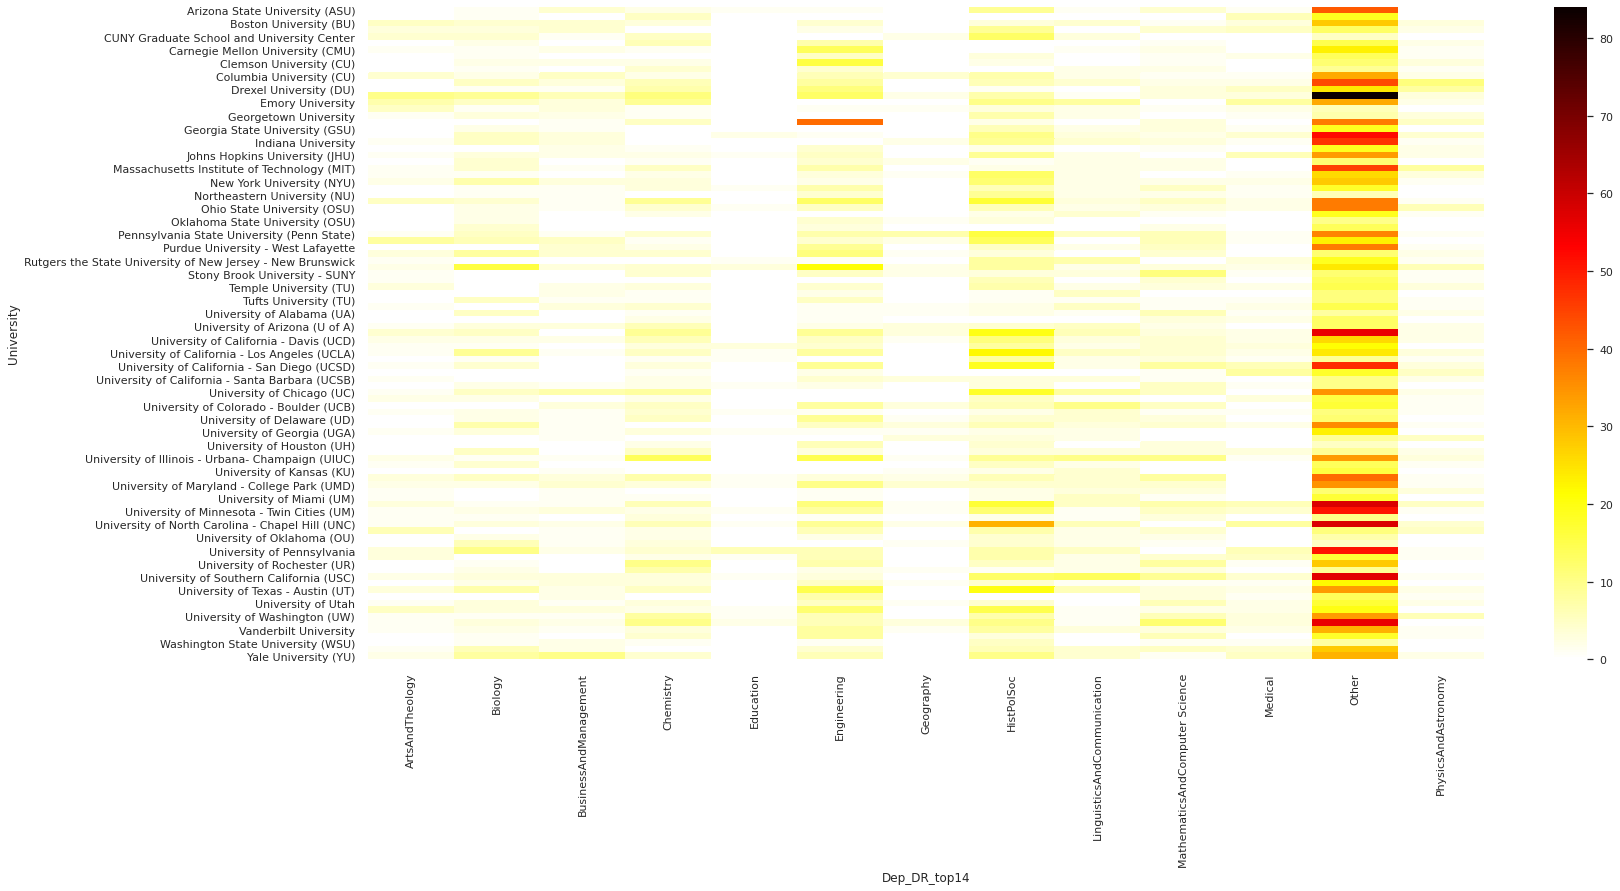

In [ ]:
# Heatmap visualization of crosstab: (pd bootcamp chpt. 179)

plt.figure(figsize=(25,12))
sns.set()
sns.heatmap(pd.crosstab(stip.University, stip.Dep_DR_top14), annot=False, fmt='d', cmap='hot_r', vmax=None)
plt.show()

In [ ]:
stip_no_other = stip.drop(stip[(stip.Dep_DR_top14 == 'Other')].index)

# stip_no_otherUniversities = stip.loc[stip.University != 'Other']

In [ ]:
len(stip_no_other)

3054

In [ ]:
from google.colab import files

stip_no_other.to_csv('stip_no_other_final.csv')
files.download('stip_no_other_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

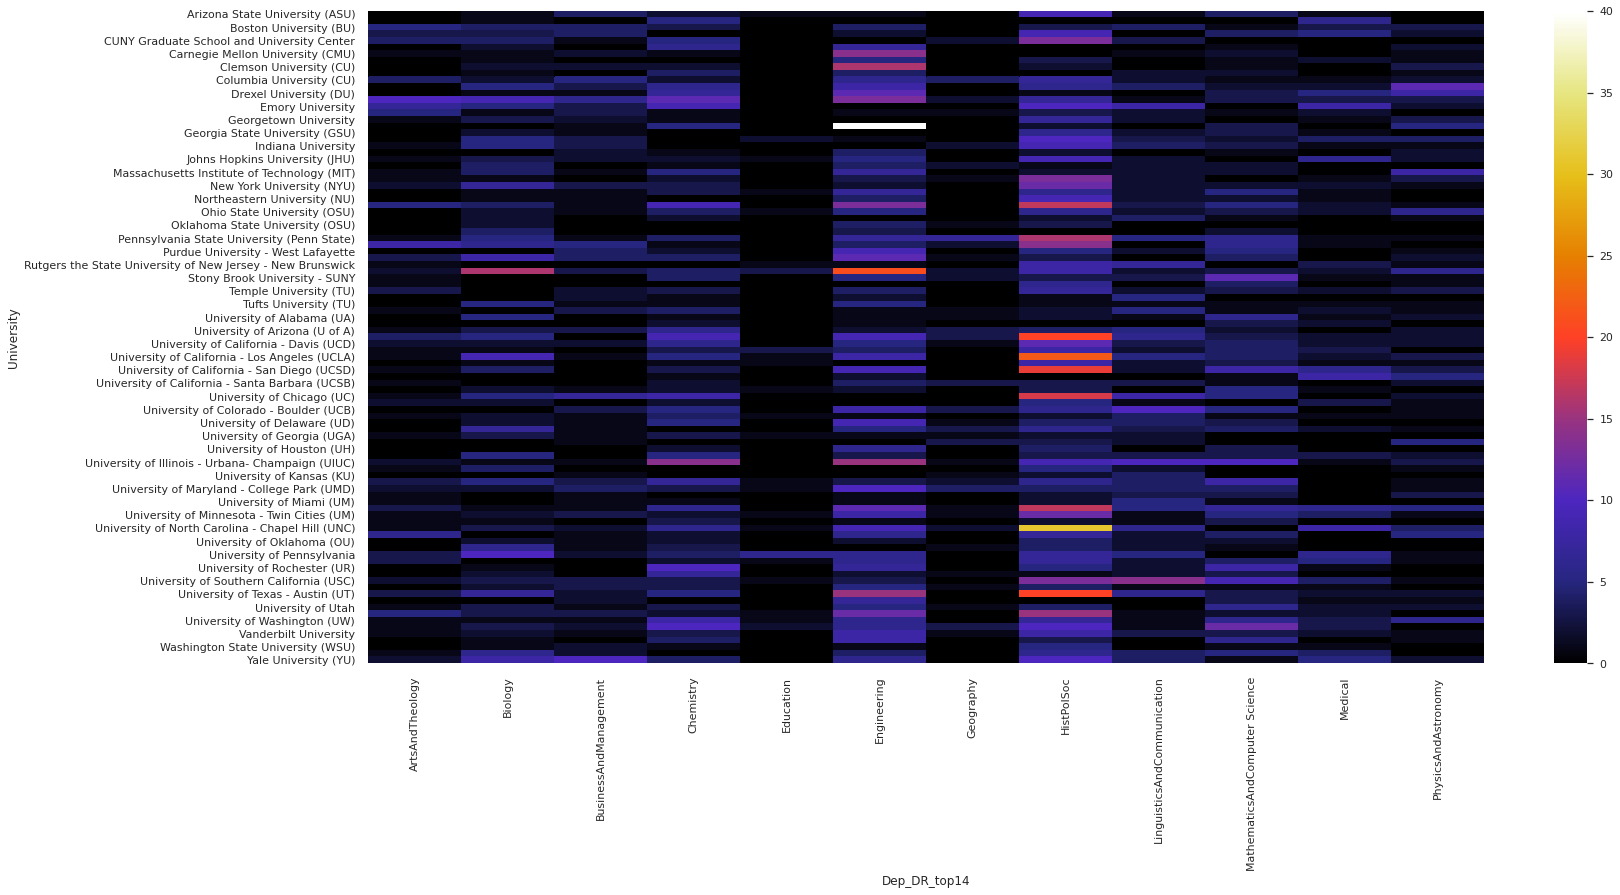

In [ ]:
plt.figure(figsize=(25,12))
sns.set()
sns.heatmap(pd.crosstab(stip_no_other.University, stip_no_other.Dep_DR_top14), annot=False, fmt='d', cmap='CMRmap', vmax=None)
plt.show()

# !!! ACTUALLY, IT DEPENDS ON THE TYPE OF ANALYSIS.... A CORRECT SINGLE OBS CAN BE VALUABLE TO INFORM ME ABOUT THE TRUE STIPEND FEES OF THAT PARTICULAR UNIVERSITY! IF I AM INTERESTED IN OTHER PARS HOWEVER, FILTER THESE GUYS OUT!!...

In [ ]:
# stud_per_uni = stip.University.value_counts(dropna=False)

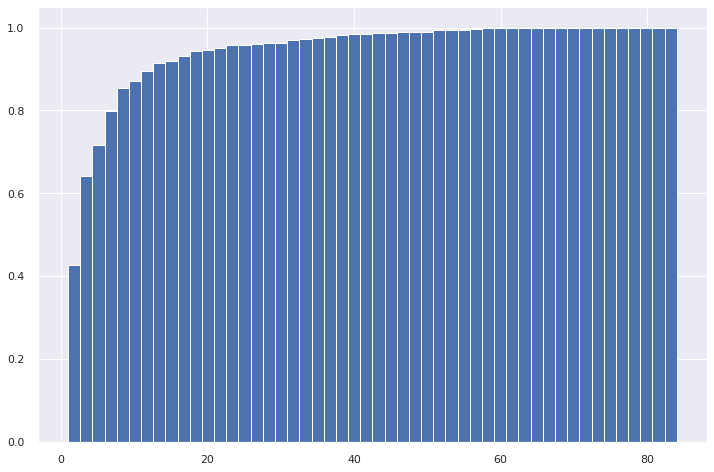

In [ ]:
# It does not make any sense to include Universities having less than x observations -> where to cut ???

plt.figure(figsize=(12,8))
plt.hist(unidept_frequencies, density=True, cumulative=True, log=False, bins=50)
plt.show()


# morethan19 = stud_per_uni.loc[stud_per_uni > 19]

In [ ]:
stud_per_unidept = stip.uni_and_dept.value_counts(dropna=False)
stud_per_unidept

Duke University DU_Other                                    84
University of North Carolina - Chapel Hill UNC_Other        58
University of Michigan - Ann Arbor UM_Other                 58
University of Southern California USC_Other                 57
University of Wisconsin - Madison UW_Other                  56
                                                            ..
Harvard University HU_Engineering                            1
Pennsylvania State University Penn State_ArtsAndTheology     1
University of California - Los Angeles UCLA_Education        1
University of Pennsylvania_PhysicsAndAstronomy               1
Florida State University FSU_Chemistry                       1
Name: uni_and_dept, Length: 914, dtype: int64

In [ ]:
morethan6 = stud_per_unidept.loc[stud_per_unidept > 6]
morethan6

Duke University DU_Other                                84
University of North Carolina - Chapel Hill UNC_Other    58
University of Michigan - Ann Arbor UM_Other             58
University of Southern California USC_Other             57
University of Wisconsin - Madison UW_Other              56
                                                        ..
University of South Carolina USC_Chemistry               7
Drexel University DU_Chemistry                           7
University of Notre Dame ND_HistPolSoc                   7
University of Texas - Dallas UTD_Engineering             7
University of Florida UF_Biology                         7
Name: uni_and_dept, Length: 211, dtype: int64

In [ ]:
stip_unideptAbove6 = stip[stip.uni_and_dept.isin(list(morethan6.index))].copy()
stip_unideptAbove6

# stud_per_unidept.loc[stud_per_unidept>]

University                      Department  LW_Ratio Academic_Year Program_Year                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3                          Dep_DR Dep_DR_top14 GP9_binary  MissingFees_DR  Fees_correct                                     uni_and_dept
4                    University of Virginia (UVA)                             ECE      1.14     2020-2021          1st                                                NaN      1    2020            26000         26000            0            0            26000                             ECE        Other        low               0             0                 University of Virginia UVA_Other
6     Washington University in St. Louis (Wash U)                            olin      1.69     2020-2021          1st                                                NaN      1    2020            35000         35000            0            0            35000                            olin        Other        low               0             0  Washington University in St. Louis Wash U_Other
9                       New York University (NYU)                       Sociology      1.13     2020-2021          1st                                                NaN      1    2020            33500             0        30000         3500            33500                      HistPolSoc   HistPolSoc       high               0             0               New York University NYU_HistPolSoc
13    Washington University in St. Louis (Wash U)  Imaging Science in Engineering      1.50     2020-2021          1st  Also received an enhancement to monthly base s...      1    2020            31000         31000            0            0            31000  Imaging Science in Engineering        Other        low               0             0  Washington University in St. Louis Wash U_Other
15                    University of Delaware (UD)    Geography & Spatial Sciences      1.06     2020-2021          2nd                                                NaN      2    2020            27000             0        22000         5000            27000    Geography & Spatial Sciences        Other       high               0             0                  University of Delaware UD_Other
...                                           ...                             ...       ...           ...          ...                                                ...    ...     ...              ...           ...          ...          ...              ...                             ...          ...        ...             ...           ...                                              ...
8702                         Duke University (DU)                    Biochemistry      1.59     2012-2013   6th and up                                                NaN      6    2012            29840         29840            0            0            29840                       Chemistry    Chemistry        low               0             0                     Duke University DU_Chemistry
8703                 University of Virginia (UVA)            Chemical Engineering      1.63     2013-2014          4th  This includes health insurance coverage, tuiti...      4    2013            32000         32000            0            0            32000                     Engineering  Engineering        low               0             0           University of Virginia UVA_Engineering
8704                         Duke University (DU)          Biomedical Engineering      1.70     2013-2014          2nd  This is the stipend associated with the NSF Fe...      2    2013            32000         32000            0            0            32000                     Engineering  Engineering        low               0             0                   Duke University DU_Engineering
8705                 University of Virginia (UVA)            Chemical Engineering      1.28     201

In [ ]:
from google.colab import files

stip_unideptAbove6.to_csv('stip_unideptAbove6_final.csv')
files.download('stip_unideptAbove6_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# (cum) histogram of these value counts -> decide on threshold for creating more informative subdata from these ...

unidept_frequencies = list(stud_per_unidept)
unidept_frequencies


# stip_new = stip[stip.University.isin(list(morethan19.index))].copy()

[84,
 58,
 58,
 57,
 56,
 56,
 52,
 51,
 51,
 48,
 47,
 45,
 44,
 42,
 40,
 40,
 38,
 38,
 38,
 38,
 37,
 36,
 35,
 35,
 34,
 34,
 34,
 34,
 32,
 32,
 31,
 31,
 31,
 28,
 28,
 28,
 28,
 26,
 26,
 24,
 24,
 24,
 23,
 23,
 23,
 22,
 22,
 21,
 21,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6

In [ ]:
# All these 1's are completely useless at well!? -> probably best approach: don't delete these rows, but for analysis of uni x dept, get rid of these rare values just before ... !? :)

stip_unideptAbove6['uni_and_dept'].value_counts(dropna=False).sort_values(ascending=False)#[0:49]

Duke University DU_Other                                84
University of Michigan - Ann Arbor UM_Other             58
University of North Carolina - Chapel Hill UNC_Other    58
University of Southern California USC_Other             57
University of Wisconsin - Madison UW_Other              56
                                                        ..
Drexel University DU_Chemistry                           7
New York University NYU_Biology                          7
Duke University DU_HistPolSoc                            7
University of Chicago UC_BusinessAndManagement           7
University of Rochester UR_Engineering                   7
Name: uni_and_dept, Length: 211, dtype: int64

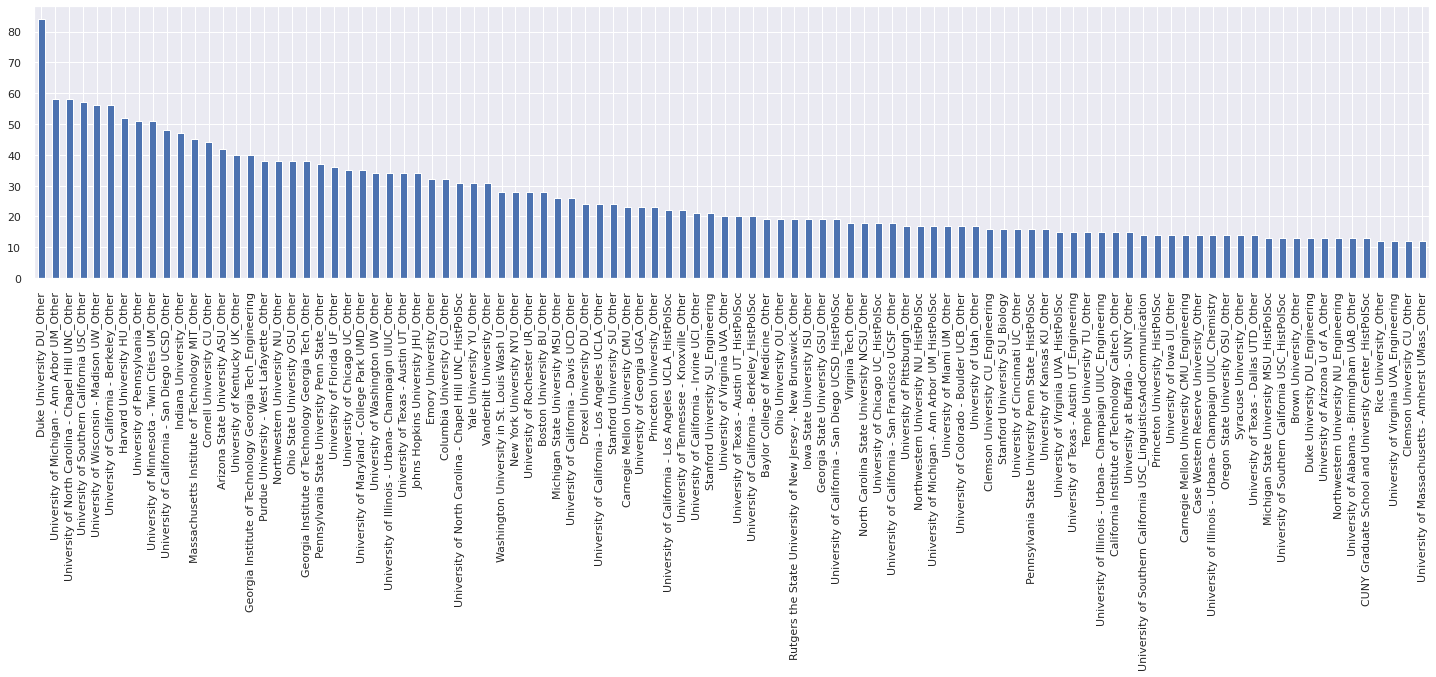

In [ ]:
stip_unideptAbove6.uni_and_dept.value_counts()[0:100].plot(kind="bar", figsize=(25,5))

In [ ]:
# repeat the same, but for the df excluding other depts:

stip_no_other_unideptAbove6 = stip_no_other[stip_no_other.uni_and_dept.isin(list(morethan6.index))].copy()
stip_no_other_unideptAbove6

University               Department  LW_Ratio Academic_Year Program_Year                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3                       Dep_DR                 Dep_DR_top14 GP9_binary  MissingFees_DR  Fees_correct                                       uni_and_dept
9                             New York University (NYU)                Sociology      1.13     2020-2021          1st                                                NaN      1    2020            33500             0        30000         3500            33500                   HistPolSoc                   HistPolSoc       high               0             0                 New York University NYU_HistPolSoc
22          Massachusetts Institute of Technology (MIT)     Chemical Engineering      1.55     2020-2021          3rd                                                NaN      3    2020            43380         43380            0            0            43380                  Engineering                  Engineering        low               0             0  Massachusetts Institute of Technology MIT_Engi...
23                  University of California - Berkeley               Psychology      1.04     2020-2021          1st                                                NaN      1    2020            29000         29000            0            0            29000                   HistPolSoc                   HistPolSoc        low               0             0     University of California - Berkeley_HistPolSoc
24    Rutgers the State University of New Jersey - N...              Linguistics      1.04     2019-2020          1st                                                NaN      1    2019            26800             0        25000         2000            27000  LinguisticsAndCommunication  LinguisticsAndCommunication       high             200           200  Rutgers the State University of New Jersey - N...
27                                 Duke University (DU)  Biomedical Engineering       1.25     2019-2020          4th                                                NaN      4    2019            27700         28500            0            0            28500                  Engineering                  Engineering        low             800           800                     Duke University DU_Engineering
...                                                 ...                      ...       ...           ...          ...                                                ...    ...     ...              ...           ...          ...          ...              ...                          ...                          ...        ...             ...           ...                                                ...
8702                               Duke University (DU)             Biochemistry      1.59     2012-2013   6th and up                                                NaN      6    2012            29840         29840            0            0            29840                    Chemistry                    Chemistry        low               0             0                       Duke University DU_Chemistry
8703                       University of Virginia (UVA)     Chemical Engineering      1.63     2013-2014          4th  This includes health insurance coverage, tuiti...      4    2013            32000         32000            0            0            32000                  Engineering                  Engineering        low               0             0             University of Virginia UVA_Engineering
8704                               Duke University (DU)   Biomedical Engineering      1.70     2013-2014          2nd  This is the stipend associated with the NSF Fe...      2    2013            32000         32000            0            0            32000                  Engineering                  Engineering        low               0             0                 

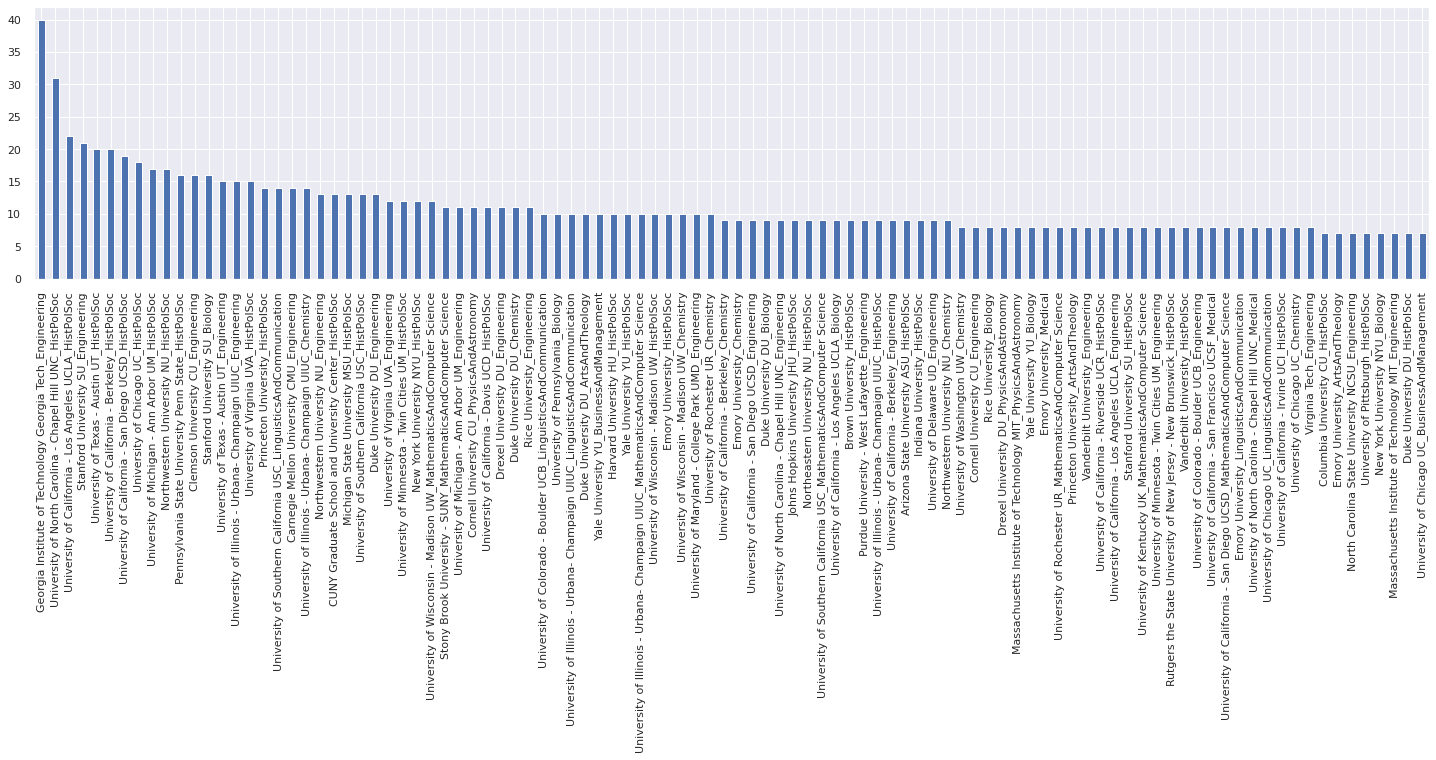

In [ ]:
stip_no_other_unideptAbove6.uni_and_dept.value_counts()[0:100].plot(kind="bar", figsize=(25,5))

In [ ]:
# from this last df, again create the crosstab ... :)


pd.crosstab(stip_no_other_unideptAbove6.University, stip_no_other_unideptAbove6.Dep_DR_top14)

Dep_DR_top14                                  ArtsAndTheology  Biology  BusinessAndManagement  Chemistry  Engineering  Geography  HistPolSoc  LinguisticsAndCommunication  MathematicsAndComputer Science  Medical  PhysicsAndAstronomy
University                                                                                                                                                                                                                             
Arizona State University (ASU)                              0        0                      0          0            0          0           9                            0                               0        0                    0
Brown University                                            0        0                      0          0            0          0           9                            0                               0        0                    0
CUNY Graduate School and University Center                  0        0                      0          0            0          0          13                            0                               0        0                    0
California Institute of Technology (Caltech)                0        0                      0          0            7          0           0                            0                               0        0                    0
Carnegie Mellon University (CMU)                            0        0                      0          0           14          0           0                            0                               0        0                    0
...                                                       ...      ...                    ...        ...          ...        ...         ...                          ...                             ...      ...                  ...
University of Washington (UW)                               0        0                      0          8            0          0           7                            0                               0        0                    0
University of Wisconsin - Madison (UW)                      0        0                      0         10            0          0          10                            0                              12        0                    0
Vanderbilt University                                       0        0                      0          0            8          0           8                            0                               0        0                    0
Virginia Tech                                               0        0                      0          0            8          0           0                            0                               0        0                    0
Yale University (YU)                                        0        8                     10          0            0          0          10                            0                               0        0                    0

[61 rows x 11 columns]

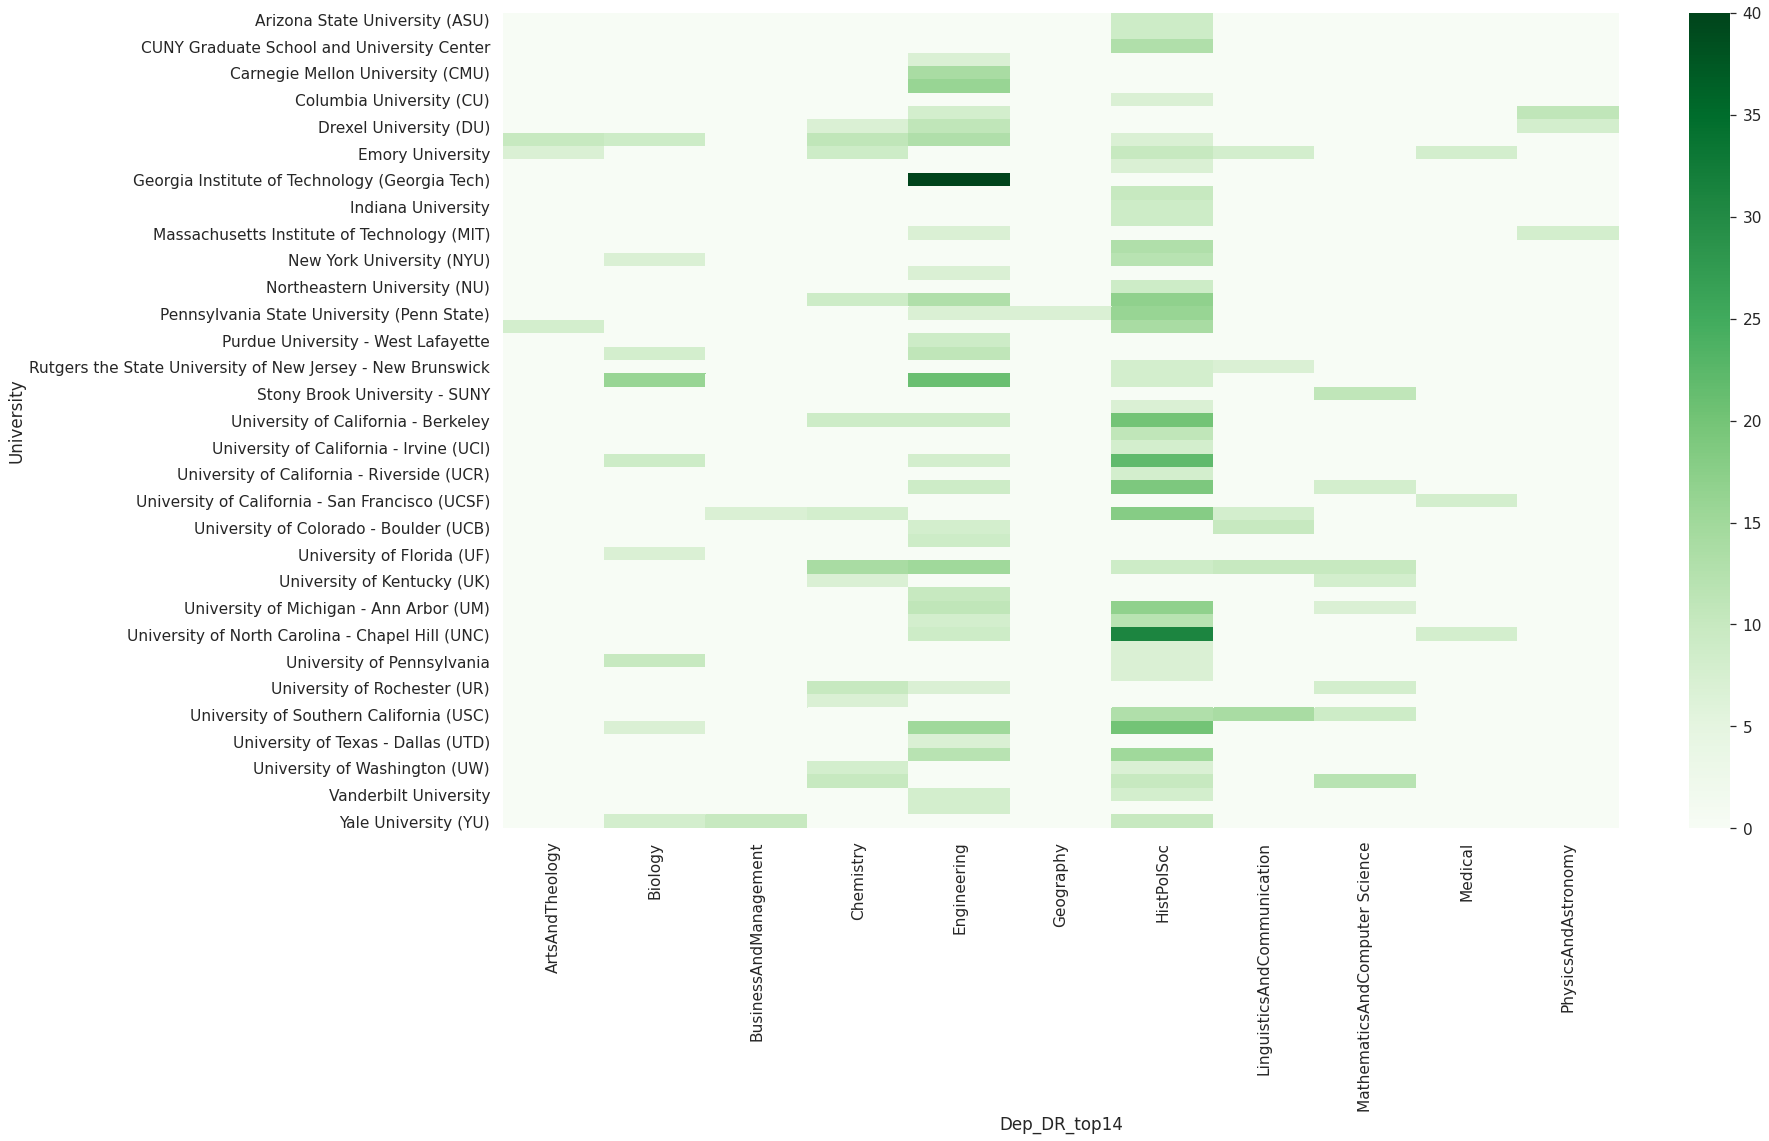

In [ ]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1.4)
whitegreen = sns.heatmap(pd.crosstab(stip_no_other_unideptAbove6.University, stip_no_other_unideptAbove6.Dep_DR_top14), annot=False, fmt='d', cmap='Greens', vmax=None)
#plt.show()

In [ ]:
for item in whitegreen.get_xticklabels():
    item.set_rotation(45)

In [ ]:
plt.show()

In [ ]:
from google.colab import files

stip_no_other_unideptAbove6.to_csv('stip_no_other_unideptAbove6_final.csv')
files.download('stip_no_other_unideptAbove6_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''

url = 'https://raw.githubusercontent.com/avocadosquirrel/PhD-Stipends---DSS-Competition/master/UniversityCoordinates.csv?token=AN3DAR3YX4BU27T567STF3S7CE3DA'
uni_coordinates = pd.read_csv(url)
uni_coordinates.head() '''

"\n\nurl = 'https://raw.githubusercontent.com/avocadosquirrel/PhD-Stipends---DSS-Competition/master/UniversityCoordinates.csv?token=AN3DAR3YX4BU27T567STF3S7CE3DA'\nuni_coordinates = pd.read_csv(url)\nuni_coordinates.head() "

In [ ]:
stip_no_other_unideptAbove6['Overall_Pay_corr'] = stip_no_other_unideptAbove6.Overall_Pay_num / stip_no_other_unideptAbove6.LW_Ratio

In [ ]:
EngAtGiorgia_6 = stip_no_other_unideptAbove6.loc[stip_no_other_unideptAbove6.uni_and_dept == 'Georgia Institute of Technology Georgia Tech_Engineering']
HPSAtUNC_6 = stip_no_other_unideptAbove6.loc[stip_no_other_unideptAbove6.uni_and_dept == 'University of North Carolina - Chapel Hill UNC_HistPolSoc']
ChemAtIlli_6 = stip_no_other_unideptAbove6.loc[stip_no_other_unideptAbove6.uni_and_dept == 'University of Illinois - Urbana- Champaign UIUC_Chemistry']
PhysAtDrex_6 = stip_no_other_unideptAbove6.loc[stip_no_other_unideptAbove6.uni_and_dept == 'Drexel University DU_Physics']

In [ ]:
EngAtGiorgia_6

University                           Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay    Fees                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3  Fees_num  MissingFees_DR  Fees_correct  OP_DR  OP_doublecheck LW_2groups       Dep_DR Dep_DR_top14                                       uni_and_dept  Overall_Pay_corr
186   Georgia Institute of Technology (Georgia Tech)                 Chemical Engineering     $27,080      1.16     2020-2021          1st        $30,180           NaN           NaN  $3,100  I received a wavier of standard out of state t...      1    2020            27080         30180            0            0            30180      3100            3100          3100  27080               0    high-LW  Engineering  Engineering  Georgia Institute of Technology Georgia Tech_E...      23344.827586
227   Georgia Institute of Technology (Georgia Tech)                Aerospace Engineering     $23,900      1.03     2020-2021          2nd        $26,400           NaN           NaN  $2,500  Fees ~1k per fall/spring and $500 for the summ...      2    2020            23900         26400            0            0            26400      2500            2500          2500  23900               0     low-LW  Engineering  Engineering  Georgia Institute of Technology Georgia Tech_E...      23203.883495
1410  Georgia Institute of Technology (Georgia Tech)               Biomedical Engineering     $29,476      1.27     2019-2020          1st        $31,500           NaN           NaN  $2,024                                                NaN      1    2019            29476         31500            0            0            31500      2024            2024          2024  29476               0    high-LW  Engineering  Engineering  Georgia Institute of Technology Georgia Tech_E...      23209.448819
2177  Georgia Institute of Technology (Georgia Tech)                Aerospace Engineering     $40,200      1.73     2018-2019          2nd        $40,200           NaN           NaN     NaN                                              SMART      2    2018            40200         40200            0            0            40200      <NA>               0             0   <NA>            <NA>    high-LW  Engineering  Engineering  Georgia Institute of Technology Georgia Tech_E...      23236.994220
2244  Georgia Institute of Technology (Georgia Tech)    Materials Science and Engineering     $27,252      1.17     2019-2020          4th        $27,252           NaN           NaN     NaN                                                NaN      4    2019            27252         27252            0            0            27252      <NA>               0             0   <NA>            <NA>    high-LW  Engineering  Engineering  Georgia Institute of Technology Georgia Tech_E...      23292.307692
2245  Georgia Institute of Technology (Georgia Tech)    Materials Science and Engineering     $24,377      1.05     2019-2020          4th        $27,252           NaN           NaN  $2,875                                                NaN      4    2019            24377         27252            0            0            27252      2875            2875          2875  24377               0     low-LW  Engineering  Engineering  Georgia Institute of Technology Georgia Tech_E...      23216.190476
2491  Georgia Institute of Technology (Georgia Tech)               Mechanical Engineering     $23,700      1.02     2018-2019          3rd        $26,400           NaN           NaN  $2,700                                                NaN      3    2018            23700         26400            0            0            26400      2700            2700          2700  23700               0     low-LW  Engineering  Engineering  Georgia Institute of Technology Georgia Tech_E...      23235.294118
2597  Georgia Institute of Technology (Georgia Tec

In [ ]:
# where do these differences come from? E.g. Eng@Giorgia: 21k vs 23k -> one cluster of data significantly different from the other with respect to AcadY? PY? LW_Ratio!!!!!? ;) ...

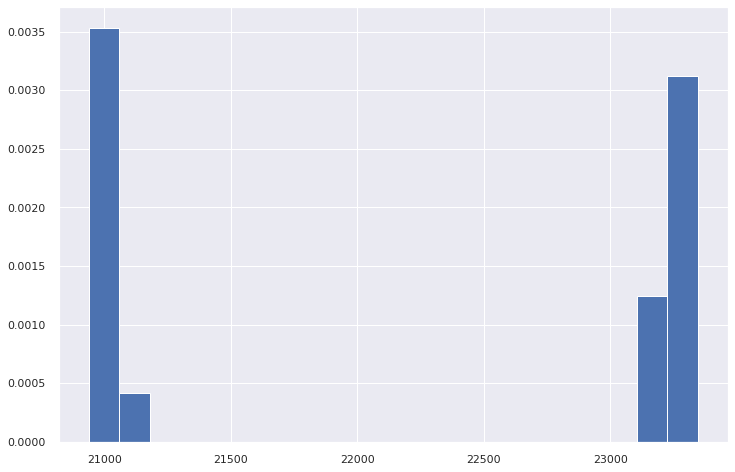

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(EngAtGiorgia_6.Overall_Pay_corr, density=True, cumulative=False, log=False, bins=20)
plt.show()

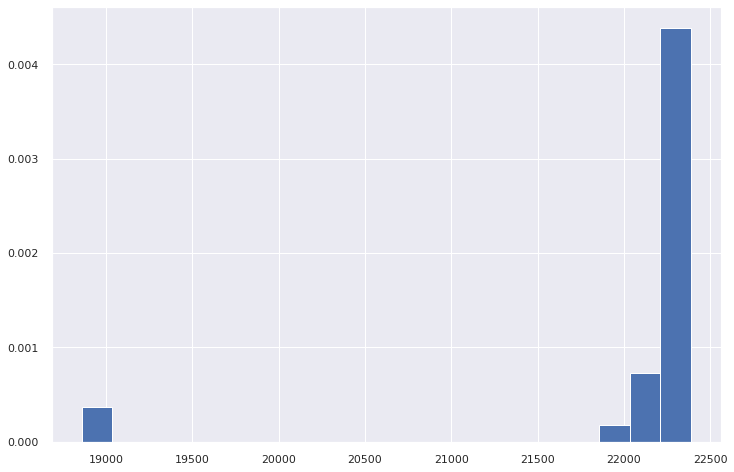

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(HPSAtUNC_6.Overall_Pay_corr, density=True, cumulative=False, log=False, bins=20)
plt.show()

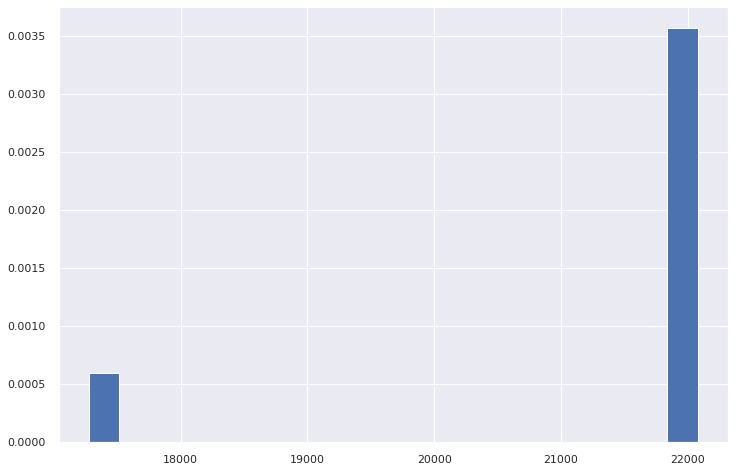

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(ChemAtIlli_6.Overall_Pay_corr, density=True, cumulative=False, log=False, bins=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


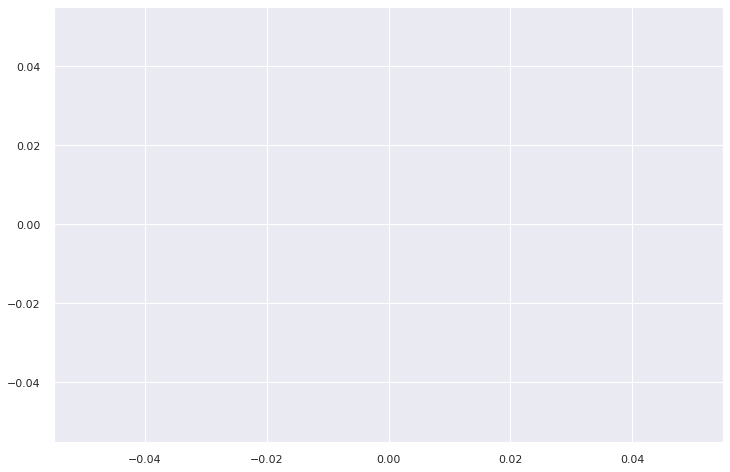

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(PhysAtDrex_6.Overall_Pay_corr, density=True, cumulative=False, log=False, bins=20)
plt.show()

In [ ]:
# for selected stip['uni_and_dept'] (iterate through all???), investigate the GP distributions and clean out all likely not stipend values ...

stip['OverallPay_corr'] = stip.Overall_Pay_num / stip.LW_Ratio


In [ ]:
# !! ich habe 8 Zeilen mit NAN in pay_corr, da hier LW_R = 0 war! 

stip['OverallPay_corr'].isna().sum()

8

In [ ]:
# can LW_Ratios in fact be ZERO? some are?? - THESE ZEROS DO NOT MAKE SENSE!?!!!! - they were probably rounded ... just exclude these 11 obs from analyses of Overall Pays corrected for LW! :)

stip.loc[stip.LW_Ratio == 0]

University                          Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay     Fees                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3  Fees_num  MissingFees_DR  Fees_correct  OP_DR  OP_doublecheck LW_2groups                              Dep_DR           Dep_DR_top14                                       uni_and_dept  OverallPay_corr
2428              Harvard University (HU)                             Physics         $90       0.0     2018-2019   6th and up           $100           NaN           NaN      $10                                                NaN      6    2018               90           100            0            0              100        10              10            10     90               0     low-LW                 PhysicsAndAstronomy    PhysicsAndAstronomy          Harvard University HU_PhysicsAndAstronomy              inf
4110          Ohio State University (OSU)                         Psychology          NaN       0.0     2019-2020          1st            NaN           NaN           NaN      NaN                                                NaN      1    2019                0             0            0            0                0      <NA>               0             0   <NA>            <NA>     low-LW                          HistPolSoc             HistPolSoc               Ohio State University OSU_HistPolSoc              NaN
4116              Cornell University (CU)                              botany         NaN       0.0     2018-2019          1st             $1           NaN           NaN       $1                                                NaN      1    2018                0             1            0            0                1         1               1             1      0               0     low-LW                              botany                  Other                        Cornell University CU_Other              NaN
4634       Florida State University (FSU)                           Economics         NaN       0.0     2017-2018          1st            NaN           NaN           NaN      NaN                                                NaN      1    2017                0             0            0            0                0      <NA>               0             0   <NA>            <NA>     low-LW               BusinessAndManagement  BusinessAndManagement  Florida State University FSU_BusinessAndManage...              NaN
4732       Florida State University (FSU)           Rhetoric and Composition          NaN       0.0     2017-2018          1st            NaN        $1,500           NaN   $1,500                                                NaN      1    2017                0             0         1500            0             1500      1500            1500          1500      0               0     low-LW           Rhetoric and Composition                   Other                 Florida State University FSU_Other              NaN
6479          University of Kentucky (UK)                           Chemistry         NaN       0.0     2016-2017          1st        $23,000           NaN           NaN  $23,000  I live pay check to pay check. All the money I...      1    2016                0         23000            0            0            23000     23000           23000         23000      0               0     low-LW                           Chemistry              Chemistry                University of Kentucky UK_Chemistry              NaN
6494             Stanford University (SU)                        Anthropology         NaN       0.0     2016-2017          1st            NaN           NaN           NaN      NaN                                                NaN      1    2016                0             0            0            0                0      <NA>               0             0   <NA>            <NA>     low-L

In [ ]:
# the Overall Pay should be divided by the LW_Ratio to make resulting GP values comparable between different living areas ! -> done, see Overall_Pay_corr

In [ ]:
stip

University              Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay    Fees                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3  Fees_num  MissingFees_DR  Fees_correct  OP_DR  OP_doublecheck LW_2groups                 Dep_DR           Dep_DR_top14                                       uni_and_dept  OverallPay_corr
0             University of Tennessee - Knoxville              Economics       $1,850      0.09     2020-2021          1st            NaN        $1,850           NaN     NaN                                                NaN      1    2020             1850             0         1850            0             1850      <NA>               0             0   <NA>            <NA>     low-LW  BusinessAndManagement  BusinessAndManagement  University of Tennessee - Knoxville_BusinessAn...     20555.555556
1                  University of Arizona (U of A)               Economics     $21,000      1.01     2020-2021          1st            NaN       $21,000           NaN     NaN  $10500 per semester. RA/TA required. Need to p...      1    2020            21000             0        21000            0            21000      <NA>               0             0   <NA>            <NA>     low-LW  BusinessAndManagement  BusinessAndManagement  University of Arizona U of A_BusinessAndManage...     20792.079208
2                  University of Arizona (U of A)               Economics     $19,800      0.96     2020-2021          1st            NaN       $21,000           NaN  $1,200                                                NaN      1    2020            19800             0        21000            0            21000      1200            1200          1200  19800               0     low-LW  BusinessAndManagement  BusinessAndManagement  University of Arizona U of A_BusinessAndManage...     20625.000000
4                    University of Virginia (UVA)                     ECE     $26,000      1.14     2020-2021          1st        $26,000           NaN           NaN     NaN                                                NaN      1    2020            26000         26000            0            0            26000      <NA>               0             0   <NA>            <NA>    high-LW                    ECE                  Other                   University of Virginia UVA_Other     22807.017544
6     Washington University in St. Louis (Wash U)                    olin     $35,000      1.69     2020-2021          1st        $35,000           NaN           NaN     NaN                                                NaN      1    2020            35000         35000            0            0            35000      <NA>               0             0   <NA>            <NA>    high-LW                   olin                  Other    Washington University in St. Louis Wash U_Other     20710.059172
...                                           ...                     ...         ...       ...           ...          ...            ...           ...           ...     ...                                                ...    ...     ...              ...           ...          ...          ...              ...       ...             ...           ...    ...             ...        ...                    ...                    ...                                                ...              ...
8702                         Duke University (DU)            Biochemistry     $29,840      1.59     2012-2013   6th and up        $29,840           NaN           NaN     NaN                                                NaN      6    2012            29840         29840            0            0            29840      <NA>               0             0   <NA>            <NA>    high-LW              Chemistry              Chemistry                       Duke University DU_Chemistry     18767.295597
8703                 Un

In [ ]:
# need to apply my Department-Transformation to stip_new as well ...

stip.columns

Index(['University', 'Department', 'Overall_Pay', 'LW_Ratio', 'Academic_Year',
       'Program_Year', '12_M_Gross_Pay', '9_M_Gross_Pay', '3_M_Gross_Pay',
       'Fees', 'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num',
       'GrossPay_12M', 'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3',
       'Fees_num', 'MissingFees_DR', 'Fees_correct', 'OP_DR', 'OP_doublecheck',
       'LW_2groups', 'Dep_DR', 'Dep_DR_top14', 'uni_and_dept',
       'OverallPay_corr'],
      dtype='object')

In [ ]:
# Dep_DR was not applied to this guy created for numerical vars ... -> apply my recodings also to this df ...

In [ ]:
'''
def simplifyDep_DR(value):
    if value not in ['Engineering', 'Chemistry', 'HistPolSoc', 'Biology', 'Mathematics & Computer Science', 'Psychology', 'Business & Management', 'Physics', 
                     'Physics & Astronomy', 'Mathematics', 'Linguistics & Communication']:
        return 'Other'
    else:
       return value
'''

# stip_new['Dep_DR_top12'] = stip_new['Dep_DR_top12'].apply(simplifyDep_DR)

"\ndef simplifyDep_DR(value):\n    if value not in ['Engineering', 'Chemistry', 'HistPolSoc', 'Biology', 'Mathematics & Computer Science', 'Psychology', 'Business & Management', 'Physics', \n                     'Physics & Astronomy', 'Mathematics', 'Linguistics & Communication']:\n        return 'Other'\n    else:\n       return value\n"

In [ ]:
stip.Dep_DR_top14.value_counts(dropna=False).sort_values(ascending=False)   # , normalize=True

Other                             2375
HistPolSoc                         648
Engineering                        518
Chemistry                          323
MathematicsAndComputer Science     295
Biology                            271
LinguisticsAndCommunication        257
Medical                            171
PhysicsAndAstronomy                171
BusinessAndManagement              161
ArtsAndTheology                    133
Geography                           72
Education                           34
Name: Dep_DR_top14, dtype: int64

In [ ]:
stip.University.value_counts()

Duke University (DU)                                152
University of North Carolina - Chapel Hill (UNC)    131
University of Michigan - Ann Arbor (UM)             121
University of California - Berkeley                 119
University of Southern California (USC)             113
                                                   ... 
University of Missouri (MU)                          22
University of Alabama - Birmingham (UAB)             21
Oklahoma State University (OSU)                      20
Washington State University (WSU)                    20
University of Houston (UH)                           20
Name: University, Length: 99, dtype: int64

In [ ]:
stip_unideptAbove6.Dep_DR_top14.value_counts()

Other                             2348
HistPolSoc                         473
Engineering                        337
Chemistry                          109
Biology                             81
MathematicsAndComputer Science      73
LinguisticsAndCommunication         57
PhysicsAndAstronomy                 27
ArtsAndTheology                     25
Medical                             24
BusinessAndManagement               17
Geography                            7
Name: Dep_DR_top14, dtype: int64

In [ ]:

# group by Department -> calculate median overall GP to find out, which groups I should cluster together... would be an option, but I just used "common sense" to recode Depts

OP_corr_per_dpt = stip_unideptAbove6.groupby(['Dep_DR_top14', 'University']).Overall_Pay_num.median()#.sort_values(ascending=False)
# GP_per_dpt[0:50]

In [ ]:
OP_corr_per_dpt[0:49]

Dep_DR_top14           University                                       
ArtsAndTheology        Duke University (DU)                                 27055.0
                       Emory University                                     22177.0
                       Princeton University                                 30700.0
Biology                Duke University (DU)                                 29419.0
                       New York University (NYU)                            39000.0
                       Rice University                                      22034.0
                       Stanford University (SU)                             39350.0
                       University of California - Los Angeles (UCLA)        28000.0
                       University of Florida (UF)                           22263.0
                       University of Pennsylvania                           30800.0
                       University of Texas - Austin (UT)                    27000.0
   

In [ ]:
type(OP_corr_per_dpt)

pandas.core.series.Series

In [ ]:
OP_corr_per_dpt_df = OP_corr_per_dpt.to_frame()

# df = s.to_frame()    # <- better :)
# GP_corr_per_dpt_df = pd.to_frame(GP_corr_per_dpt)   # nope ...

In [ ]:
OP_corr_per_dpt_df[0:59]

Overall_Pay_num
Dep_DR_top14          University                                                        
ArtsAndTheology       Duke University (DU)                                       27055.0
                      Emory University                                           22177.0
                      Princeton University                                       30700.0
Biology               Duke University (DU)                                       29419.0
                      New York University (NYU)                                  39000.0
                      Rice University                                            22034.0
                      Stanford University (SU)                                   39350.0
                      University of California - Los Angeles (UCLA)              28000.0
                      University of Florida (UF)                                 22263.0
                      University of Pennsylvania                                 30800.0
                      University of Texas - Austin (UT)                          27000.0
                      Yale University (YU)                                       34875.0
BusinessAndManagement University of Chicago (UC)                                 42000.0
                      Yale University (YU)                                       37000.0
Chemistry             Drexel University (DU)                                     23500.0
                      Duke University (DU)                                       29840.0
                      Emory University                                           24360.0
                      Northwestern University (NU)                               32560.0
                      University of California - Berkeley                        31000.0
                      University of Chicago (UC)                                 29250.0
                      University of Illinois - Urbana- Champaign (UIUC)          28412.5
                      University of Kentucky (UK)                                22880.0
                      University of Rochester (UR)                               27400.0
                      University of South Carolina (USC)                         23652.0
                      University of Washington (UW)                              29207.0
                      University of Wisconsin - Madison (UW)                     26000.0
Engineering           California Institute of Technology (Caltech)               36000.0
                      Carnegie Mellon University (CMU)                           27949.0
                      Clemson University (CU)                                    18777.0
                      Cornell University (CU)                                    33536.0
                      Drexel University (DU)                                     25000.0
                      Duke University (DU)                                       30550.0
                      Georgia Institute of Technology (Georgia Tech)             24779.0
                      Massachusetts Institute of Technology (MIT)                37900.0
                      North Carolina State University (NCSU)                     24000.0
                      Northwestern University (NU)                               30500.0
                      Pennsylvania State University (Penn State)                 31320.0
                      Purdue University - West Lafayette                         28000.0
                      Rice University                                            28300.0
                      Stanford University (SU)                                   40280.0
                      University of California - Berkeley                        34000.0
                      University of California - Los Angeles (UCLA)              29000.0
                      University of California - San Diego (UCSD)                27500.0
                      University of Colorado - Boulder (UCB)        

# i THINK I CAN BELIEVE THESE CORRECTED OVERALL PAY VALUES PER (UNI X DEPT), SINCE THEY ARE THE MEDIAN OF AT LEAST 6 OBSERVATIONS (WITHOUT DUPLICATES). 
IT IS HOWEVER WELL POSSIBLE, THAT THE VALUE FOR 1 UNI IS MUCH LOWER THAN FOR ANOTHER ONE PURELY BECAUSE 
OBSERVATIONS FOR THE FORMER ARE 10Y OLDER ON AVERAGE ... -> ANOVA OR STH SIMILAR WOULD BE VERY HELPFUL !!! 

In [ ]:
type(OP_corr_per_dpt_df)

pandas.core.frame.DataFrame

In [ ]:
OP_corr_per_dpt_df.reset_index(inplace=True)
OP_corr_per_dpt_df

Dep_DR_top14                                   University  Overall_Pay_num
0        ArtsAndTheology                         Duke University (DU)          27055.0
1        ArtsAndTheology                             Emory University          22177.0
2        ArtsAndTheology                         Princeton University          30700.0
3                Biology                         Duke University (DU)          29419.0
4                Biology                    New York University (NYU)          39000.0
..                   ...                                          ...              ...
206                Other  Washington University in St. Louis (Wash U)          30000.0
207                Other                         Yale University (YU)          34500.0
208  PhysicsAndAstronomy                      Cornell University (CU)          33800.0
209  PhysicsAndAstronomy                       Drexel University (DU)          23500.0
210  PhysicsAndAstronomy  Massachusetts Institute of Technology (MIT)          40161.0

[211 rows x 3 columns]

In [ ]:
# sort descending & extract / visualize top & flop10 :))))

 

# tow_investigation.sort_values(by = ['Calculated_Tow_Miles', 'Basic_Cost'], ascending=[0, 0])[300:400]

Engineering_medians = OP_corr_per_dpt_df.loc[OP_corr_per_dpt_df.Dep_DR_top14 == 'Engineering']
Engineering_medians.sort_values(by= 'Overall_Pay_num', ascending=0)



Dep_DR_top14                                         University  Overall_Pay_num
39  Engineering                           Stanford University (SU)          40280.0
33  Engineering        Massachusetts Institute of Technology (MIT)          37900.0
26  Engineering       California Institute of Technology (Caltech)          36000.0
40  Engineering                University of California - Berkeley          34000.0
29  Engineering                            Cornell University (CU)          33536.0
47  Engineering            University of Michigan - Ann Arbor (UM)          32200.0
36  Engineering         Pennsylvania State University (Penn State)          31320.0
46  Engineering        University of Maryland - College Park (UMD)          30828.0
31  Engineering                               Duke University (DU)          30550.0
35  Engineering                       Northwestern University (NU)          30500.0
54  Engineering                              Vanderbilt University          30000.0
48  Engineering         University of Minnesota - Twin Cities (UM)          29750.0
43  Engineering             University of Colorado - Boulder (UCB)          29600.0
44  Engineering                        University of Delaware (UD)          29000.0
41  Engineering      University of California - Los Angeles (UCLA)          29000.0
50  Engineering                       University of Rochester (UR)          28419.0
38  Engineering                                    Rice University          28300.0
37  Engineering                 Purdue University - West Lafayette          28000.0
27  Engineering                   Carnegie Mellon University (CMU)          27949.0
42  Engineering        University of California - San Diego (UCSD)          27500.0
51  Engineering                  University of Texas - Austin (UT)          27000.0
45  Engineering  University of Illinois - Urbana- Champaign (UIUC)          26290.0
53  Engineering                       University of Virginia (UVA)          26000.0
30  Engineering                             Drexel University (DU)          25000.0
49  Engineering   University of North Carolina - Chapel Hill (UNC)          25000.0
32  Engineering     Georgia Institute of Technology (Georgia Tech)          24779.0
34  Engineering             North Carolina State University (NCSU)          24000.0
55  Engineering                                      Virginia Tech          23770.0
52  Engineering                 University of Texas - Dallas (UTD)          22400.0
28  Engineering                            Clemson University (CU)          18777.0

In [ ]:
Engineering_Top10 = Engineering_medians.sort_values(by= 'Overall_Pay_num', ascending=0)[0:9]
Engineering_Top10

Dep_DR_top14                                    University  Overall_Pay_num
39  Engineering                      Stanford University (SU)          40280.0
33  Engineering   Massachusetts Institute of Technology (MIT)          37900.0
26  Engineering  California Institute of Technology (Caltech)          36000.0
40  Engineering           University of California - Berkeley          34000.0
29  Engineering                       Cornell University (CU)          33536.0
47  Engineering       University of Michigan - Ann Arbor (UM)          32200.0
36  Engineering    Pennsylvania State University (Penn State)          31320.0
46  Engineering   University of Maryland - College Park (UMD)          30828.0
31  Engineering                          Duke University (DU)          30550.0

In [ ]:
Engineering_Flop10 = Engineering_medians.sort_values(by= 'Overall_Pay_num', ascending=1)[0:9]
Engineering_Flop10

Dep_DR_top14                                         University  Overall_Pay_num
28  Engineering                            Clemson University (CU)          18777.0
52  Engineering                 University of Texas - Dallas (UTD)          22400.0
55  Engineering                                      Virginia Tech          23770.0
34  Engineering             North Carolina State University (NCSU)          24000.0
32  Engineering     Georgia Institute of Technology (Georgia Tech)          24779.0
49  Engineering   University of North Carolina - Chapel Hill (UNC)          25000.0
30  Engineering                             Drexel University (DU)          25000.0
53  Engineering                       University of Virginia (UVA)          26000.0
45  Engineering  University of Illinois - Urbana- Champaign (UIUC)          26290.0

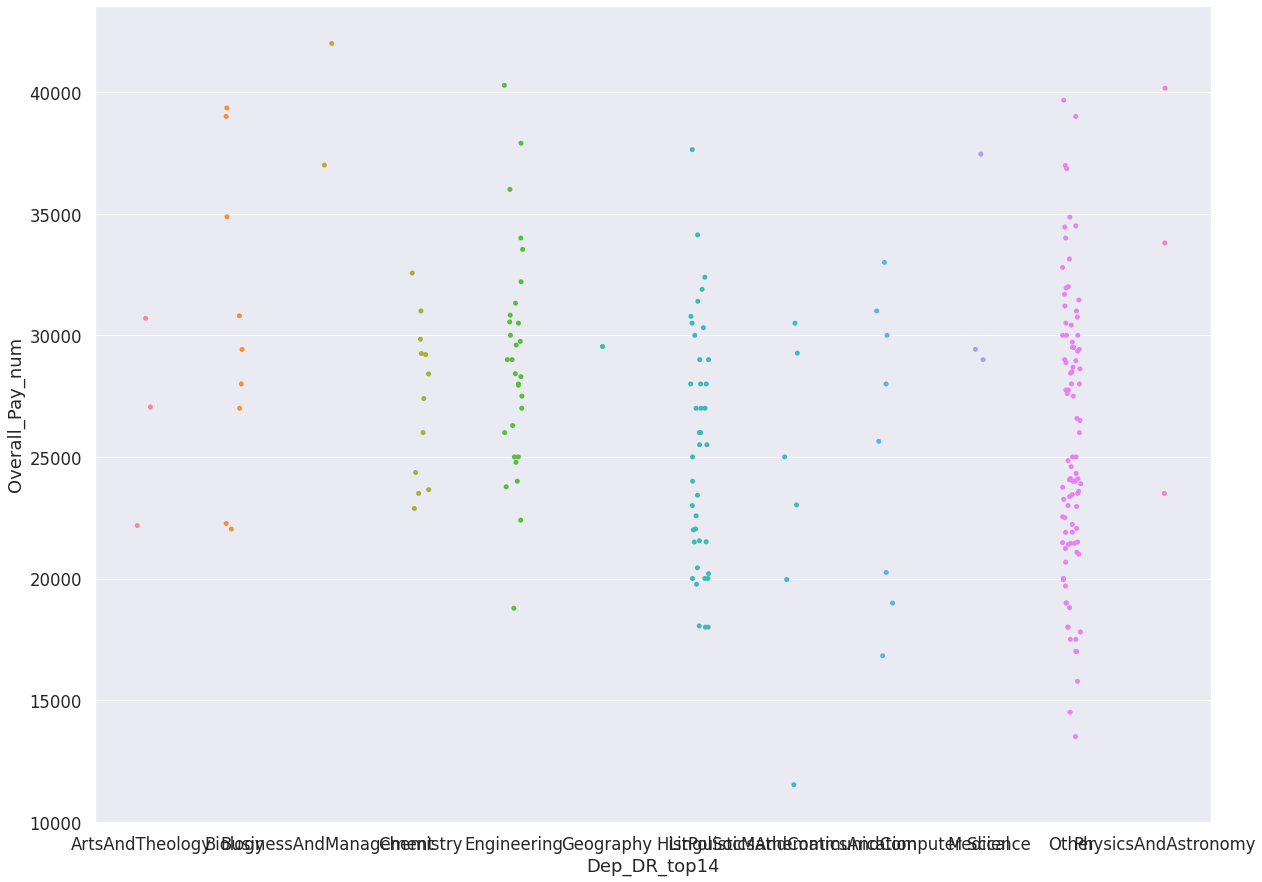

In [ ]:
# The variation of values within uni x dept combis varies like crazy -> -> check with an ANOVA, to what extent this variation is caused by differences in AcadY / PY / LWRatio
# PROBLEM: if lazy student A works as little as possible and has e.g. only a 9M GP, whereas student B earned money in summer on top, this difference is not explained by different stipend schemes!!! .... -> I should compare 9 to 9, 12 to 9, not 9+3 to 9+0 !!!

plt.figure(figsize=(20,15))
sns.set(font_scale=1.5, palette='viridis')
sns.stripplot(data=OP_corr_per_dpt_df, x='Dep_DR_top14', y='Overall_Pay_num', jitter=True, hue=None, dodge=False)
plt.show()

In [ ]:
HistPolSoc_medians = OP_corr_per_dpt_df.loc[OP_corr_per_dpt_df.Dep_DR_top14 == 'HistPolSoc']
HistPolSoc_medians

Dep_DR_top14                                         University  Overall_Pay_num
57   HistPolSoc                     Arizona State University (ASU)          18000.0
58   HistPolSoc                                   Brown University          28000.0
59   HistPolSoc         CUNY Graduate School and University Center          25000.0
60   HistPolSoc                           Columbia University (CU)          31890.0
61   HistPolSoc                               Duke University (DU)          28000.0
62   HistPolSoc                                   Emory University          25500.0
63   HistPolSoc                              Georgetown University          27000.0
64   HistPolSoc                            Harvard University (HU)          34128.0
65   HistPolSoc                                 Indiana University          20000.0
66   HistPolSoc                     Johns Hopkins University (JHU)          29000.0
67   HistPolSoc                    Michigan State University (MSU)          23000.0
68   HistPolSoc                          New York University (NYU)          31400.0
69   HistPolSoc                       Northeastern University (NU)          25500.0
70   HistPolSoc                       Northwestern University (NU)          30780.0
71   HistPolSoc         Pennsylvania State University (Penn State)          22575.0
72   HistPolSoc                               Princeton University          32390.0
73   HistPolSoc  Rutgers the State University of New Jersey - N...          24000.0
74   HistPolSoc                           Stanford University (SU)          37636.0
75   HistPolSoc                             Temple University (TU)          21553.0
76   HistPolSoc                University of California - Berkeley          29000.0
77   HistPolSoc             University of California - Davis (UCD)          23426.0
78   HistPolSoc            University of California - Irvine (UCI)          21499.5
79   HistPolSoc      University of California - Los Angeles (UCLA)          27000.0
80   HistPolSoc         University of California - Riverside (UCR)          19763.5
81   HistPolSoc        University of California - San Diego (UCSD)          22000.0
82   HistPolSoc                         University of Chicago (UC)          28000.0
83   HistPolSoc  University of Illinois - Urbana- Champaign (UIUC)          18000.0
84   HistPolSoc            University of Michigan - Ann Arbor (UM)          27000.0
85   HistPolSoc         University of Minnesota - Twin Cities (UM)          21510.0
86   HistPolSoc   University of North Carolina - Chapel Hill (UNC)          18050.0
87   HistPolSoc                      University of Notre Dame (ND)          26000.0
88   HistPolSoc                         University of Pennsylvania          30000.0
89   HistPolSoc                           University of Pittsburgh          20440.0
90   HistPolSoc            University of Southern California (USC)          30500.0
91   HistPolSoc                  University of Texas - Austin (UT)          22037.0
92   HistPolSoc                       University of Virginia (UVA)          20000.0
93   HistPolSoc                      University of Washington (UW)          20196.0
94   HistPolSoc             University of Wisconsin - Madison (UW)          20000.0
95   HistPolSoc                              Vanderbilt University          26000.0
96   HistPolSoc                               Yale University (YU)          30312.5

In [ ]:
HistPolSoc_Top10 = HistPolSoc_medians.sort_values(by= 'Overall_Pay_num', ascending=0)[0:9]
HistPolSoc_Top10

Dep_DR_top14                               University  Overall_Pay_num
74   HistPolSoc                 Stanford University (SU)          37636.0
64   HistPolSoc                  Harvard University (HU)          34128.0
72   HistPolSoc                     Princeton University          32390.0
60   HistPolSoc                 Columbia University (CU)          31890.0
68   HistPolSoc                New York University (NYU)          31400.0
70   HistPolSoc             Northwestern University (NU)          30780.0
90   HistPolSoc  University of Southern California (USC)          30500.0
96   HistPolSoc                     Yale University (YU)          30312.5
88   HistPolSoc               University of Pennsylvania          30000.0

In [ ]:
HistPolSoc_Flop10 = HistPolSoc_medians.sort_values(by= 'Overall_Pay_num', ascending=1)[0:9]
HistPolSoc_Flop10

Dep_DR_top14                                         University  Overall_Pay_num
57   HistPolSoc                     Arizona State University (ASU)          18000.0
83   HistPolSoc  University of Illinois - Urbana- Champaign (UIUC)          18000.0
86   HistPolSoc   University of North Carolina - Chapel Hill (UNC)          18050.0
80   HistPolSoc         University of California - Riverside (UCR)          19763.5
94   HistPolSoc             University of Wisconsin - Madison (UW)          20000.0
65   HistPolSoc                                 Indiana University          20000.0
92   HistPolSoc                       University of Virginia (UVA)          20000.0
93   HistPolSoc                      University of Washington (UW)          20196.0
89   HistPolSoc                           University of Pittsburgh          20440.0

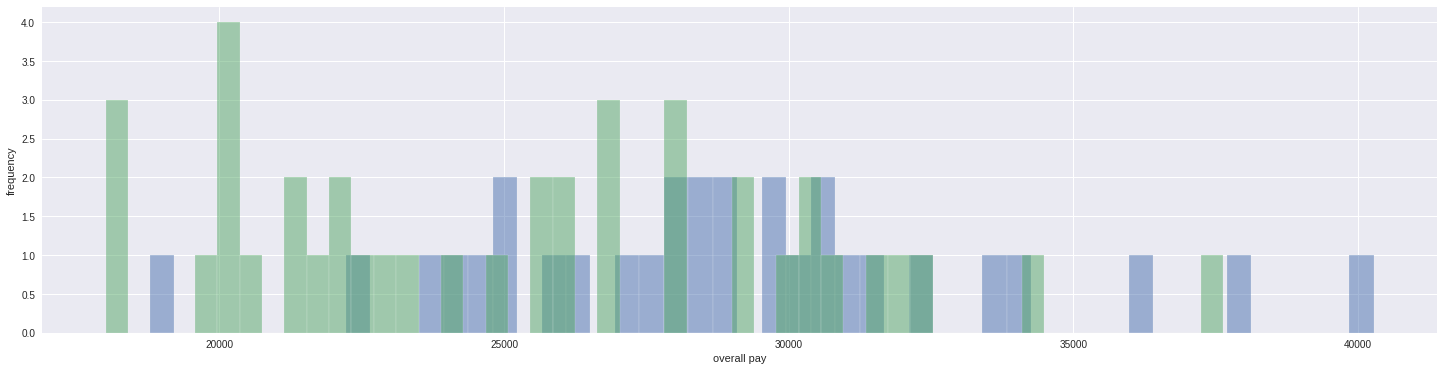

In [ ]:
# scatterplot dotplot sth for overall pay ... however: would be much more interesting to see histogram!

# Engineering_medians.University Engineering_medians.Overall_Pay_num

plt.style.use('seaborn')
plt.figure(figsize = (25,6))
plt.hist(Engineering_medians.Overall_Pay_num, label = "Engineering - Overall Pay (uncorrected)", bins = 50, log=False, alpha=0.5)    #, color="red"          
plt.hist(HistPolSoc_medians.Overall_Pay_num, label = "HistPolSocPsych - Overall Pay (uncorrected)", bins = 50, log=False, alpha=0.5)    #, color="red"  
# plt.hist(stip.Fees_num.dropna(), label = "Available Fees", log=True, bins=50, alpha=0.5, color="blue")
# plt.hist(max_products_per_member, bins=8, label = "max_products_per_member", alpha=0.5, color="blue")
# plt.yscale("log")
plt.xlabel("overall pay")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

In [ ]:
# VISUALIZE all universities for engineering: median against year of study / against academic year ... # yes, could do. But a LinReg will give me much more info on the overall contribution of individual factors! ...





In [ ]:
# unfortunately, my filter for Unis of 20+ students got lost somewhere on the way ...
# do the same, but only for Engineering departments ... -> visualize this :)

Engineering = stip_unideptAbove6.loc[stip.Dep_DR_top14 == 'Engineering']

In [ ]:
obs_per_Eng_dpt = Engineering.groupby(['University']).Overall_Pay_num.count()#.sort_values(ascending=False)
# GP_per_dpt[0:50]

In [ ]:
len(obs_per_Eng_dpt)

30

In [ ]:
# Nr of Obs per University (with at least 6) in Engineering dpt

obs_per_Eng_dpt[0:49]

University
California Institute of Technology (Caltech)          7
Carnegie Mellon University (CMU)                     14
Clemson University (CU)                              16
Cornell University (CU)                               8
Drexel University (DU)                               11
Duke University (DU)                                 13
Georgia Institute of Technology (Georgia Tech)       40
Massachusetts Institute of Technology (MIT)           7
North Carolina State University (NCSU)                7
Northwestern University (NU)                         13
Pennsylvania State University (Penn State)            7
Purdue University - West Lafayette                    9
Rice University                                      11
Stanford University (SU)                             21
University of California - Berkeley                   9
University of California - Los Angeles (UCLA)         8
University of California - San Diego (UCSD)           9
University of Colorado - Boulder (UCB

# DATA CLEANING

In [ ]:
stip.columns

Index(['University', 'Department', 'Overall_Pay', 'LW_Ratio', 'Academic_Year',
       'Program_Year', '12_M_Gross_Pay', '9_M_Gross_Pay', '3_M_Gross_Pay',
       'Fees', 'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num',
       'GrossPay_12M', 'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3',
       'Fees_num', 'OP_DR', 'OP_doublecheck', 'Dep_DR', 'Dep_DR_top14'],
      dtype='object')

In [ ]:
stip.shape

(8707, 23)

In [ ]:
stip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   University       8444 non-null   object 
 1   Department       8247 non-null   object 
 2   Overall_Pay      8686 non-null   object 
 3   LW_Ratio         7796 non-null   float64
 4   Academic_Year    8703 non-null   object 
 5   Program_Year     7687 non-null   object 
 6   12_M_Gross_Pay   6209 non-null   object 
 7   9_M_Gross_Pay    2474 non-null   object 
 8   3_M_Gross_Pay    798 non-null    object 
 9   Fees             3352 non-null   object 
 10  Comments         2155 non-null   object 
 11  PY_DR            7687 non-null   Int64  
 12  Acad_Y           8703 non-null   Int64  
 13  Overall_Pay_num  8707 non-null   Int64  
 14  GrossPay_12M     8707 non-null   Int64  
 15  GrossPay_9M      8707 non-null   Int64  
 16  GrossPay_3M      8707 non-null   Int64  
 17  GrossPay_sumOf

In [ ]:
stip.isna().sum(axis = 0)

University          263
Department          460
Overall_Pay          21
LW_Ratio            911
Academic_Year         4
Program_Year       1020
12_M_Gross_Pay     2498
9_M_Gross_Pay      6233
3_M_Gross_Pay      7909
Fees               5355
Comments           6552
PY_DR              1020
Acad_Y                4
Overall_Pay_num       0
GrossPay_12M          0
GrossPay_9M           0
GrossPay_3M           0
GrossPay_sumOf3       0
Fees_num           5355
OP_DR              5355
OP_doublecheck     5355
Dep_DR              460
Dep_DR_top14          0
dtype: int64

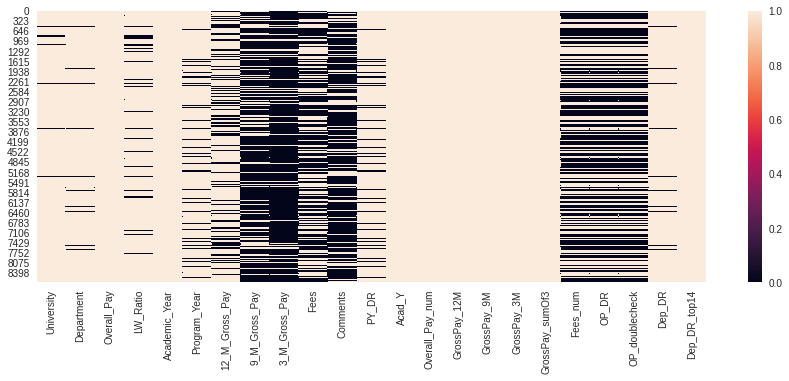

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(stip.notna())
plt.show()

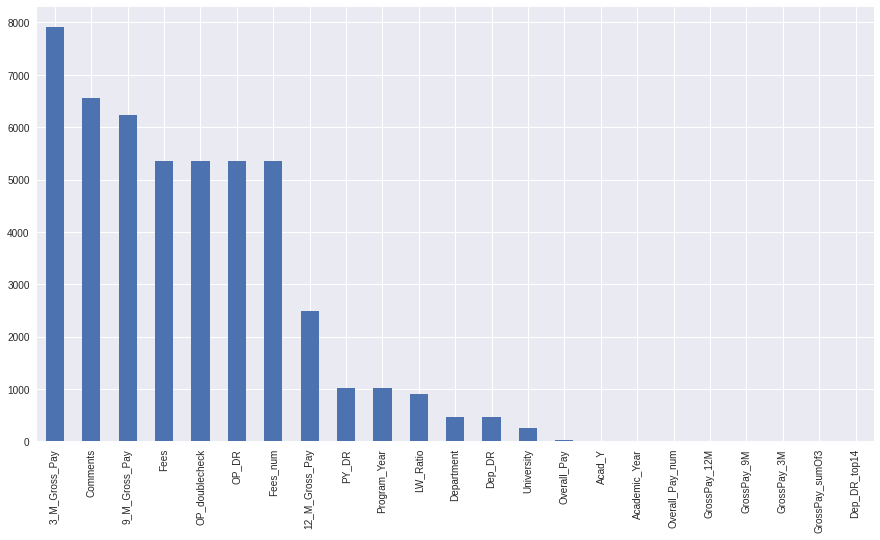

In [ ]:
stip.isnull().sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,8), logy=False)

In [ ]:
# Question 1: understand the system -> what to do with the extremely high GP/fee values ?? Remove presumably non-stipend-earnings or keep all???
# feature-engine -> outlier-detection plots ... :)

stip.shape

(8707, 23)

In [ ]:
# 12M GP: cut # 65k!

stip = stip.drop(stip[(stip.GrossPay_12M > 65000)].index)
stip.shape

(8657, 23)

In [ ]:
# 9M GP: cut # 60k!

stip = stip.drop(stip[(stip.GrossPay_9M > 60000)].index)
stip.shape

(8649, 23)

In [ ]:
# 3M GP: cut # 20k!

stip = stip.drop(stip[(stip.GrossPay_3M > 20000)].index)
stip.shape

(8645, 23)

In [ ]:
plt.rcParams.update({'font.size': 22})

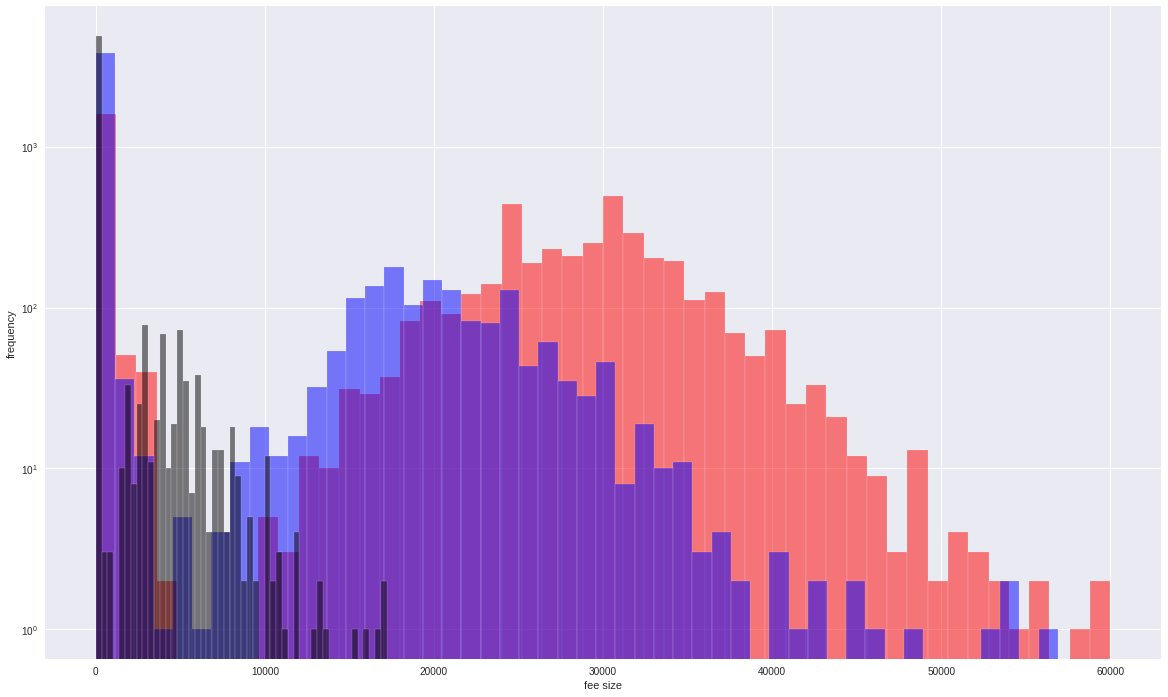

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (20,12))
plt.hist(stip.GrossPay_12M, label = "GrossPay_12M", log=True, bins=50, alpha=0.5, color="red")              
plt.hist(stip.GrossPay_9M, label = "GrossPay_9M", log=True, bins=50, alpha=0.5, color="blue")
plt.hist(stip.GrossPay_3M, label = "GrossPay_3M", log=True, bins=50, alpha=0.5, color="black")
# plt.hist(max_products_per_member, bins=8, label = "max_products_per_member", alpha=0.5, color="blue")
# plt.yscale("log")
plt.xlabel("fee size")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

AttributeError: ignored

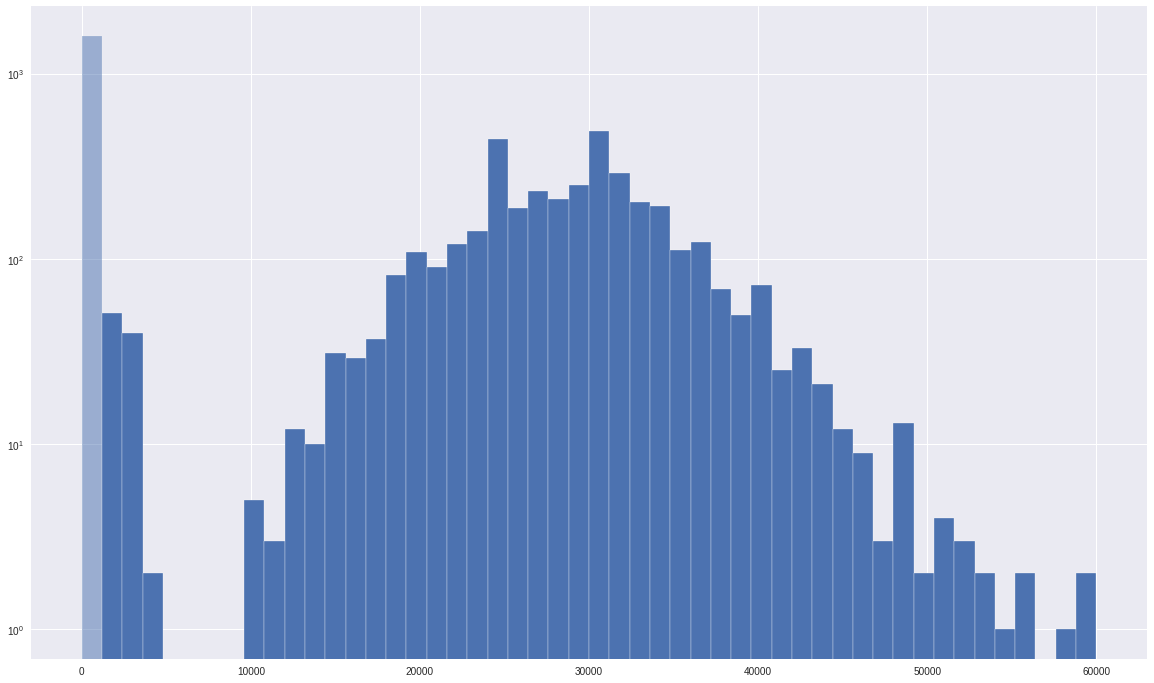

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (20,12))
plt.hist(stip.GrossPay_12M, label = "GrossPay_12M", log=True, bins=50, alpha=0.5, c=stip.Acad_Y)      # color=stip.Acad_Y -> won't work -> try another type of plot??        
#plt.hist(stip.GrossPay_9M, label = "GrossPay_9M", log=True, bins=50, alpha=0.5, color="blue")
#plt.hist(stip.GrossPay_3M, label = "GrossPay_3M", log=True, bins=50, alpha=0.5, color="black")
# plt.hist(max_products_per_member, bins=8, label = "max_products_per_member", alpha=0.5, color="blue")
# plt.yscale("log")
plt.xlabel("fee size")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

In [ ]:
stip['GP12_binary'] = np.where(stip.GrossPay_12M<7000, 'low', 'high')

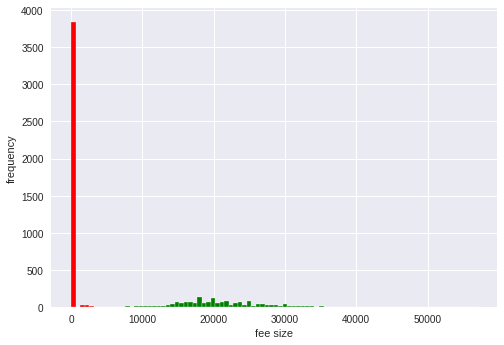

In [ ]:
# would work now, but not very convincing without log scale... ;(

plt.xlabel("fee size")
plt.ylabel("frequency")
plt.grid(True)
# plt.log(True)
# ax.set_yxscale("log")

n, bins, patches = plt.hist(stip.GrossPay_9M, 90)

for c, p in zip(bins, patches):
    if c < 7000:
        plt.setp(p, 'facecolor', 'red')
    
    elif c>=7000:
        plt.setp(p, 'facecolor', 'green')

plt.show()

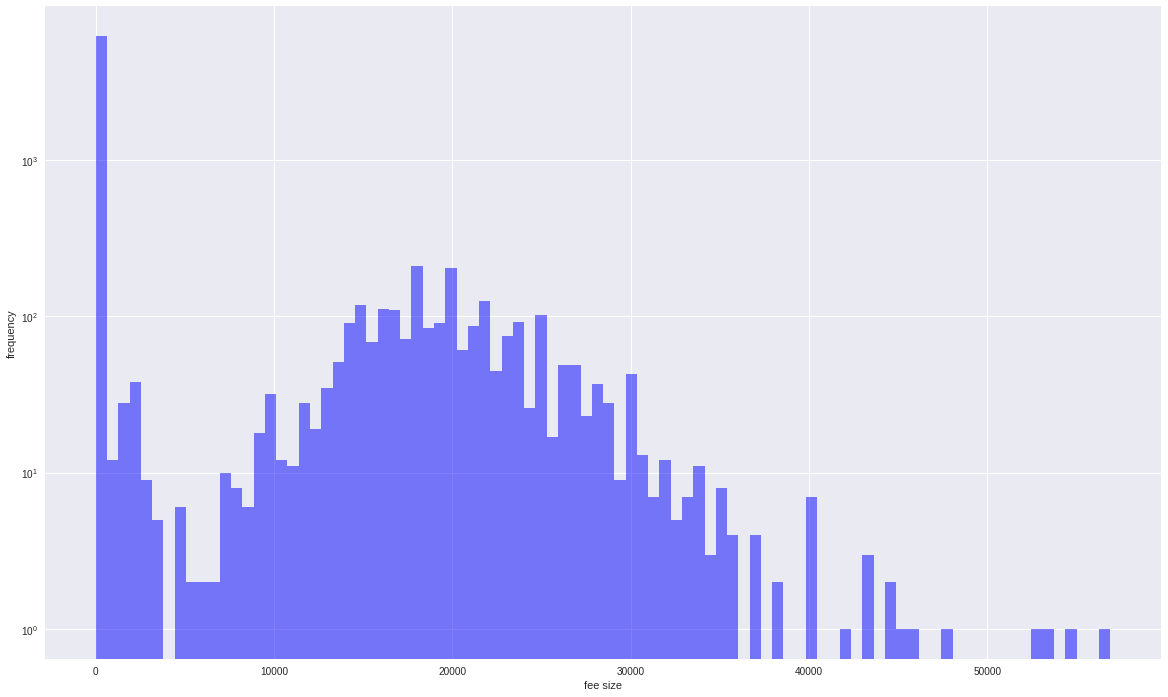

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (20,12))
# plt.hist(stip.GrossPay_12M, label = "GrossPay_12M", log=True, bins=50, alpha=0.5, color="red")              
plt.hist(stip.GrossPay_9M, label = "GrossPay_9M", log=True, bins=90, alpha=0.5, color="blue")
#plt.hist(stip.GrossPay_3M, label = "GrossPay_3M", log=True, bins=50, alpha=0.5, color="black")
# plt.hist(max_products_per_member, bins=8, label = "max_products_per_member", alpha=0.5, color="blue")
# plt.yscale("log")
plt.xlabel("fee size")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

In [ ]:
stip['GP9_binary'] = np.where(stip.GrossPay_9M<5714, 'low', 'high')

In [ ]:
8/14*10000

5714.285714285714

AttributeError: ignored

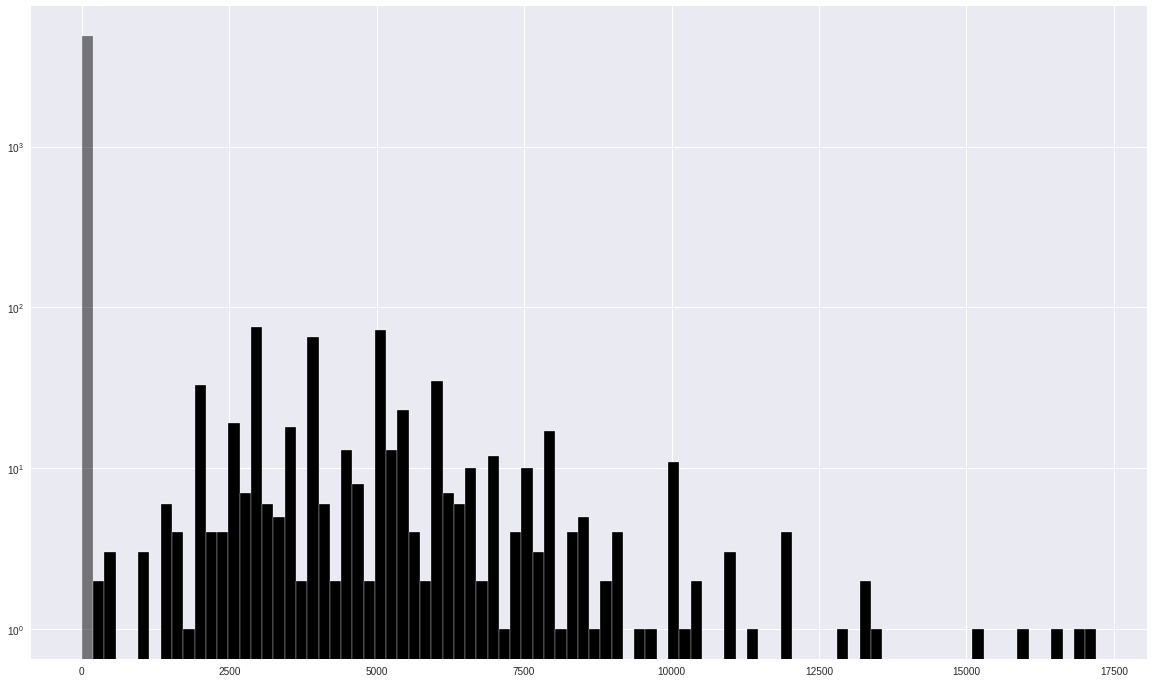

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (20,12))
# plt.hist(stip.GrossPay_12M, label = "GrossPay_12M", log=True, bins=50, alpha=0.5, color="red")              
# plt.hist(stip.GrossPay_9M, label = "GrossPay_9M", log=True, bins=200, alpha=0.5, color="blue")
plt.hist(stip.GrossPay_3M, label = "GrossPay_3M", log=True, bins=90, alpha=0.5, color="black", xlim=(0,2000))
# plt.hist(max_products_per_member, bins=8, label = "max_products_per_member", alpha=0.5, color="blue")
# plt.yscale("log")
plt.xlabel("fee size")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

In [ ]:
stip['GP3_binary'] = np.where(stip.GrossPay_3M<333, 'low', 'high')

In [ ]:
2/15*2500

333.3333333333333

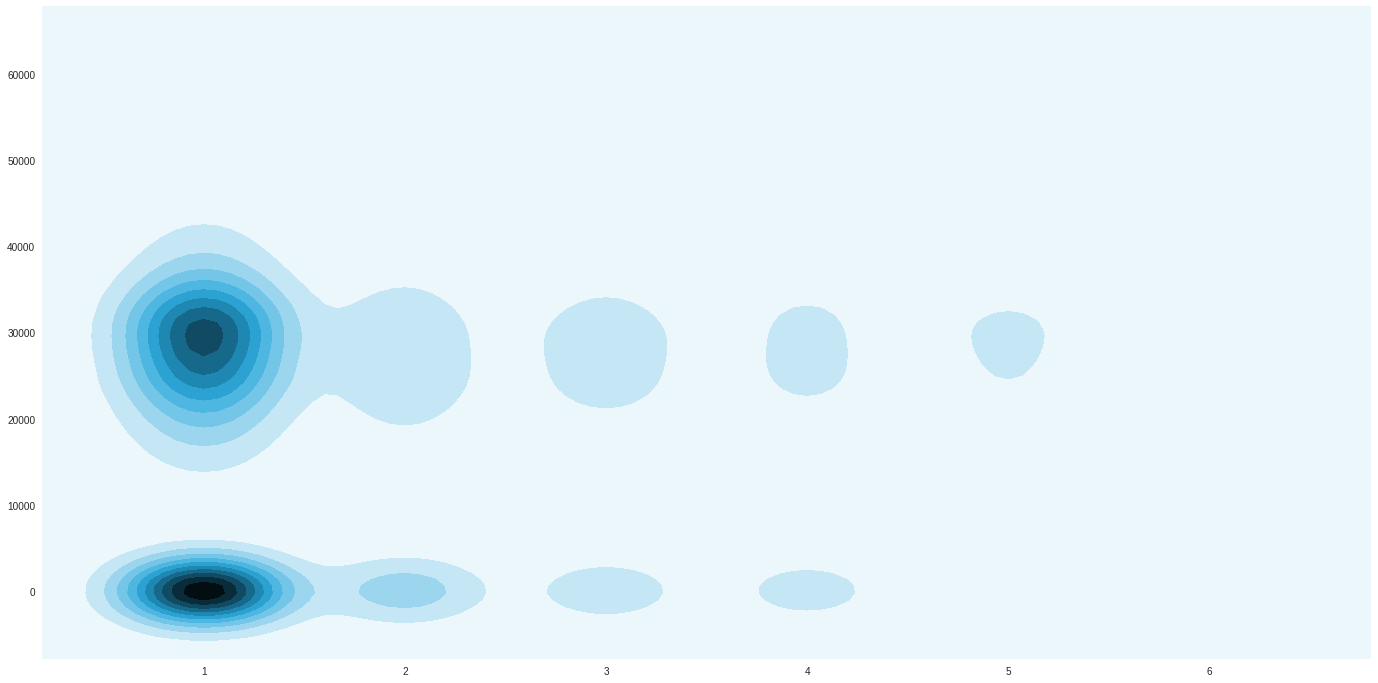

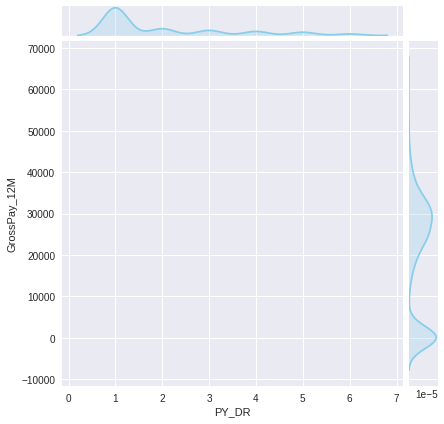

In [ ]:
# !!!!! as 1st year student, you have ~equal chances to be lucky or not

fig, ax = plt.subplots(figsize=(23.811794664043056,12))
g = sns.jointplot(ax=ax, x=stip.PY_DR, y=stip.GrossPay_12M, kind='kde', color="skyblue", ratio=10)   # size/ratio both did not change distribution scale -> how to ???

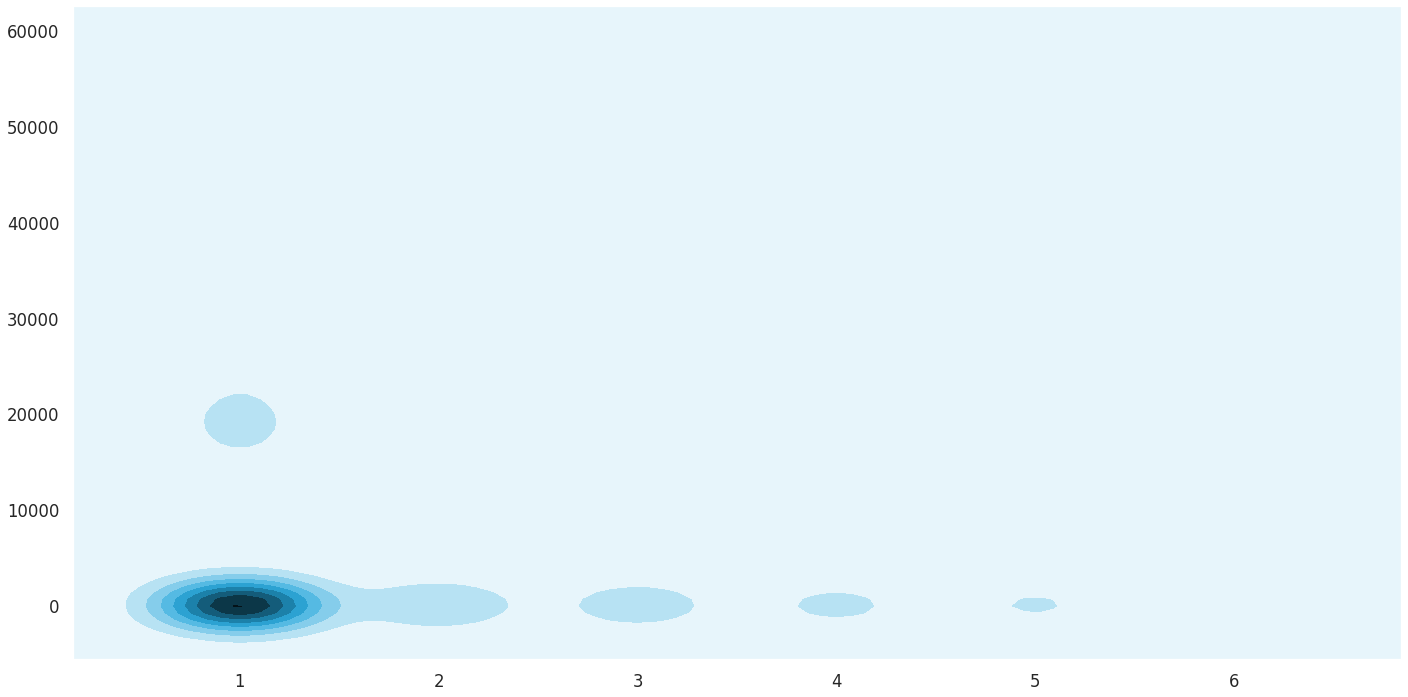

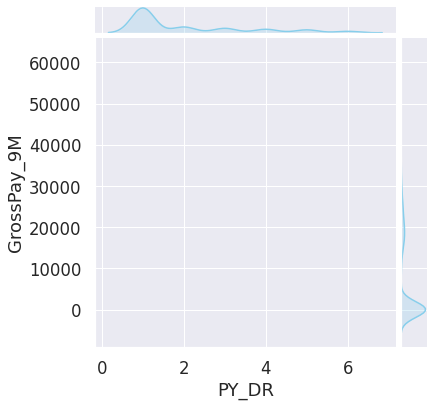

In [ ]:
# !!!!! as 1st year student, you should study at a university, where you are paid per 12M (alternative interpretation: virtually all students belonging to the lucky cluster have been removed from the df on purpose?) ;) ...

fig, ax = plt.subplots(figsize=(23.811794664043056,12))
g = sns.jointplot(ax=ax, x=stip.PY_DR, y=stip.GrossPay_9M, kind='kde', color="skyblue", ratio=10)   # size/ratio both did not change distribution scale -> how to ???

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  def tricube(h, Xi, x):
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  def tricube(h, Xi, x):
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  return dens.sum(axis=0)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1132: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/usr/local/lib/python3.6/dist-packages

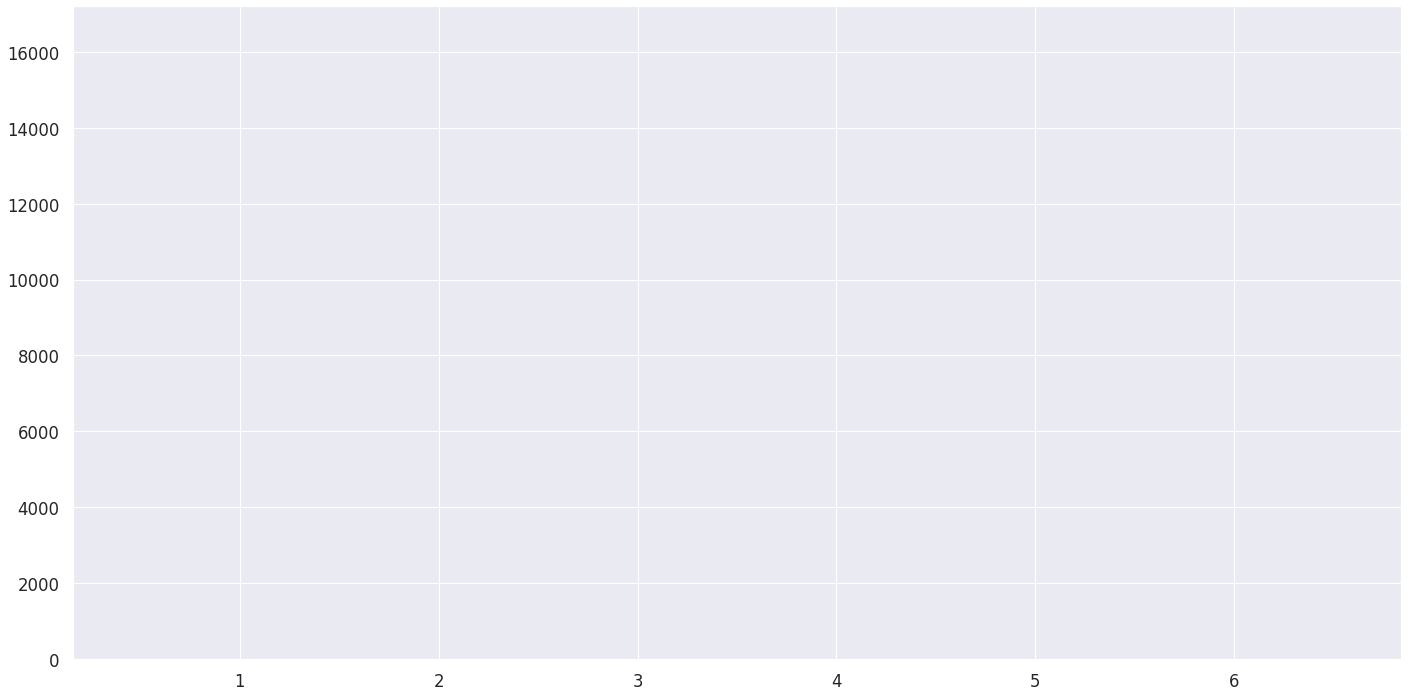

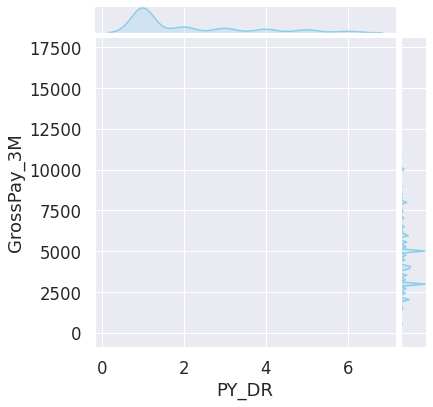

In [ ]:
# ??? why is this guy empty ???

fig, ax = plt.subplots(figsize=(23.811794664043056,12))
g = sns.jointplot(ax=ax, x=stip.PY_DR, y=stip.GrossPay_3M, kind='kde', color="skyblue", ratio=10)   # size/ratio both did not change distribution scale -> how to ???

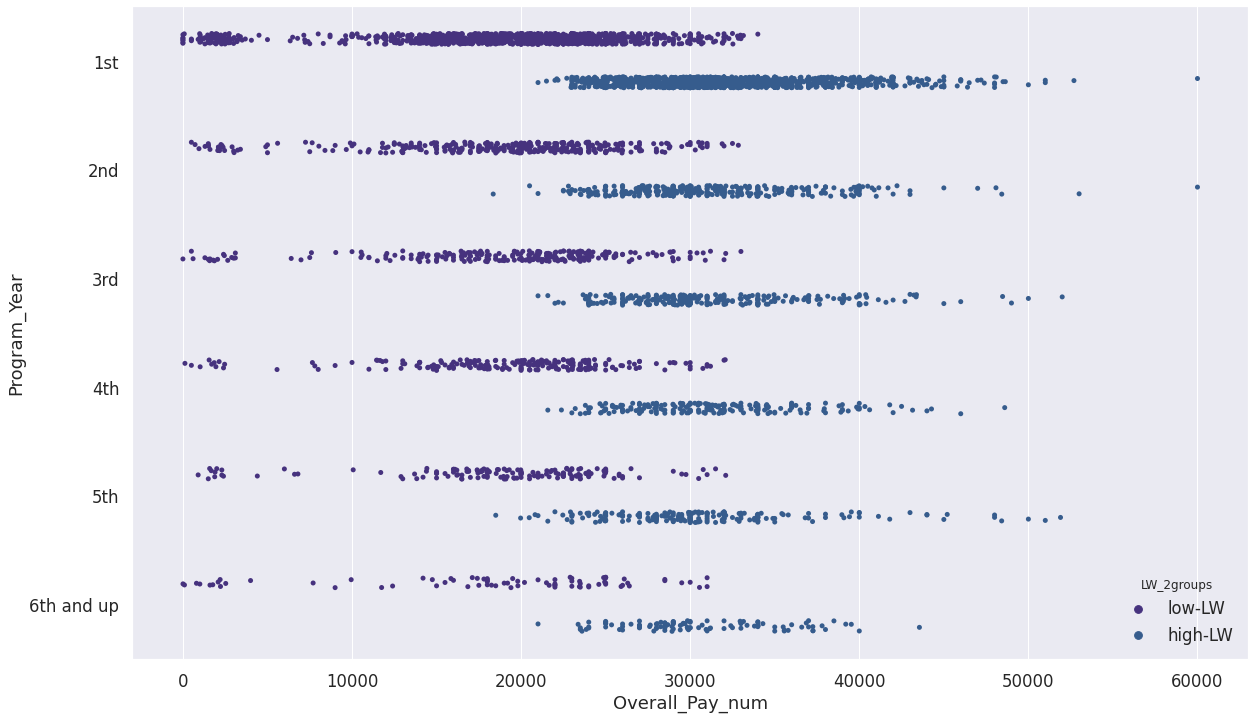

In [ ]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.5, palette='viridis')
sns.stripplot(data=stip, x='Overall_Pay_num', y='Program_Year', jitter=True, hue='LW_2groups', dodge=True)
plt.show()

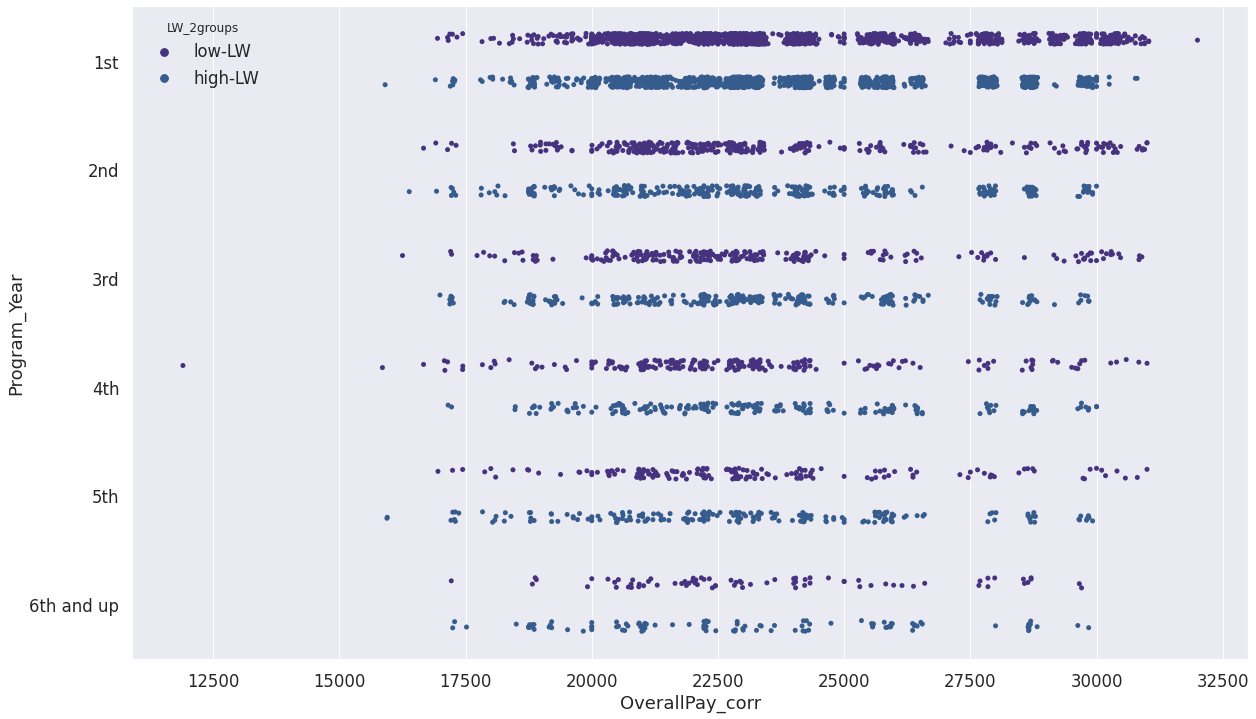

In [ ]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.5, palette='viridis')
sns.stripplot(data=stip, x='OverallPay_corr', y='Program_Year', jitter=True, hue='LW_2groups', dodge=True)
plt.show()

AttributeError: ignored

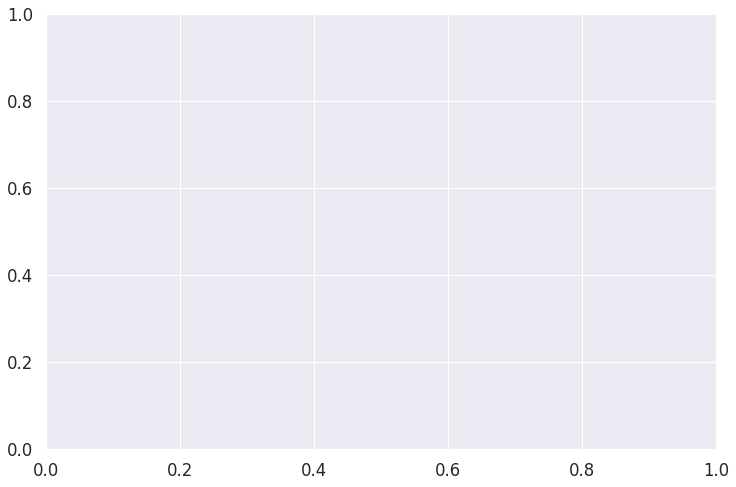

In [ ]:
# question: low vs high earners (binary or numerical)... distribution of 1st/.../6+ year (categoric or numerical) students?

plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette='viridis')
sns.scatterplot(data=stip, x='GP3_binary', y='PY_DR', jitter=True, hue=None, dodge=True)
plt.show()

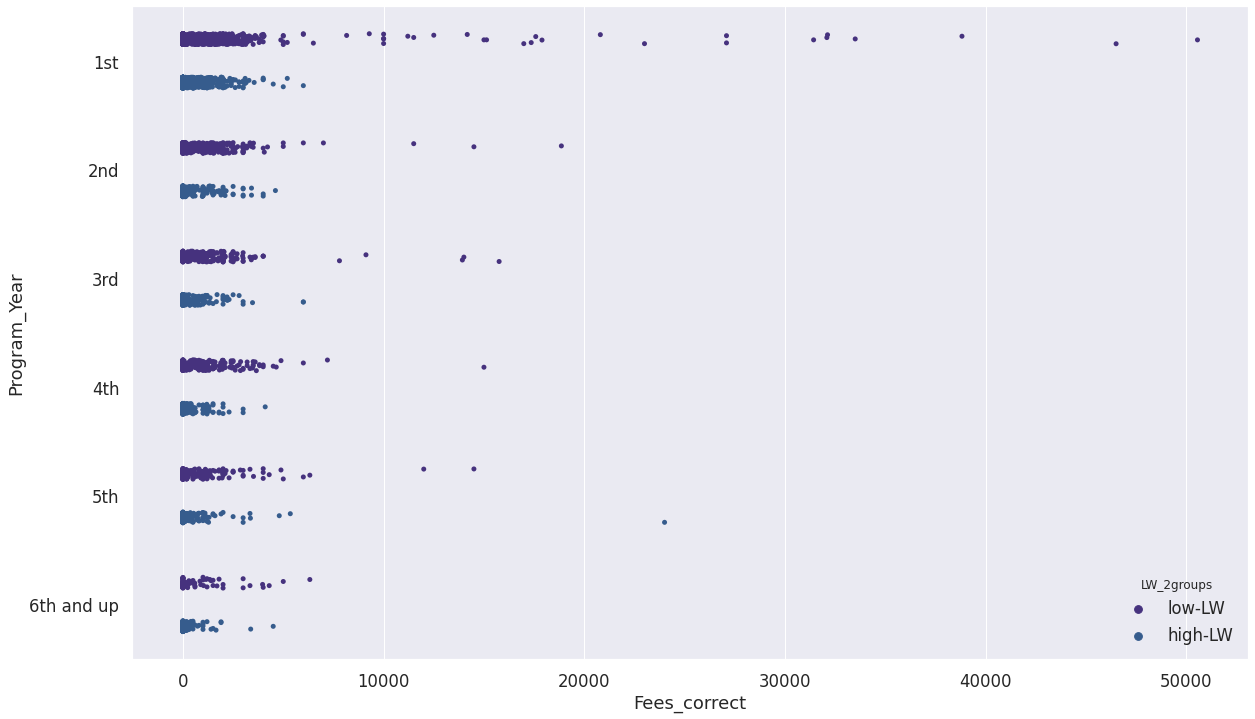

In [ ]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.5, palette='viridis')
sns.stripplot(data=stip, x='Fees_correct', y='Program_Year', jitter=True, hue='LW_2groups', dodge=True)
plt.show()

In [ ]:
stip['Fees_adjusted'] = stip.Fees_correct / stip.LW_Ratio

In [ ]:
# CREATE A 2ND VERSION ZOOMING IN TO THE 1-50K RANGE -> SOME RATIOS ARE INCREDIBLY LOW... IMPOSSIBLE!

plt.figure(figsize=(20,12))
sns.set(font_scale=1.5, palette='viridis')
sns.stripplot(data=stip, x='Fees_adjusted', y='Program_Year', jitter=True, hue='LW_2groups', dodge=True)
plt.show()

NameError: ignored

(array([ 70., 195.,  59.,  20.,  20.,  23.,  28.,  48.,  36.,  70., 175.,
        242., 251., 432., 253., 496., 497., 335., 568., 558., 628., 456.,
        428., 840., 425., 317., 375., 176., 120.,  90., 152.,  66.,  47.,
         39.,  27.,  13.,  15.,   8.,   7.,   7.,   9.,   3.,   2.,   5.,
          2.,   1.,   6.,   0.,   0.,   5.]),
 array([0.0, 1300.0, 2600.0, 3900.0, 5200.0, 6500.0, 7800.0, 9100.0,
        10400.0, 11700.0, 13000.0, 14300.0, 15600.0, 16900.0, 18200.0,
        19500.0, 20800.0, 22100.0, 23400.0, 24700.0, 26000.0, 27300.0,
        28600.0, 29900.0, 31200.0, 32500.0, 33800.0, 35100.0, 36400.0,
        37700.0, 39000.0, 40300.0, 41600.0, 42900.0, 44200.0, 45500.0,
        46800.0, 48100.0, 49400.0, 50700.0, 52000.0, 53300.0, 54600.0,
        55900.0, 57200.0, 58500.0, 59800.0, 61100.0, 62400.0, 63700.0,
        65000.0], dtype=object),
 <a list of 50 Patch objects>)

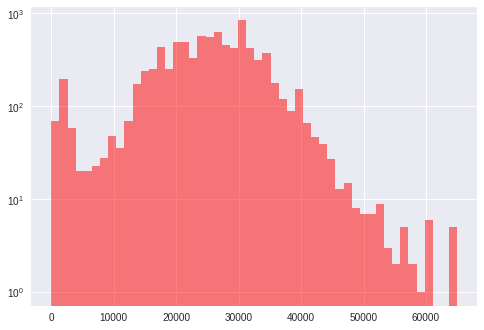

In [ ]:
# distribution with 2 peaks: typical stipends seem to be around 20-30k or close to 0 ...

plt.hist(stip.GrossPay_sumOf3, label = "GrossPay_sumOf3", log=True, bins=50, alpha=0.5, color="red") 

In [ ]:
stip.loc[stip.Overall_Pay_num == np.nan]

Empty DataFrame
Columns: [University, Department, Overall_Pay, LW_Ratio, Academic_Year, Program_Year, 12_M_Gross_Pay, 9_M_Gross_Pay, 3_M_Gross_Pay, Fees, Comments, PY_DR, Acad_Y, Overall_Pay_num, GrossPay_12M, GrossPay_9M, GrossPay_3M, GrossPay_sumOf3, Fees_num, MissingFees_DR, Fees_correct, OP_DR, OP_doublecheck, LW_2groups, Dep_DR, Dep_DR_top14]
Index: []

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 9.000e+00,
        3.000e+00, 8.000e+00, 1.300e+01, 4.900e+01, 2.340e+02, 6.400e+01,
        4.500e+01, 6.500e+01, 1.610e+02, 2.770e+02, 5.190e+02, 6.490e+02,
        7.850e+02, 7.770e+02, 9.320e+02, 9.100e+02, 1.011e+03, 7.800e+02,
        5.730e+02, 2.620e+02, 1.810e+02, 1.560e+02, 6.300e+01, 3.000e+01,
        2.300e+01, 1.300e+01, 8.000e+00, 1.000e+00, 3.000e+00, 5.000e+00,
        1.000e+00, 4.000e+00]),
 array([-50000.0, -47700.0, -45400.0, -43100.0, -40800.0, -38500.0,
        -36200.0, -33900.0, -31600.0, -29300.0, -27000.0, -24700.0,
        -22400.0, -20100.0, -17800.0, -15500.0, -13200.0, -10900.0,
        -8600.0, -6300.0, -4000.0, -1700.0, 600.0, 2900.0, 5200.0, 7500.0,
        9800.0, 12100.0, 14400.0, 16700.0, 19000.0, 21300.0, 23600.0,
        25900.0, 28200.0, 3

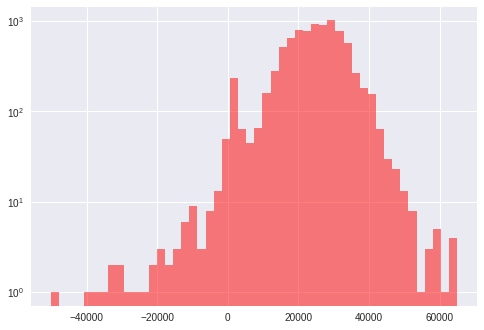

In [ ]:
plt.hist(stip.Overall_Pay_num, label = "Overall_Pay_num", log=True, bins=50, alpha=0.5, color="red") 

In [ ]:
8641-8587

54

In [ ]:
# delete all observations with negative LW_Ratios, since we don't know how much money is worth where these guys live ...

stip = stip.drop(stip[(stip.LW_Ratio < 0)].index)
stip.shape

(8589, 24)

In [ ]:
# delete observations with University = NAN:

stip = stip.drop(stip[(stip.University.isna() == True)].index)
stip.shape

(8333, 24)

In [ ]:
# delete observ. where PY is missing

stip = stip.drop(stip[(stip.PY_DR.isna() == True)].index)
stip.shape


(7488, 24)

In [ ]:
# delete observ. where LW-R is missing

stip = stip.drop(stip[(stip.LW_Ratio.isna() == True)].index)
stip.shape

(6914, 24)

In [ ]:
# delete observ. where Overall Pay is missing - no additional rows to clean :)

stip = stip.drop(stip[(stip.Overall_Pay_num.isna() == True)].index)
stip.shape

(6914, 24)

In [ ]:
# delete observ. where Academic Year is missing

stip = stip.drop(stip[(stip.Acad_Y.isna() == True)].index)
stip.shape

(6913, 24)

In [ ]:
# delete observ. where Dept is missing

stip = stip.drop(stip[(stip.Department.isna() == True)].index)
stip.shape

(6725, 24)

In [ ]:
stip.duplicated(keep=False).sum()

226

In [ ]:
stip[stip.duplicated(keep=False)]

University                                Department Overall_Pay  LW_Ratio Academic_Year Program_Year 12_M_Gross_Pay 9_M_Gross_Pay 3_M_Gross_Pay    Fees                             Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3  Fees_num  OP_DR  OP_doublecheck                                    Dep_DR Dep_DR_top14 GP9_binary
45                  Columbia University (CU)                     Counseling Psychology     $24,766      0.83     2020-2021          1st        $25,000           NaN           NaN    $234                                  NaN      1    2020            24766         25000            0            0            25000       234  24766               0                     Counseling Psychology        Other        low
46                  Columbia University (CU)                     Counseling Psychology     $24,766      0.83     2020-2021          1st        $25,000           NaN           NaN    $234                                  NaN      1    2020            24766         25000            0            0            25000       234  24766               0                     Counseling Psychology        Other        low
69    Virginia Commonwealth University (VCU)                   Biomedical Engineering      $27,000      1.09     2020-2021          5th        $27,000           NaN           NaN     NaN  1000 pay raise after PhD Candidacy       5    2020            27000         27000            0            0            27000      <NA>   <NA>            <NA>                               Engineering  Engineering        low
70    Virginia Commonwealth University (VCU)                   Biomedical Engineering      $27,000      1.09     2020-2021          5th        $27,000           NaN           NaN     NaN  1000 pay raise after PhD Candidacy       5    2020            27000         27000            0            0            27000      <NA>   <NA>            <NA>                               Engineering  Engineering        low
71    Virginia Commonwealth University (VCU)                   Biomedical Engineering      $27,000      1.09     2020-2021          5th        $27,000           NaN           NaN     NaN  1000 pay raise after PhD Candidacy       5    2020            27000         27000            0            0            27000      <NA>   <NA>            <NA>                               Engineering  Engineering        low
...                                      ...                                       ...         ...       ...           ...          ...            ...           ...           ...     ...                                  ...    ...     ...              ...           ...          ...          ...              ...       ...    ...             ...                                       ...          ...        ...
8360                    Duke University (DU)  Cognitive Neuroscience Admitting Program     $29,420      1.56     2014-2015          1st        $29,420           NaN           NaN     NaN                                  NaN      1    2014            29420         29420            0            0            29420      <NA>   <NA>            <NA>  Cognitive Neuroscience Admitting Program        Other        low
8522                    Duke University (DU)                                 Sociology     $27,080      1.44     2014-2015          1st            NaN       $21,580        $5,500     NaN                                  NaN      1    2014            27080             0        21580         5500            27080      <NA>   <NA>            <NA>                                HistPolSoc   HistPolSoc       high
8608             University of Georgia (UGA)                              microbiology     $23,000      1.28     2014-2015          2nd        $25,000           NaN           NaN  $2,000                                  NaN      2    2014            23000         25000            0            0            25000      2000  23

In [ ]:
6725-6604

121

In [ ]:
stip.drop_duplicates(inplace=True)

In [ ]:
stip.shape

(6604, 24)

In [ ]:
stip.columns

Index(['University', 'Department', 'Overall_Pay', 'LW_Ratio', 'Academic_Year',
       'Program_Year', '12_M_Gross_Pay', '9_M_Gross_Pay', '3_M_Gross_Pay',
       'Fees', 'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num',
       'GrossPay_12M', 'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3',
       'Fees_num', 'OP_DR', 'OP_doublecheck', 'Dep_DR', 'Dep_DR_top14',
       'GP9_binary'],
      dtype='object')

## !!! BEFORE DROPPING HIGH FEES, CREATE SEABORN HEATMAP FOR REPORT!!

In [ ]:
stip.drop("12_M_Gross_Pay", axis=1, inplace=True)
stip.drop("9_M_Gross_Pay", axis=1, inplace=True)
stip.drop("3_M_Gross_Pay", axis=1, inplace=True)

In [ ]:
stip.shape

(6604, 21)

In [ ]:
stip.drop("OP_DR", axis=1, inplace=True)
stip.drop("OP_doublecheck", axis=1, inplace=True)

In [ ]:
stip.shape

(6604, 19)

In [ ]:
stip.drop("Overall_Pay", axis=1, inplace=True)

In [ ]:
stip.shape

(6604, 18)

In [ ]:
sns.set(font_scale=1.4)

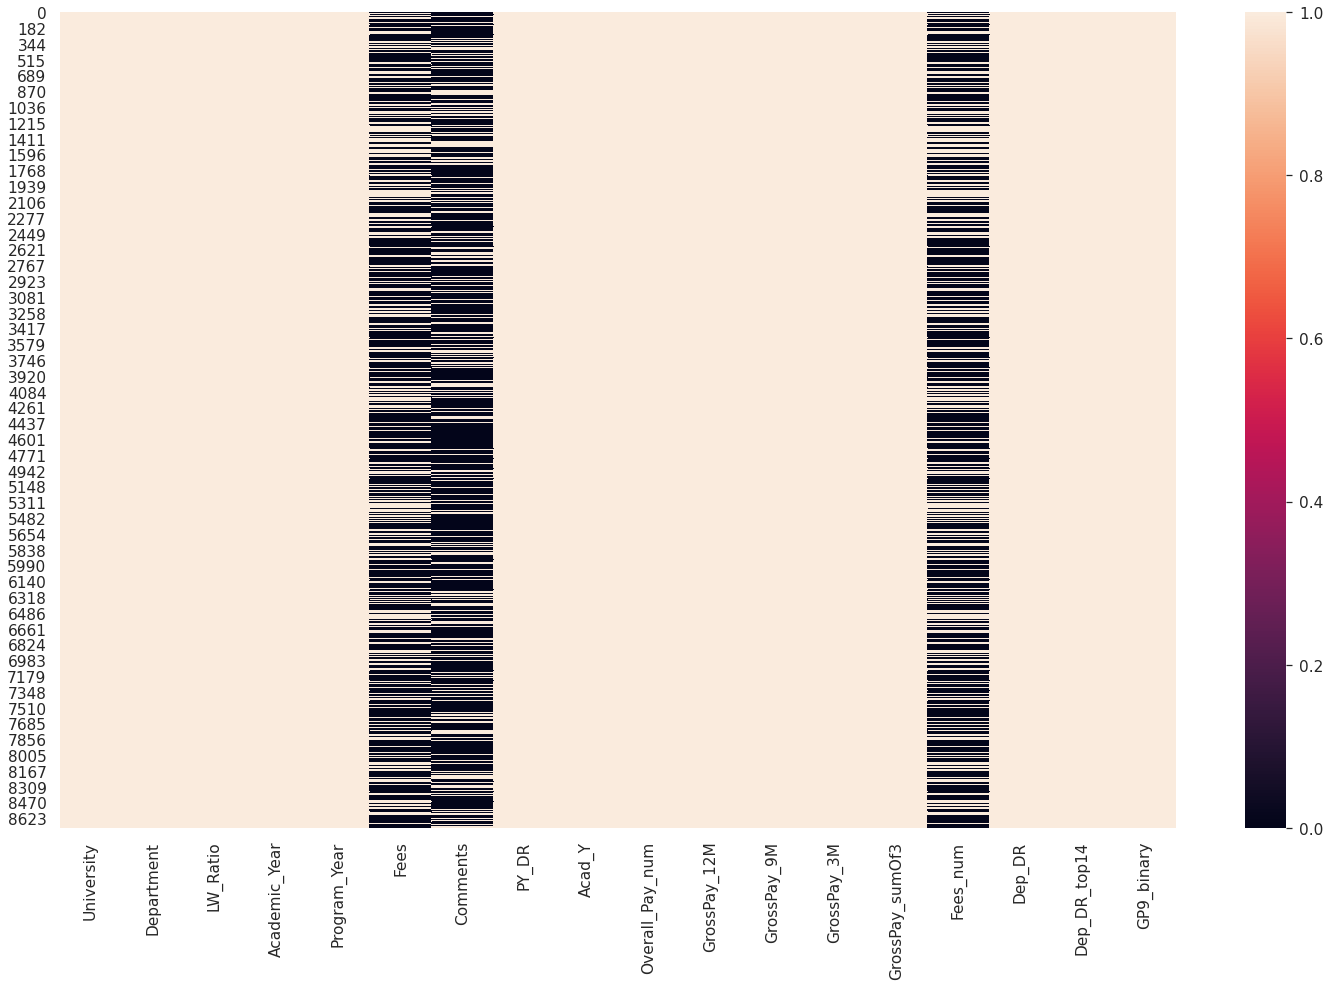

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(stip.notna())
plt.show()

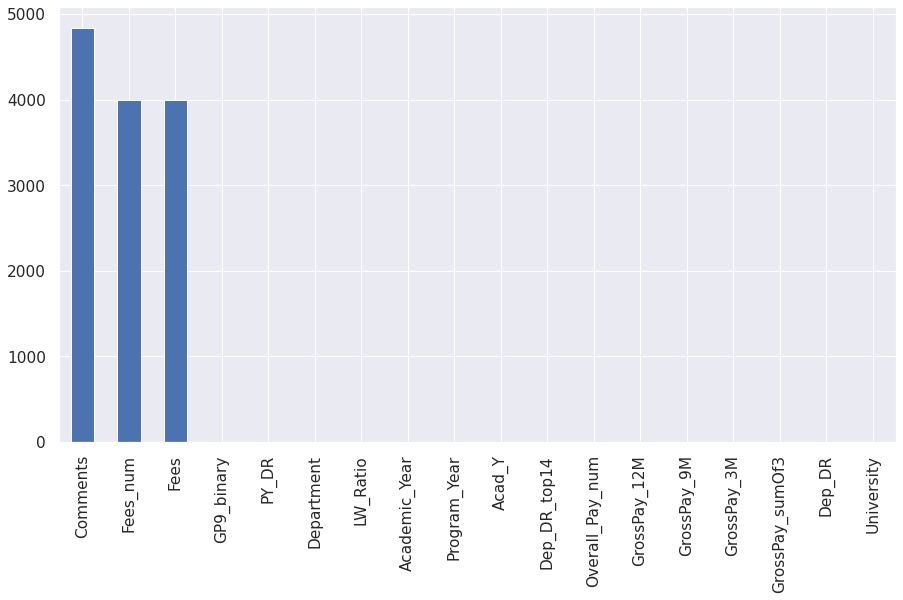

In [ ]:
stip.isnull().sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,8), logy=False)

## IMPUTE FEE-NAN -> -> above ...

In [ ]:
stip.shape

(6604, 20)

In [ ]:
# Fees_correct: cut # 58k!

stip = stip.drop(stip[(stip.Fees_correct > 58000)].index)
stip.shape

(6604, 20)

(array([5.378e+03, 7.300e+02, 2.690e+02, 1.060e+02, 3.900e+01, 2.100e+01,
        5.000e+00, 3.000e+00, 2.000e+00, 1.000e+01, 1.000e+00, 6.000e+00,
        2.000e+00, 3.000e+00, 7.000e+00, 1.000e+00, 1.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.0, 1011.1, 2022.2, 3033.3, 4044.4, 5055.5, 6066.6, 7077.7,
        8088.8, 9099.9, 10111.0, 11122.1, 12133.2, 13144.300000000001,
        14155.4, 15166.5, 16177.6, 17188.7, 18199.8, 19210.9, 20222.0,
        21233.100000000002, 22244.2, 23255.3, 24266.4, 25277.5,
        26288.600000000002, 27299.7, 28310.8, 29321.9, 30333.0,
        31344.100000000002, 32355.2, 

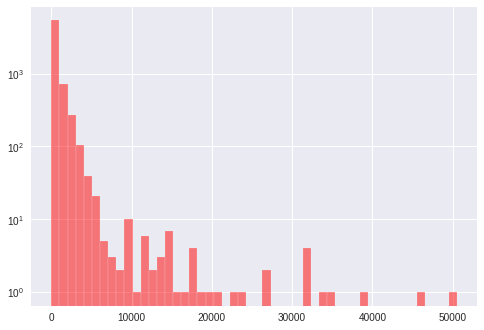

In [ ]:
plt.hist(stip.Fees_correct, label = "Fees_correct", log=True, bins=50, alpha=0.5, color="red") 

In [ ]:
stip.drop("Fees", axis=1, inplace=True)
stip.drop("Fees_num", axis=1, inplace=True)

In [ ]:
stip.shape

(6604, 18)

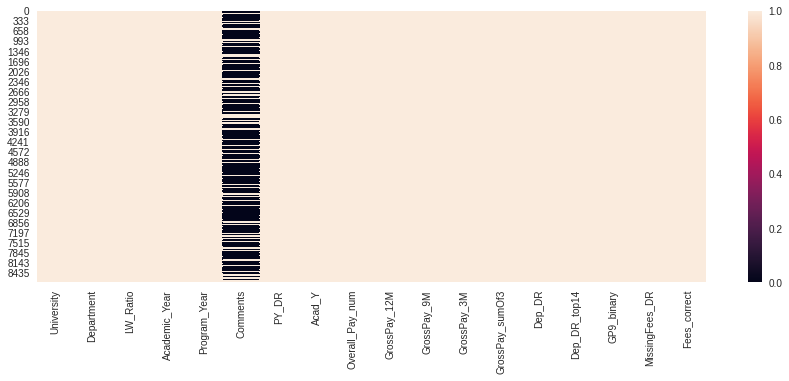

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(stip.notna())
plt.show()

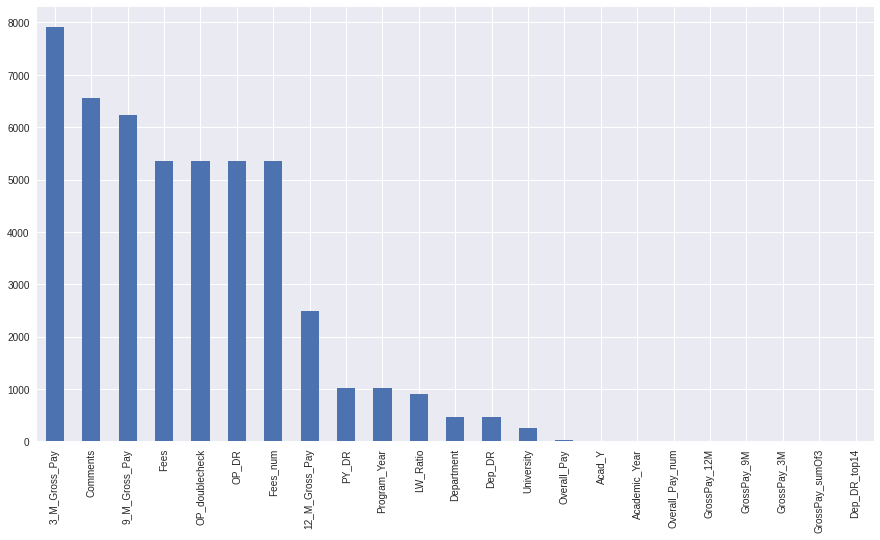

In [ ]:
stip.isnull().sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,8), logy=False)

## CLEAN DATASET - still missing in CLEAN_6725: ! FEE SYNC STUFF !!! ... &  integrating the University thing..?? or extra 2 separate ????



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# forget about this old dataframe

from google.colab import files

stip.to_csv('stip_final.csv')
files.download('stip_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## GGPLOT2 / PLOTNINE

In [ ]:
pip install plotnine

In [ ]:
# https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129 

In [ ]:
from pandas.api.types import CategoricalDtype
from plotnine import *

ImportError: ignored

## FEATURE ENGINEERING & VISUALIZATIONS

In [ ]:
stip.University = stip.University.str.replace('(', '')
stip.University = stip.University.str.replace(')', '')

In [ ]:
stip.University.value_counts(dropna=False).sort_values(ascending=False)

Duke University DU                                152
University of North Carolina - Chapel Hill UNC    131
University of Michigan - Ann Arbor UM             121
University of California - Berkeley               119
University of Southern California USC             113
                                                 ... 
Texas Tech University TTU                          22
University of Alabama - Birmingham UAB             21
University of Houston UH                           20
Oklahoma State University OSU                      20
Washington State University WSU                    20
Name: University, Length: 99, dtype: int64

In [ ]:
uni_freq_all = stip.University.value_counts(dropna=False).sort_values(ascending=False)
uni_freq_all[0:9]

Duke University DU                                 152
University of North Carolina - Chapel Hill UNC     131
University of Michigan - Ann Arbor UM              121
University of California - Berkeley                119
University of Southern California USC              113
University of Wisconsin - Madison UW               109
University of California - San Diego UCSD          103
University of Pennsylvania                         101
University of Illinois - Urbana- Champaign UIUC    101
Name: University, dtype: int64

In [ ]:
list_unis = list(uni_freq_all.index)
list_unis[0:19]

['Duke University DU',
 'University of North Carolina - Chapel Hill UNC',
 'University of Michigan - Ann Arbor UM',
 'University of California - Berkeley',
 'University of Southern California USC',
 'University of Wisconsin - Madison UW',
 'University of California - San Diego UCSD',
 'University of Pennsylvania',
 'University of Illinois - Urbana- Champaign UIUC',
 'University of Texas - Austin UT',
 'Northwestern University NU',
 'Stanford University SU',
 'Georgia Institute of Technology Georgia Tech',
 'University of Minnesota - Twin Cities UM',
 'Pennsylvania State University Penn State',
 'Cornell University CU',
 'University of Chicago UC',
 'Harvard University HU',
 'University of California - Los Angeles UCLA']

In [ ]:
# repeat both saves if needed without brackets ...

from google.colab import files

uni_freq_all.to_csv('uni_freq_all.csv')
files.download('uni_freq_all.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dict_long = {'Duke University DU': 78.9382,
 'University of North Carolina - Chapel Hill UNC': -79.046761,
 'University of Michigan - Ann Arbor UM': -83.73822,
 'University of California - Berkeley': 122.2585,
 'University of Southern California USC': 118.2851,
 'University of Wisconsin - Madison UW': 89.4125,
 'University of California - San Diego UCSD': 117.2340,
 'University of Pennsylvania': -79.160004,
 'University of Illinois - Urbana- Champaign UIUC': -88.228333,
 'University of Texas - Austin UT': 97.7489,
 'Northwestern University NU': 87.675171, 
 'Stanford University SU': -122.168861,                                   # am weitesten rechts, ob-unt Mitte
 'Georgia Institute of Technology Georgia Tech': 84.3963,
 'University of Minnesota - Twin Cities UM': 93.2331,
 'Cornell University CU': 76.4735,
 'Pennsylvania State University Penn State': 77.8599,
 'University of Chicago UC': -87.599724,
 'Harvard University HU': -71.116943,
 'University of California - Los Angeles UCLA': 122.258423}

In [ ]:
dict_lat = {'Duke University DU': 36.0014,
 'University of North Carolina - Chapel Hill UNC': 35.904613,
 'University of Michigan - Ann Arbor UM': 42.278046,
 'University of California - Berkeley': 37.8719,
 'University of Southern California USC': 34.0224,
 'University of Wisconsin - Madison UW': 43.0766,
 'University of California - San Diego UCSD': 32.8801,
 'University of Pennsylvania': 40.617001,
 'University of Illinois - Urbana- Champaign UIUC': 40.110558,
 'University of Texas - Austin UT': 30.2146,
 'Northwestern University NU': 42.055984,
 'Stanford University SU': 37.42823,
 'Georgia Institute of Technology Georgia Tech': 33.7756,
 'University of Minnesota - Twin Cities UM': 44.9754,
 'Cornell University CU': 42.4534,
 'Pennsylvania State University Penn State': 40.7982,
 'University of Chicago UC': 41.789722,
 'Harvard University HU': 42.374443,
 'University of California - Los Angeles UCLA': 37.871853}

In [ ]:
aspect_ratio = (117.2340-93.2331) / (44.9754-32.8801)
aspect_ratio

1.984316222003588

In [ ]:
unidept_freq_above6 = stip_no_other_unideptAbove6.uni_and_dept.value_counts(dropna=False).sort_values(ascending=False)
unidept_freq_above6

Georgia Institute of Technology Georgia Tech_Engineering     40
University of North Carolina - Chapel Hill UNC_HistPolSoc    31
University of California - Los Angeles UCLA_HistPolSoc       22
Stanford University SU_Engineering                           21
University of Texas - Austin UT_HistPolSoc                   20
                                                             ..
University of Pittsburgh_HistPolSoc                           7
North Carolina State University NCSU_Engineering              7
Emory University_ArtsAndTheology                              7
Columbia University CU_HistPolSoc                             7
University of Rochester UR_Engineering                        7
Name: uni_and_dept, Length: 117, dtype: int64

In [ ]:
from google.colab import files

unidept_freq_above6.to_csv('unidept_freq_above6_final.csv')
files.download('unidept_freq_above6_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
stip['longitude']= stip['University'].map(dict_long)

In [ ]:
stip['latitude']= stip['University'].map(dict_lat)

In [ ]:
stip_no_other_unideptAbove6['longitude']= stip_no_other_unideptAbove6['University'].map(dict_long)

In [ ]:
stip_no_other_unideptAbove6['latitude']= stip_no_other_unideptAbove6['University'].map(dict_lat)

In [ ]:
stip.longitude.describe()

count    1971.000000
mean       29.384396
std        90.266783
min      -122.168861
25%       -79.160004
50%        78.938200
75%        97.748900
max       122.258500
Name: longitude, dtype: float64

In [ ]:
stip.latitude.describe()

count    1971.000000
mean       38.587066
std         3.928206
min        30.214600
25%        35.904613
50%        37.871900
75%        42.278046
max        44.975400
Name: latitude, dtype: float64

In [ ]:
stip_GPS = stip.drop(stip[stip.longitude.isna() == True].index)
len(stip_GPS)

1971

In [ ]:
stip_no_other_unideptAbove6_GPS = stip_no_other_unideptAbove6.drop(stip_no_other_unideptAbove6[stip_no_other_unideptAbove6.longitude.isna() == True].index)
len(stip_no_other_unideptAbove6_GPS)

55

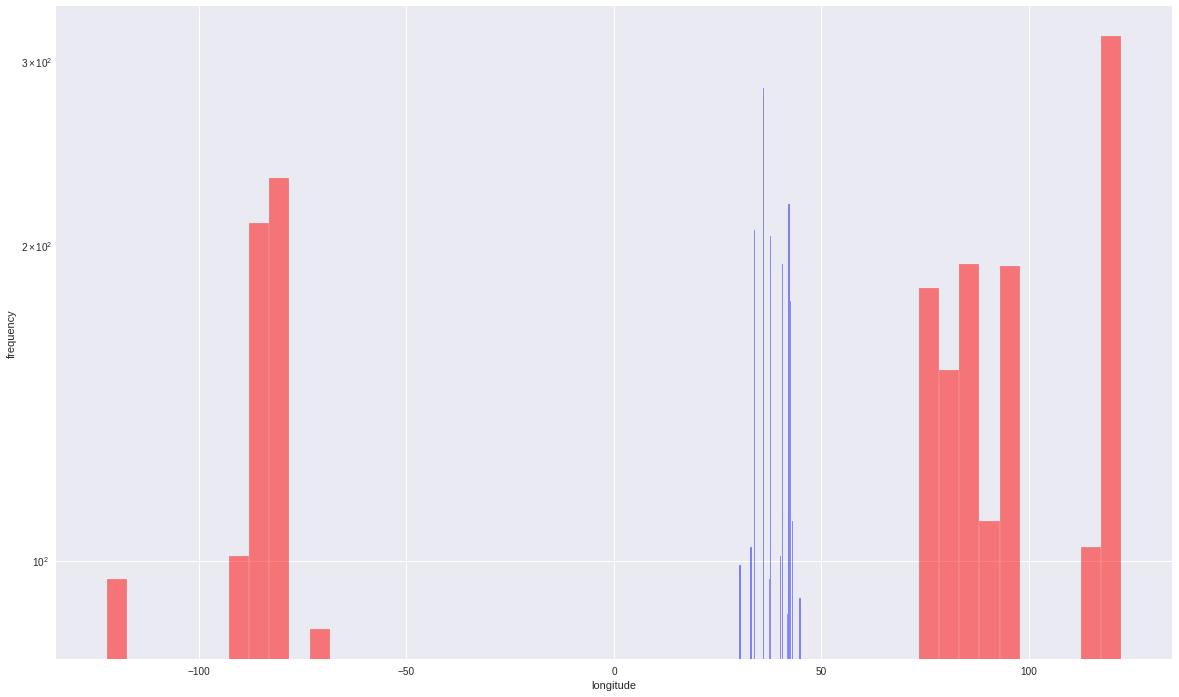

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (20,12))
plt.hist(stip_GPS.longitude, label = "longitude", log=True, bins=50, alpha=0.5, color="red")              
#plt.hist(stip.GrossPay_9M, label = "GrossPay_9M", log=True, bins=50, alpha=0.5, color="blue")
#plt.hist(stip.GrossPay_3M, label = "GrossPay_3M", log=True, bins=50, alpha=0.5, color="black")
# plt.hist(max_products_per_member, bins=8, label = "max_products_per_member", alpha=0.5, color="blue")
# plt.yscale("log")
plt.hist(stip_GPS.latitude, label = "latitude", log=True, bins=50, alpha=0.5, color="blue")              
plt.xlabel("longitude")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

In [ ]:
# forget about percentile! just use 0

# np.percentile(stip.longitude.dropna(), 50)

In [ ]:
stip['long_2groups'] = np.where((stip.longitude > 0), 'West', 'East')
stip['long_2groups'].value_counts(dropna=False)

East    4268
West    1161
Name: long_2groups, dtype: int64

In [ ]:
# forget about this. just take 39. visual inspection -> clustering by human sense ;) ...
# np.percentile(stip.latitude.dropna(), 50)

37.8719

In [ ]:
stip['lat_2groups'] = np.where((stip.latitude > 39), 'North', 'South')
stip['lat_2groups'].value_counts(dropna=False)

South    4450
North     979
Name: lat_2groups, dtype: int64

In [ ]:
aspect_ratio *12

23.811794664043056

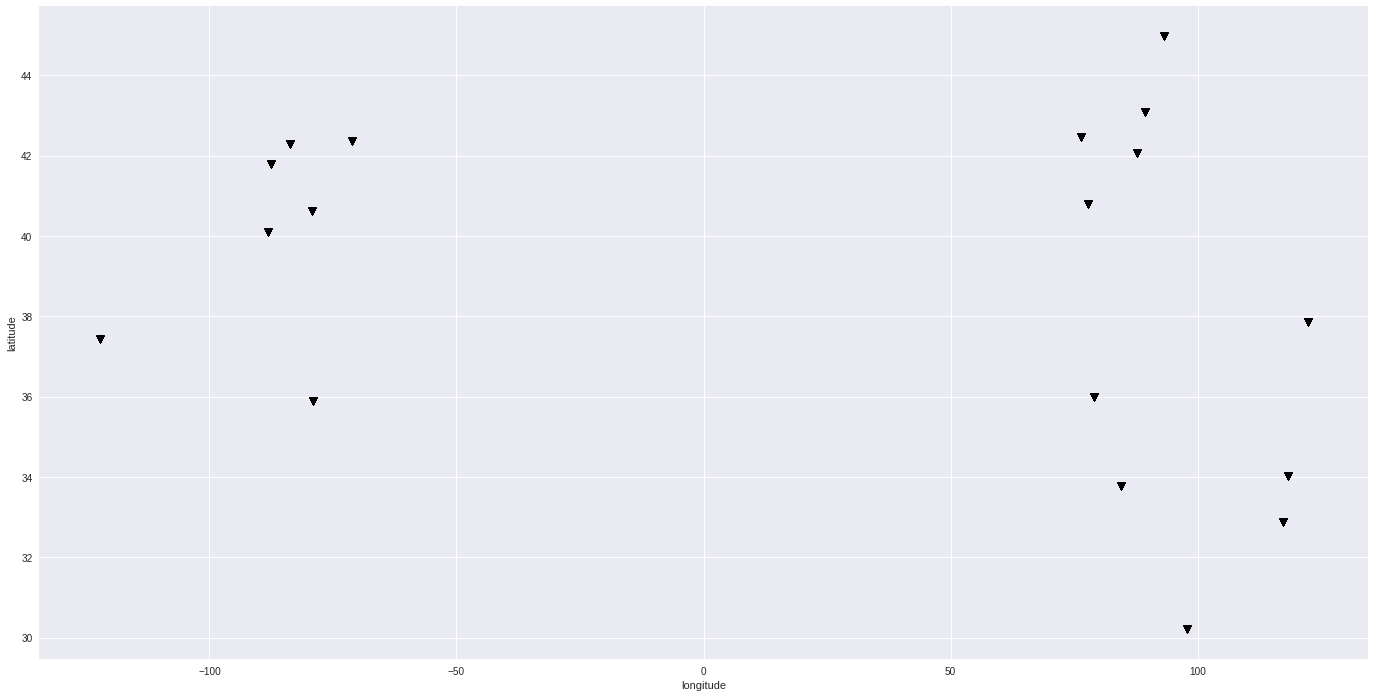

In [ ]:
# 2 obvious groups would be: EAST vs. WEST?

plt.style.use('seaborn')
plt.figure(figsize = (23.811794664043056,12))

# plt.scatter(PROVIDENCE.MM_Loc_Long, PROVIDENCE.MM_Loc_Lat, marker='v', color='red')
# plt.scatter(KENT.MM_Loc_Long, KENT.MM_Loc_Lat, marker='v', color='magenta')
plt.scatter(stip.longitude, stip.latitude, marker='v', color='black')


# plt.xscale("log")                      # <- no. looks better with linear x-scale! :)
# plt.yscale("log")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.grid(True)
plt.show()

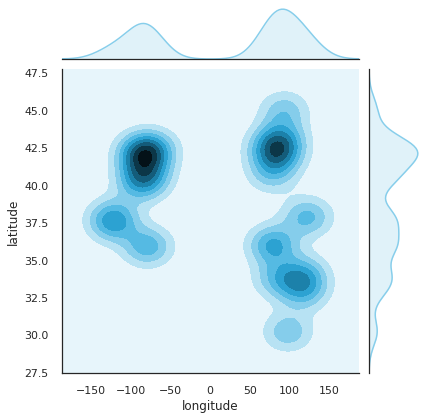

In [ ]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=stip.longitude, y=stip.latitude, kind='kde', color="skyblue")

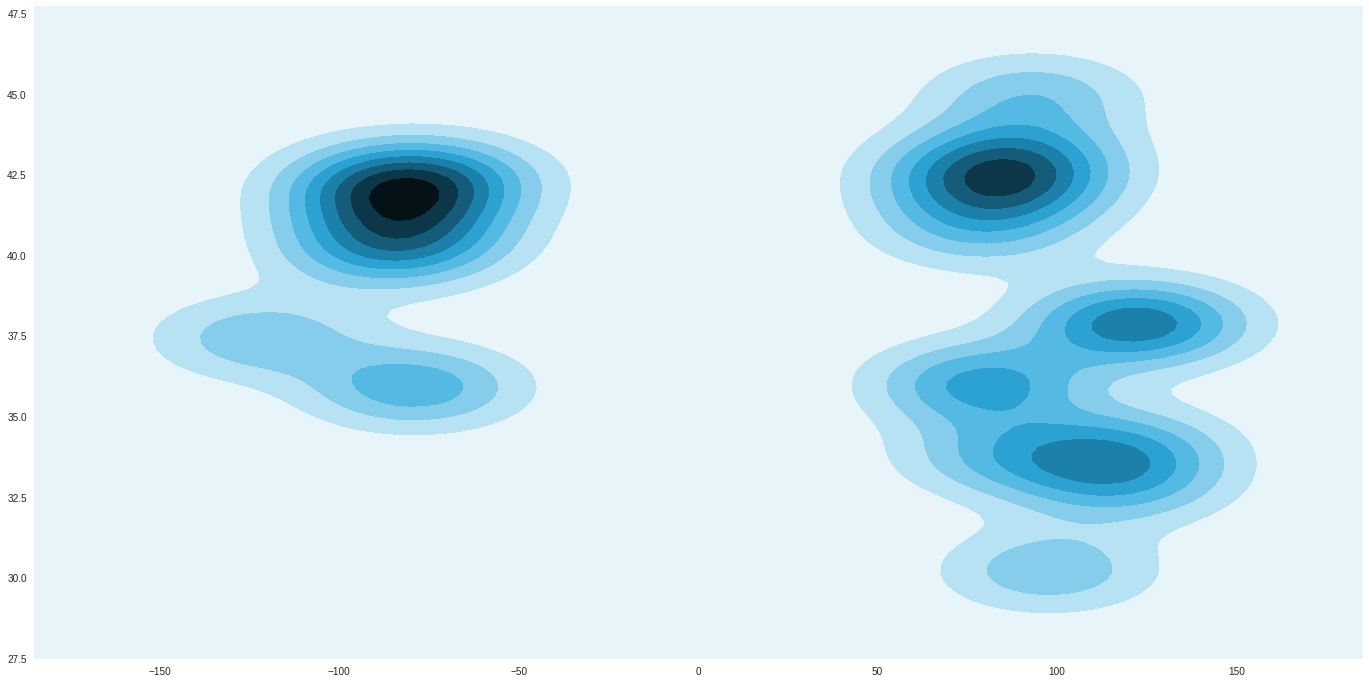

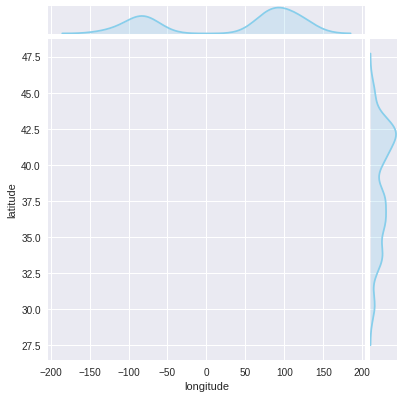

In [ ]:
# 8ung!!!! INVERT THIS IMAGE, since right part is West, left East!!! ;) ...
# use California, San Diego (links unten) and Minnesota Twin Cities (rechts oben) to calculate image ratio



fig, ax = plt.subplots(figsize=(23.811794664043056,12))
g = sns.jointplot(ax=ax, x=stip.longitude, y=stip.latitude, kind='kde', color="skyblue", ratio=10)   # size/ratio both did not change distribution scale -> how to ???

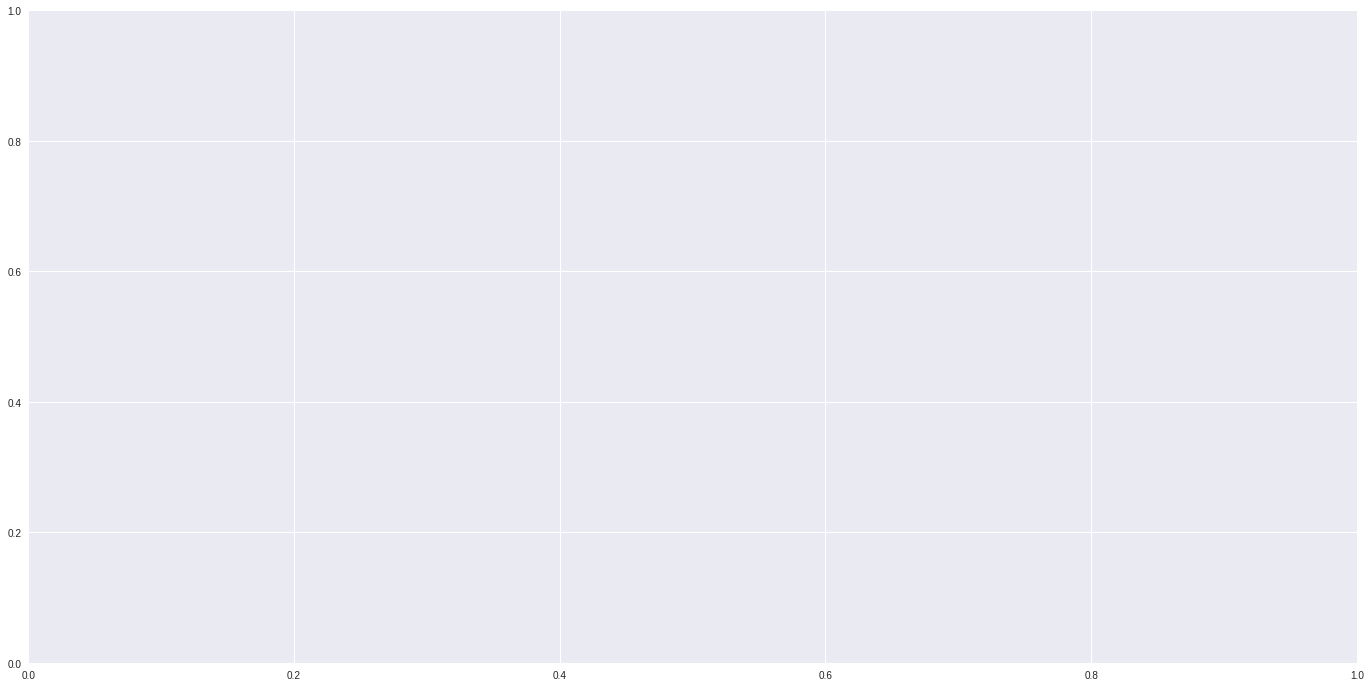

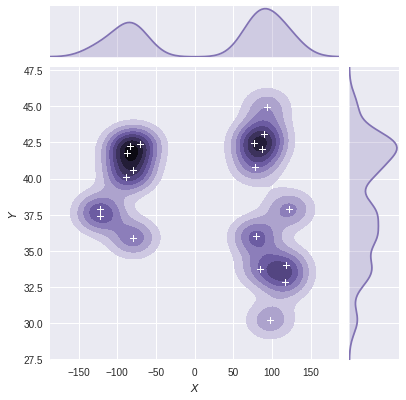

In [ ]:
fig, ax = plt.subplots(figsize=(23.811794664043056,12))
g = sns.jointplot(x='longitude', y='latitude', data=stip, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

In [ ]:
np.percentile(stip.Overall_Pay_num, 50)

26350.0

In [ ]:
stip['OP_2groups'] = np.where((stip.Overall_Pay_num > 26350), 'highPay', 'lowPay')
stip['OP_2groups'].value_counts(dropna=False)

lowPay     2716
highPay    2713
Name: OP_2groups, dtype: int64

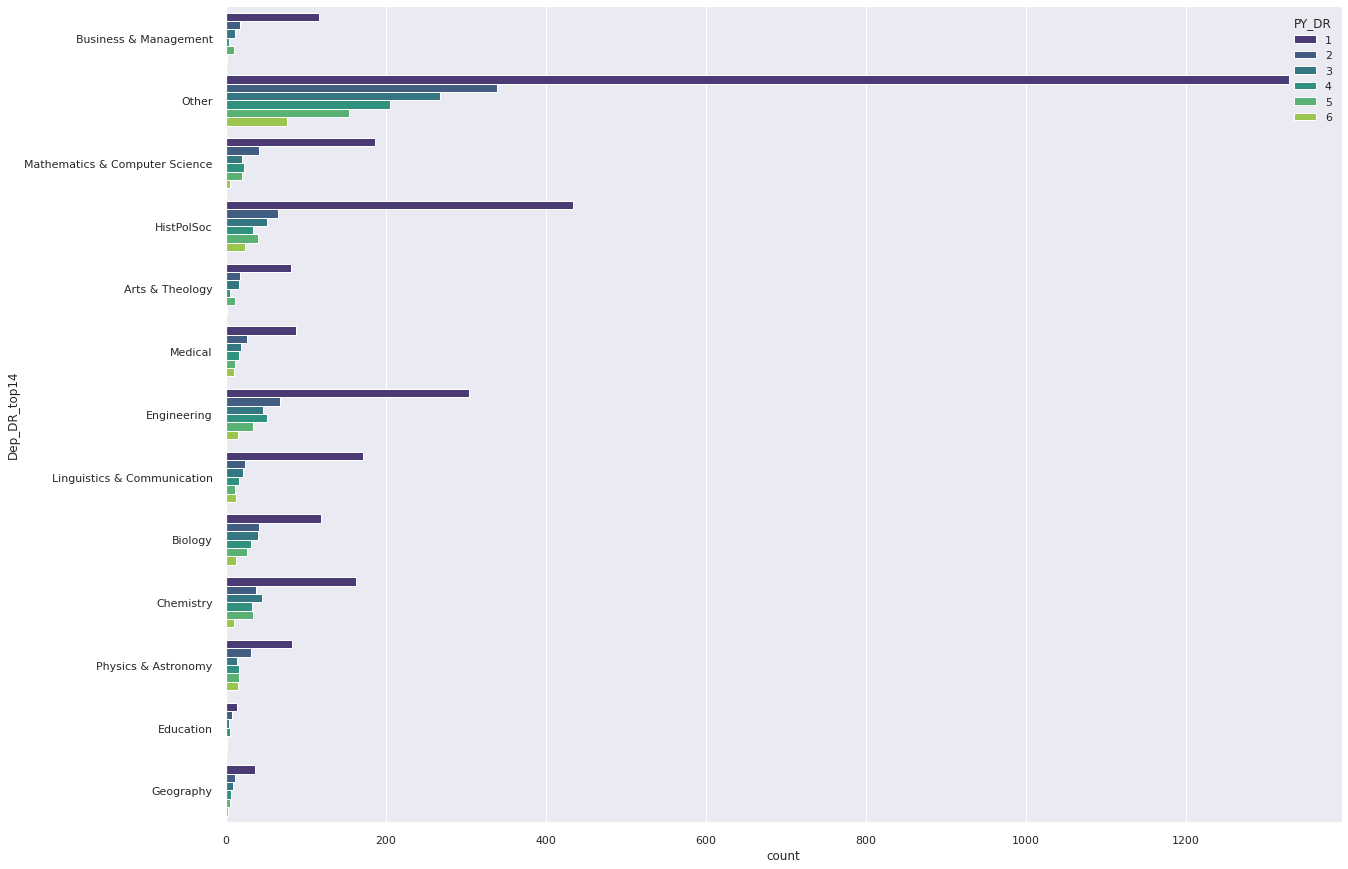

In [ ]:
# reflects FREQUENCIES of observations falling into these cats!???

plt.figure(figsize=(20,15))
sns.set(palette='viridis')
sns.countplot(data=stip, y='Dep_DR_top14', hue='PY_DR')

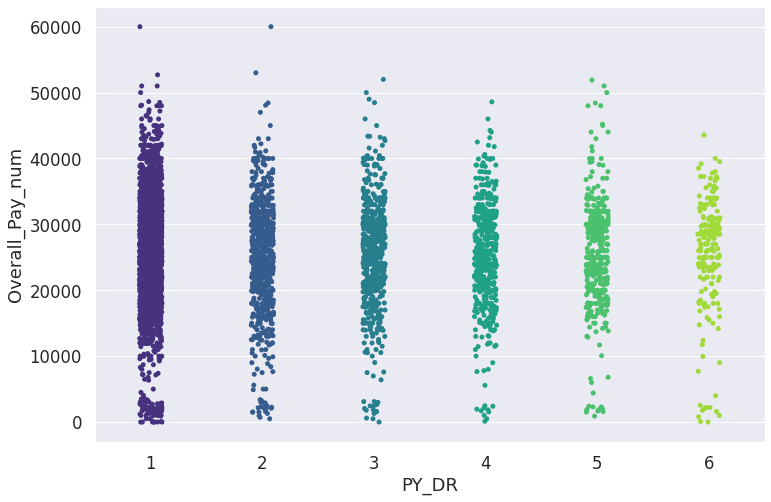

In [ ]:
# Is it true, that some of the PhD students really get no stipend? (see question in google spreadsheet)

plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette='viridis')
sns.stripplot(data=stip, x='PY_DR', y='Overall_Pay_num', jitter=True, hue=None, dodge=False)
plt.show()

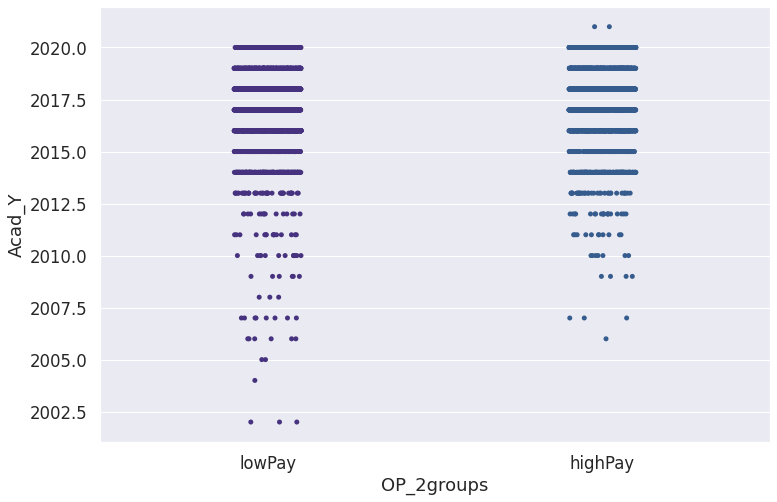

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette='viridis')
sns.stripplot(data=stip, x='OP_2groups', y='Acad_Y', jitter=True, hue=None, dodge=False)
plt.show()

TypeError: ignored

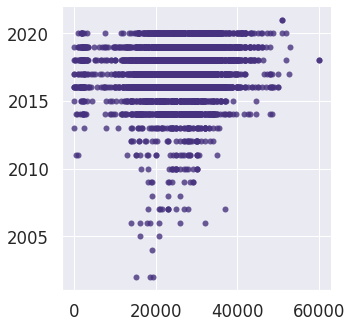

In [ ]:
sns.lmplot(data=stip, x='Overall_Pay_num', y='Acad_Y')   # hue='PY_DR', not really useful here
plt.show()

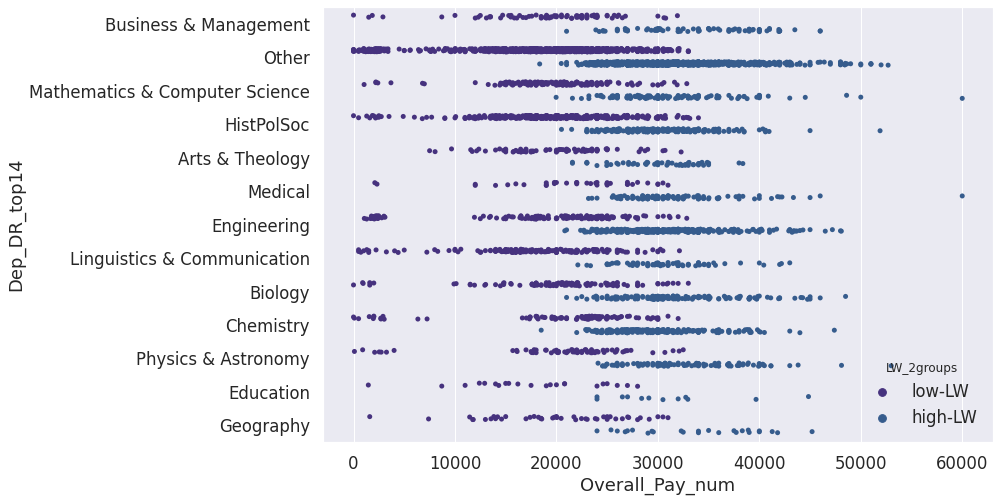

In [ ]:
# categoric vars with just 2-3 levels are basically missing from stipends data ... -> create some interesting ones, e.g. low vs high GP/LW/ ...
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette='viridis')
sns.stripplot(data=stip, x='Overall_Pay_num', y='Dep_DR_top14', jitter=True, hue='LW_2groups', dodge=True)
plt.show()

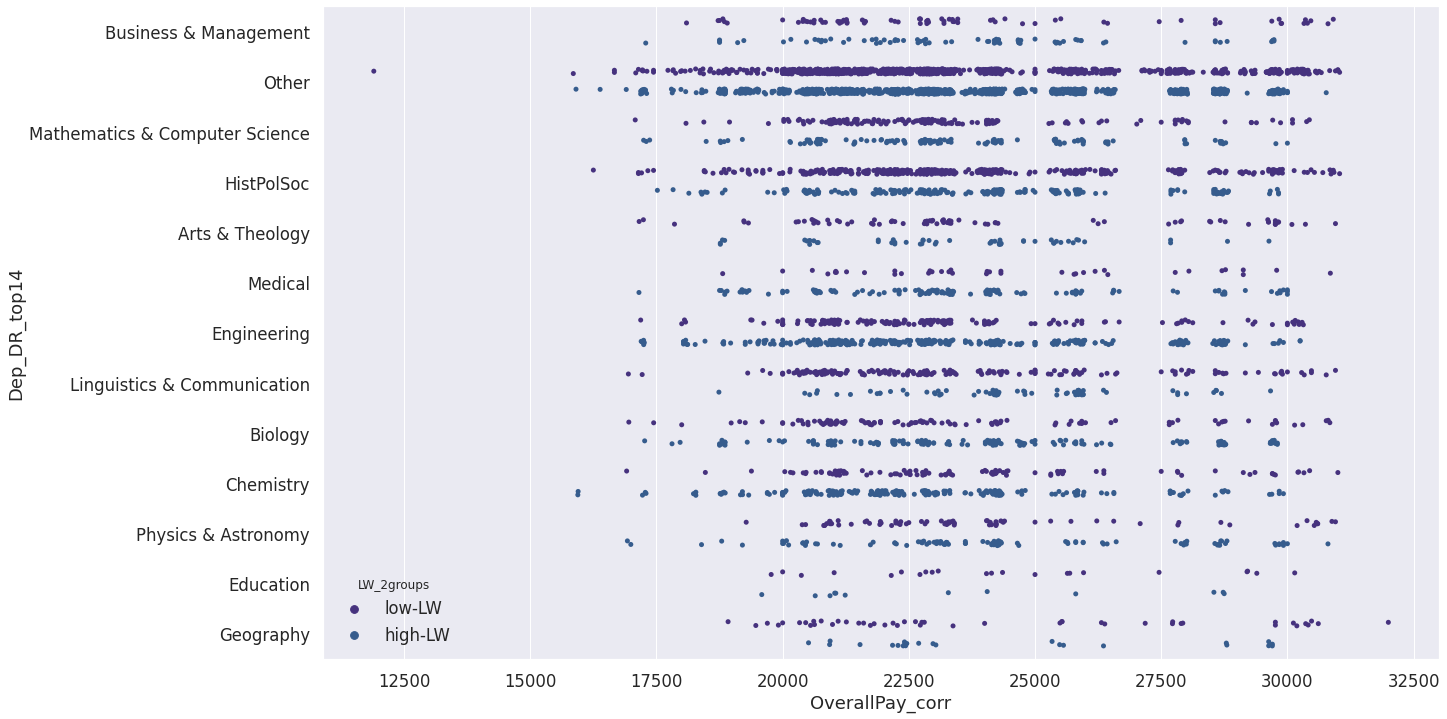

In [ ]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.5, palette='viridis')
sns.stripplot(data=stip, x='OverallPay_corr', y='Dep_DR_top14', jitter=True, hue='LW_2groups', dodge=True)
plt.show()

KeyboardInterrupt: ignored

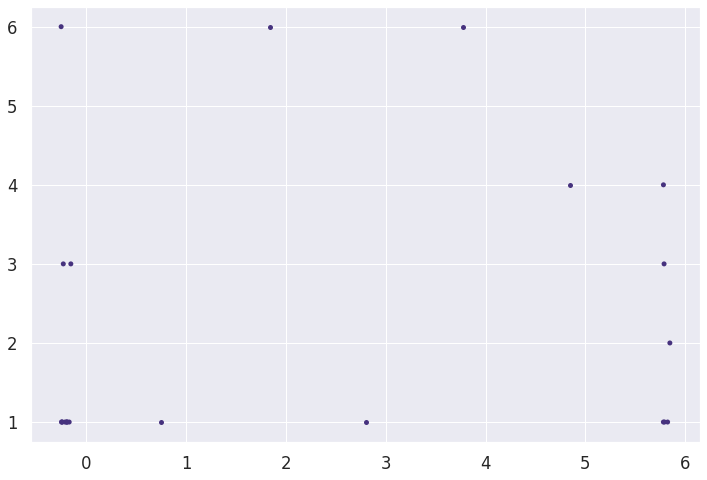

In [ ]:
# categoric vars with just 2-3 levels are basically missing from stipends data ... -> create some interesting ones, e.g. low vs high GP/LW/ ...
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette='viridis')
sns.stripplot(data=stip, x='Overall_Pay_num', y='Program_Year', jitter=True, hue='LW_2groups', dodge=True)
plt.show()

In [ ]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

AttributeError: ignored

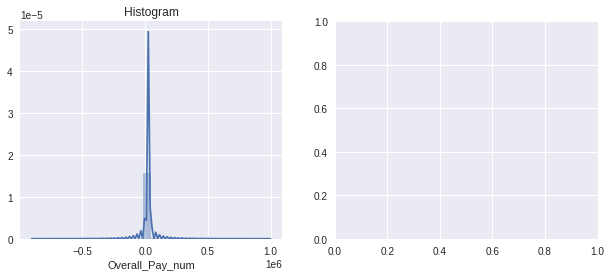

In [ ]:
diagnostic_plots(stip, 'Overall_Pay_num')

AttributeError: ignored

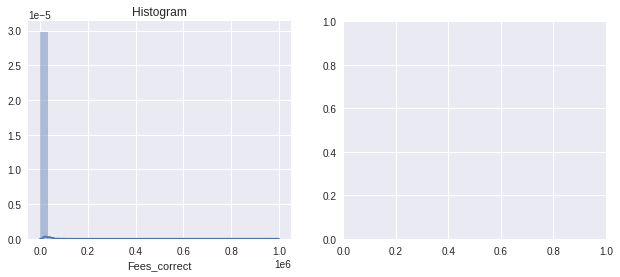

In [ ]:
diagnostic_plots(stip, 'Fees_correct')

In [ ]:
stip_cleaned_num.columns

Index(['LW_Ratio', 'Acad_Y', 'PY_DR', 'GrossPay_3M', 'GrossPay_9M',
       'GrossPay_12M', 'GrossPay_sumOf3', 'Fees_correct', 'Overall_Pay_num'],
      dtype='object')

TypeError: ignored

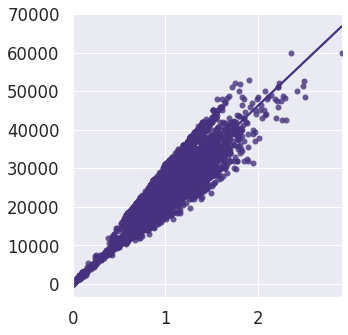

In [ ]:
# (PD bootcamp 2020: simple LinReg model ...)

sns.lmplot(data=stip_cleaned_num, x='LW_Ratio', y='Overall_Pay_num')   # hue='PY_DR', not really useful here
plt.show()

In [ ]:
# SciPy LinReg:

stats.linregress(x=stip_cleaned_num.LW_Ratio, y=stip_cleaned_num.Overall_Pay_num)

AttributeError: ignored

In [ ]:
''' The ANOVA test has important assumptions that must be satisfied in order for 
the associated p-value to be valid:

1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. 
   This property is known as homoscedasticity. 
   
   from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html 
   '''

In [ ]:
# One-Way-ANOVA using SciPy
# from https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

grps = pd.unique(stip.Department.values)
d_data = {grp:stip['Overall_Pay_num'][stip.Department == grp] for grp in grps}
k = len(pd.unique(stip.Department))
N = len(stip.values)
n = stip.groupby('Department').size()[0]

In [ ]:
# One-Way-ANOVA using SciPy

from scipy import stats

f, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

KeyError: 'ctrl'

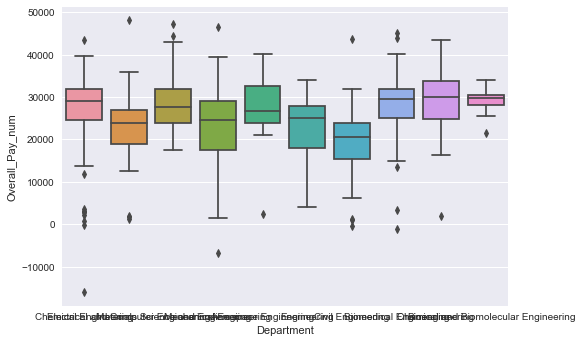

In [ ]:
# check: does overall pay differ between e.g. 'Civil Engineering' and 'Electrical and Computer Engineering' ??
# -> barplot per category ... (after having removed the outliers !!!)

# eng_sub = stip[stip.Dep_DR == 'Engineering']
# len(eng_sub)                                 # 559 -> looks fine!

# plt.hist(eng_sub.Department, log=True) # -> not histogram!! boxplots would be nice!!
sns.boxplot( x=eng_sub["Department"], y=eng_sub["Overall_Pay_num"] )
# sns.plt.show()

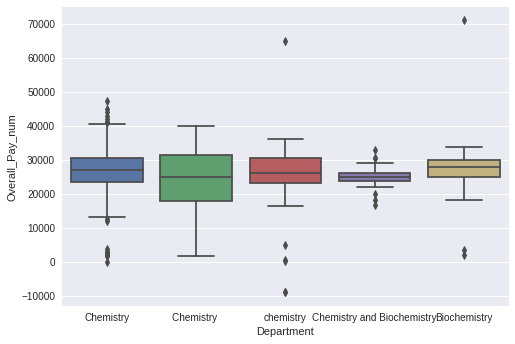

In [ ]:
chem_sub = stip[stip.Dep_DR == 'Chemistry']
len(chem_sub)                                 # 428 -> looks fine!

# plt.hist(eng_sub.Department, log=True) # -> not histogram!! boxplots would be nice!!
sns.boxplot( x=chem_sub["Department"], y=chem_sub["Overall_Pay_num"] )
# sns.plt.show()

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (25,12))

plt.scatter(PROVIDENCE.MM_Loc_Long, PROVIDENCE.MM_Loc_Lat, marker='v', color='red')
plt.scatter(KENT.MM_Loc_Long, KENT.MM_Loc_Lat, marker='v', color='magenta')
plt.scatter(WASHINGTON.MM_Loc_Long, WASHINGTON.MM_Loc_Lat, marker='v', color='cyan')

plt.scatter(NEWPORT.MM_Loc_Long, NEWPORT.MM_Loc_Lat, marker='v', color='green')
plt.scatter(BRISTOL.MM_Loc_Long, BRISTOL.MM_Loc_Lat, marker='v', color='brown')
plt.scatter(OTHER.MM_Loc_Long, OTHER.MM_Loc_Lat, alpha=0.5, marker='v', color='yellow')                # some of these distributed guys have cancelled due to moving,  

plt.scatter(moved_west.MM_Loc_Long, moved_west.MM_Loc_Lat, alpha=0.5, marker='v', color='blue')                  # guys having cancelled membership because they moved out of target area


# plt.xscale("log")                      # <- no. looks better with linear x-scale! :)
# plt.yscale("log")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.grid(True)
plt.show()

In [ ]:
stip.describe()

LW_Ratio        PY_DR       Acad_Y  Overall_Pay_num    GrossPay_12M    GrossPay_9M   GrossPay_3M  GrossPay_sumOf3        Fees_num  OP_doublecheck          OP_DR  MissingFees_DR    Fees_correct  OverallPay_corr
count  7796.000000  7687.000000  8703.000000  8707.000000      8707.000000     8707.000000    8707.000000   8707.000000      3352.000000     3352.0          3352.000000    8707.000000     8707.000000     7.780000e+03   
mean   1.075777     2.036035     2017.053660  25063.591478     20138.107729    5568.039853    462.201677    26168.349259     2869.667661     0.0             21629.931981   1104.757781     1104.757781     inf            
std    0.828874     1.454623     2.055927     21653.888223     22090.409654    10042.148903   1844.074435   19097.350698     18471.151022    0.0             27018.582201   11544.431348    11544.431348   NaN             
min   -34.010000    1.000000     2002.000000 -900000.000000    0.000000        0.000000       0.000000      0.000000         1.000000        0.0            -900000.000000  0.000000        0.000000        1.190000e+04   
25%    0.850000     1.000000     2016.000000  19000.000000     0.000000        0.000000       0.000000      20000.000000     500.000000      0.0             16478.250000   0.000000        0.000000        2.118644e+04   
50%    1.100000     1.000000     2017.000000  25000.000000     24000.000000    0.000000       0.000000      25860.000000     1005.500000     0.0             22000.000000   0.000000        0.000000        2.285714e+04   
75%    1.300000     3.000000     2018.000000  30351.000000     30000.000000    13490.500000   0.000000      31000.000000     2000.000000     0.0             27260.000000   700.000000      700.000000      2.540984e+04   
max    40.970000    6.000000     2021.000000  994000.000000    1000000.000000  189600.000000  55816.000000  1000000.000000   1000000.000000  0.0             994000.000000  1000000.000000  1000000.000000  inf

In [ ]:
stip_new.describe()

LW_Ratio        PY_DR       Acad_Y  Overall_Pay_num   GrossPay_12M    GrossPay_9M   GrossPay_3M  GrossPay_sumOf3        Fees_num  OP_doublecheck          OP_DR  MissingFees_DR    Fees_correct
count  6593.000000  6101.000000  6910.000000  6914.000000      6914.000000    6914.000000    6914.000000   6914.000000      2623.000000     2623.0          2623.000000    6914.000000     6914.000000   
mean   1.093533     2.020488     2017.061505  25783.009980     20557.208273   5800.106885    490.541076    26847.856234     2806.842165     0.0             21934.219215   1064.846254     1064.846254   
std    0.718952     1.465138     2.009201     19342.199237     19253.016193   10411.702447   1863.271601   15496.506814     20653.964575    0.0             21875.324286   12792.699694    12792.699694  
min   -34.010000    1.000000     2002.000000 -900000.000000    0.000000       0.000000       0.000000      0.000000         1.000000        0.0            -900000.000000  0.000000        0.000000      
25%    0.880000     1.000000     2016.000000  20066.500000     0.000000       0.000000       0.000000      21000.000000     500.000000      0.0             17500.000000   0.000000        0.000000      
50%    1.130000     1.000000     2017.000000  26000.000000     25000.000000   0.000000       0.000000      26750.000000     1000.000000     0.0             23000.000000   0.000000        0.000000      
75%    1.310000     3.000000     2018.000000  31000.000000     30571.750000   14000.000000   0.000000      31347.500000     2000.000000     0.0             28000.000000   650.000000      650.000000    
max    13.500000    6.000000     2021.000000  500000.000000    500000.000000  189600.000000  55816.000000  500000.000000    1000000.000000  0.0             192840.000000  1000000.000000  1000000.000000

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


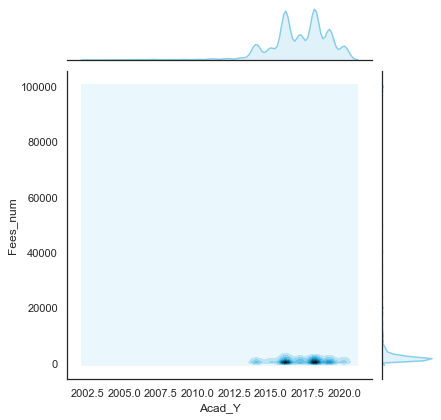

In [ ]:
# -> there are not too many values for the academic years before around 2012 -> exclude early years from analysis!
# -> investigate the best year to start! :)

# https://python-graph-gallery.com/82-marginal-plot-with-seaborn/#prettyPhoto 
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

# Custom the color
sns.set(style="white", color_codes=True)
sns.jointplot(x=stip["Acad_Y"], y=stip["Fees_num"], kind='kde', color="skyblue")

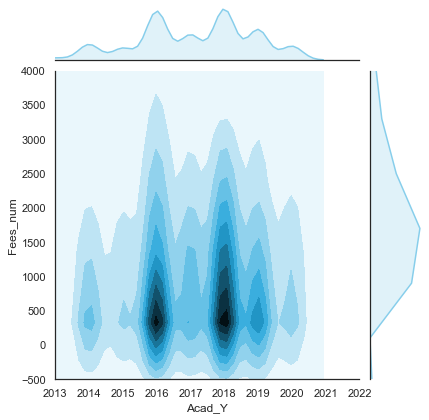

In [ ]:
# -> 2016 & 2018: much more data available than for all other years?!!?!? -> restrict analysis to 2016-2019, e.g. !?!

sns.set(style="white", color_codes=True)
plot = sns.jointplot(x=stip["Acad_Y"], y=stip["Fees_num"], kind='kde', color="skyblue")

plot.ax_marg_x.set_xlim(2013, 2022)
plot.ax_marg_y.set_ylim(-500, 4000)

plt.show()

In [ ]:
test_16to19 = stip.loc[2015<stip.Acad_Y<2020]
len(test_16to19)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## LINEAR REGRESSION MODEL

In [ ]:
from google.colab import files

stip.to_csv('stip.csv')
files.download('stip.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

stip_no_other.to_csv('stip_no_other.csv')
files.download('stip_no_other.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

stip_no_other_unideptAbove6.to_csv('stip_no_other_unideptAbove6.csv')
files.download('stip_no_other_unideptAbove6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
url = 'https://raw.githubusercontent.com/avocadosquirrel/PhD-Stipends---DSS-Competition/master/stip_final.csv?token=AN3DAR4BTQPSCMMM5K6H2RC7CSZBQ'
stip = pd.read_csv(url)
stip.head()

Unnamed: 0                                   University  Department  LW_Ratio Academic_Year Program_Year                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3                 Dep_DR           Dep_DR_top14 GP9_binary  MissingFees_DR  Fees_correct
0           0          University of Tennessee - Knoxville  Economics       0.09     2020-2021          1st                                                NaN      1    2020             1850             0         1850            0             1850  BusinessAndManagement  BusinessAndManagement        low               0             0
1           1               University of Arizona (U of A)   Economics      1.01     2020-2021          1st  $10500 per semester. RA/TA required. Need to p...      1    2020            21000             0        21000            0            21000  BusinessAndManagement  BusinessAndManagement       high               0             0
2           2               University of Arizona (U of A)   Economics      0.96     2020-2021          1st                                                NaN      1    2020            19800             0        21000            0            21000  BusinessAndManagement  BusinessAndManagement       high            1200          1200
3           4                 University of Virginia (UVA)         ECE      1.14     2020-2021          1st                                                NaN      1    2020            26000         26000            0            0            26000                    ECE                  Other        low               0             0
4           6  Washington University in St. Louis (Wash U)        olin      1.69     2020-2021          1st                                                NaN      1    2020            35000         35000            0            0            35000                   olin                  Other        low               0             0

In [97]:
url = 'https://raw.githubusercontent.com/avocadosquirrel/PhD-Stipends---DSS-Competition/master/stip_no_other_final.csv?token=AN3DAR37QZLNPAMBGIOIESK7CSZD2'
stip_no_other = pd.read_csv(url)
stip_no_other.head()

Unnamed: 0                           University         Department  LW_Ratio Academic_Year Program_Year                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3                          Dep_DR                    Dep_DR_top14 GP9_binary  MissingFees_DR  Fees_correct                                       uni_and_dept
0           0  University of Tennessee - Knoxville         Economics       0.09     2020-2021          1st                                                NaN      1    2020             1850             0         1850            0             1850           BusinessAndManagement           BusinessAndManagement        low               0             0  University of Tennessee - Knoxville_BusinessAn...
1           1       University of Arizona (U of A)          Economics      1.01     2020-2021          1st  $10500 per semester. RA/TA required. Need to p...      1    2020            21000             0        21000            0            21000           BusinessAndManagement           BusinessAndManagement       high               0             0  University of Arizona U of A_BusinessAndManage...
2           2       University of Arizona (U of A)          Economics      0.96     2020-2021          1st                                                NaN      1    2020            19800             0        21000            0            21000           BusinessAndManagement           BusinessAndManagement       high            1200          1200  University of Arizona U of A_BusinessAndManage...
3           7  University of Tennessee - Knoxville          Economics      0.87     2020-2021          1st                                                NaN      1    2020            18500             0        18500            0            18500           BusinessAndManagement           BusinessAndManagement       high               0             0  University of Tennessee - Knoxville_BusinessAn...
4           8            New York University (NYU)  Computer Science       1.10     2020-2021          1st                                                NaN      1    2020            32851             0        32851            0            32851  MathematicsAndComputer Science  MathematicsAndComputer Science       high               0             0  New York University NYU_MathematicsAndComputer...

In [98]:
url = 'https://raw.githubusercontent.com/avocadosquirrel/PhD-Stipends---DSS-Competition/master/stip_no_other_unideptAbove6_final.csv?token=AN3DAR7RWBTP2MHC3L5GOBK7CSZF6'
stip_no_other_unideptAbove6 = pd.read_csv(url)
stip_no_other_unideptAbove6.head()

Unnamed: 0                                         University               Department  LW_Ratio Academic_Year Program_Year Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3                       Dep_DR                 Dep_DR_top14 GP9_binary  MissingFees_DR  Fees_correct                                       uni_and_dept
0           9                          New York University (NYU)                Sociology      1.13     2020-2021          1st      NaN      1    2020            33500             0        30000         3500            33500                   HistPolSoc                   HistPolSoc       high               0             0                 New York University NYU_HistPolSoc
1          22        Massachusetts Institute of Technology (MIT)     Chemical Engineering      1.55     2020-2021          3rd      NaN      3    2020            43380         43380            0            0            43380                  Engineering                  Engineering        low               0             0  Massachusetts Institute of Technology MIT_Engi...
2          23                University of California - Berkeley               Psychology      1.04     2020-2021          1st      NaN      1    2020            29000         29000            0            0            29000                   HistPolSoc                   HistPolSoc        low               0             0     University of California - Berkeley_HistPolSoc
3          24  Rutgers the State University of New Jersey - N...              Linguistics      1.04     2019-2020          1st      NaN      1    2019            26800             0        25000         2000            27000  LinguisticsAndCommunication  LinguisticsAndCommunication       high             200           200  Rutgers the State University of New Jersey - N...
4          27                               Duke University (DU)  Biomedical Engineering       1.25     2019-2020          4th      NaN      4    2019            27700         28500            0            0            28500                  Engineering                  Engineering        low             800           800                     Duke University DU_Engineering

In [ ]:
stip_no_other_unideptAbove6.columns

Index(['Unnamed: 0', 'University', 'Department', 'LW_Ratio', 'Academic_Year',
       'Program_Year', 'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num',
       'GrossPay_12M', 'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3',
       'Dep_DR', 'Dep_DR_top14', 'GP9_binary', 'MissingFees_DR',
       'Fees_correct', 'uni_and_dept'],
      dtype='object')

In [ ]:
stip_no_other_unideptAbove6.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1230 non-null   int64  
 1   University       1230 non-null   object 
 2   Department       1230 non-null   object 
 3   LW_Ratio         1230 non-null   float64
 4   Academic_Year    1230 non-null   object 
 5   Program_Year     1230 non-null   object 
 6   Comments         369 non-null    object 
 7   PY_DR            1230 non-null   int64  
 8   Acad_Y           1230 non-null   int64  
 9   Overall_Pay_num  1230 non-null   int64  
 10  GrossPay_12M     1230 non-null   int64  
 11  GrossPay_9M      1230 non-null   int64  
 12  GrossPay_3M      1230 non-null   int64  
 13  GrossPay_sumOf3  1230 non-null   int64  
 14  Dep_DR           1230 non-null   object 
 15  Dep_DR_top14     1230 non-null   object 
 16  GP9_binary       1230 non-null   object 
 17  MissingFees_DR

## VISUALIZATION OF INTERACTIONS

In [ ]:
stip_no_other_unideptAbove6.Acad_Y

0       2020
1       2020
2       2020
3       2019
4       2019
        ... 
1225    2012
1226    2013
1227    2013
1228    2013
1229    2013
Name: Acad_Y, Length: 1230, dtype: int64

(array([  2.,   0.,   0.,   6.,   0.,   0.,   0.,   2.,   0.,   0.,   4.,
          0.,   0.,   0.,   7.,   0.,   0.,  10.,   0.,   0.,   0.,  10.,
          0.,   0.,   0.,  33.,   0.,   0., 107.,   0.,   0.,   0.,  55.,
          0.,   0., 297.,   0.,   0.,   0., 168.,   0.,   0., 227.,   0.,
          0.,   0., 188.,   0.,   0., 114.]),
 array([2006.  , 2006.28, 2006.56, 2006.84, 2007.12, 2007.4 , 2007.68,
        2007.96, 2008.24, 2008.52, 2008.8 , 2009.08, 2009.36, 2009.64,
        2009.92, 2010.2 , 2010.48, 2010.76, 2011.04, 2011.32, 2011.6 ,
        2011.88, 2012.16, 2012.44, 2012.72, 2013.  , 2013.28, 2013.56,
        2013.84, 2014.12, 2014.4 , 2014.68, 2014.96, 2015.24, 2015.52,
        2015.8 , 2016.08, 2016.36, 2016.64, 2016.92, 2017.2 , 2017.48,
        2017.76, 2018.04, 2018.32, 2018.6 , 2018.88, 2019.16, 2019.44,
        2019.72, 2020.  ]),
 <a list of 50 Patch objects>)

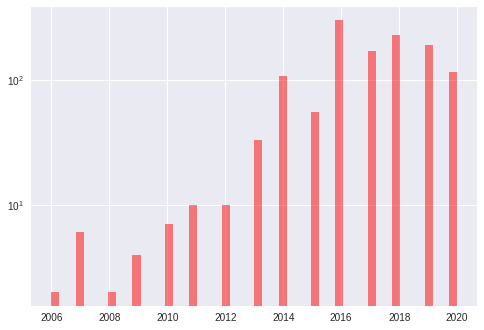

In [ ]:
plt.hist(stip_no_other_unideptAbove6.Acad_Y, label = "Academic Year", log=True, bins=50, alpha=0.5, color="red") 

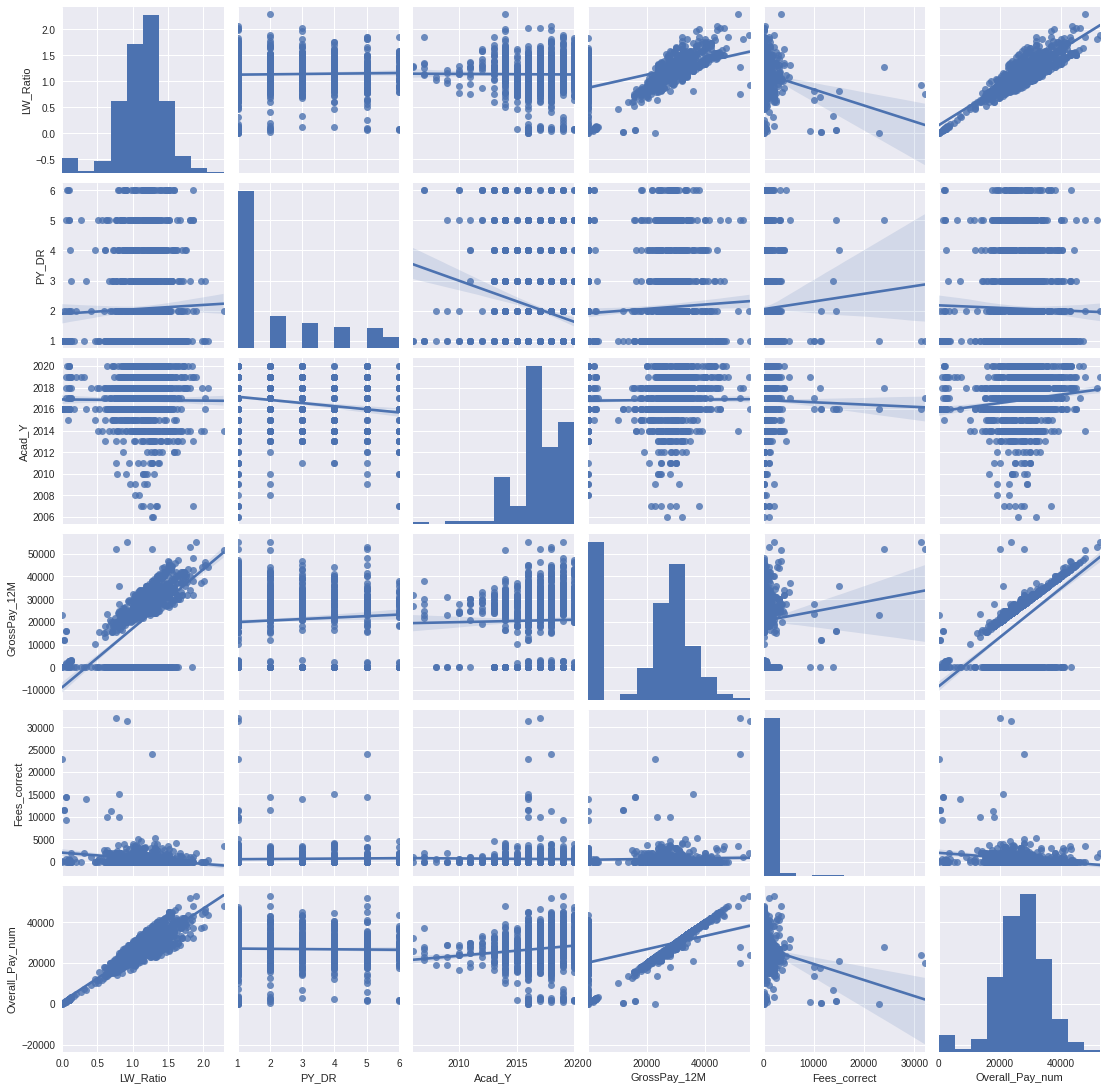

In [ ]:
# !!!! PY comparison: In later program years, GP increased slightly, however OV did not!! Possible confounder: unequal distributin of Acad_Y !!!!! LW ratio: also slight + correlation! seen in 1B but not 2A !!!!!

sns.pairplot(stip_no_other_unideptAbove6, vars=['LW_Ratio', 'PY_DR', 'Acad_Y', 'GrossPay_12M', 'Fees_correct', 'Overall_Pay_num'],
                 kind='reg')

In [ ]:
stip_no_other_unideptAbove6.shape

(1230, 20)

In [ ]:
# subslice this (already small....) df once more: for years 2015-2020:

stip_nouda6_1521 = stip_no_other_unideptAbove6.drop(stip_no_other_unideptAbove6[(stip_no_other_unideptAbove6.Acad_Y < 2015)].index)
stip_nouda6_1521.shape



(1049, 20)

In [ ]:
stip_nouda6_1520 = stip_nouda6_1521.drop(stip_nouda6_1521[(stip_nouda6_1521.Acad_Y > 2020)].index)
stip_nouda6_1520.shape

(1049, 20)

In [ ]:
# INTERESTINGLY, no additional obs are dropped in 2nd step ... isn't this spooky???? .... df manipulation on purpose ???

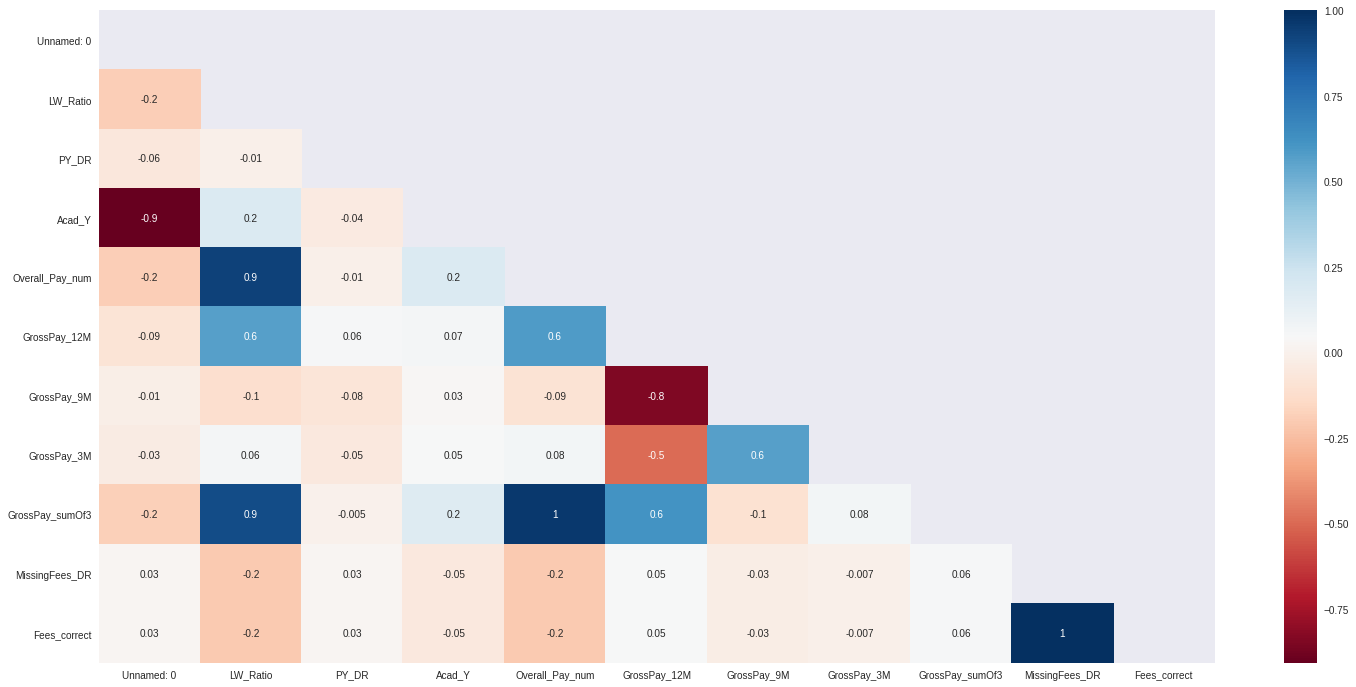

In [ ]:
# CONCLUSION: !!!!!! overall pay num depends on GP12, but NOT AT ALL on GP9 and 3 -> if you are paid per 9M, you have already lost! ... ??? -> the same for CORRECTED ??????

#get correlations of each features in dataset
corrmat = stip_nouda6_1520.corr()
top_corr_features = corrmat.index

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,12))
# plt.legend(loc='left')
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map

# plot heat map
g=sns.heatmap(stip_nouda6_1520[top_corr_features].corr(),annot=True,cmap="RdBu", mask=mask, fmt='.1g')

In [ ]:
corr_morerel = stip_nouda6_1520.drop(['GrossPay_sumOf3'], axis=1)
corr_morerel = corr_morerel.drop(['GrossPay_12M'], axis=1)

In [ ]:
stip_nouda6_1520.columns

Index(['Unnamed: 0', 'University', 'Department', 'LW_Ratio', 'Academic_Year',
       'Program_Year', 'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num',
       'GrossPay_12M', 'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3',
       'Dep_DR', 'Dep_DR_top14', 'GP9_binary', 'MissingFees_DR',
       'Fees_correct', 'uni_and_dept'],
      dtype='object')

In [ ]:
corr_morerel

Unnamed: 0                                         University                           Department  LW_Ratio Academic_Year Program_Year                  Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_9M  GrossPay_3M                          Dep_DR                    Dep_DR_top14 GP9_binary  MissingFees_DR  Fees_correct                                       uni_and_dept
0              9                          New York University (NYU)                            Sociology      1.13     2020-2021          1st                       NaN      1    2020            33500        30000         3500                      HistPolSoc                      HistPolSoc       high               0             0                 New York University NYU_HistPolSoc
1             22        Massachusetts Institute of Technology (MIT)                 Chemical Engineering      1.55     2020-2021          3rd                       NaN      3    2020            43380            0            0                     Engineering                     Engineering        low               0             0  Massachusetts Institute of Technology MIT_Engi...
2             23                University of California - Berkeley                           Psychology      1.04     2020-2021          1st                       NaN      1    2020            29000            0            0                      HistPolSoc                      HistPolSoc        low               0             0     University of California - Berkeley_HistPolSoc
3             24  Rutgers the State University of New Jersey - N...                          Linguistics      1.04     2019-2020          1st                       NaN      1    2019            26800        25000         2000     LinguisticsAndCommunication     LinguisticsAndCommunication       high             200           200  Rutgers the State University of New Jersey - N...
4             27                               Duke University (DU)              Biomedical Engineering       1.25     2019-2020          4th                       NaN      4    2019            27700            0            0                     Engineering                     Engineering        low             800           800                     Duke University DU_Engineering
...          ...                                                ...                                  ...       ...           ...          ...                       ...    ...     ...              ...          ...          ...                             ...                             ...        ...             ...           ...                                                ...
1116        8261                               Yale University (YU)                            Sociology      1.17     2015-2016          1st                       NaN      1    2015            29000            0            0                      HistPolSoc                      HistPolSoc        low               0             0                      Yale University YU_HistPolSoc
1118        8276                                    Rice University                         Anthropology      1.01     2015-2016          4th  Partial health insurance      4    2015            22034        21500          534                         Biology                         Biology       high               0             0                            Rice University_Biology
1119        8277                                    Rice University                         Anthropology      1.01     2015-2016          1st  Partial health insurance      1    2015            22034        21500          534                         Biology                         Biology       high               0             0                            Rice University_Biology
1120        8285             University of Wisconsin - Madison (UW)                     Computer Science      1.01     2015-2016          1st                       NaN      1    2015    

In [ ]:
corr_morerel = corr_morerel.drop(['Unnamed: 0'], axis=1)

In [ ]:
corr_morerel = corr_morerel.drop(['MissingFees_DR'], axis=1)

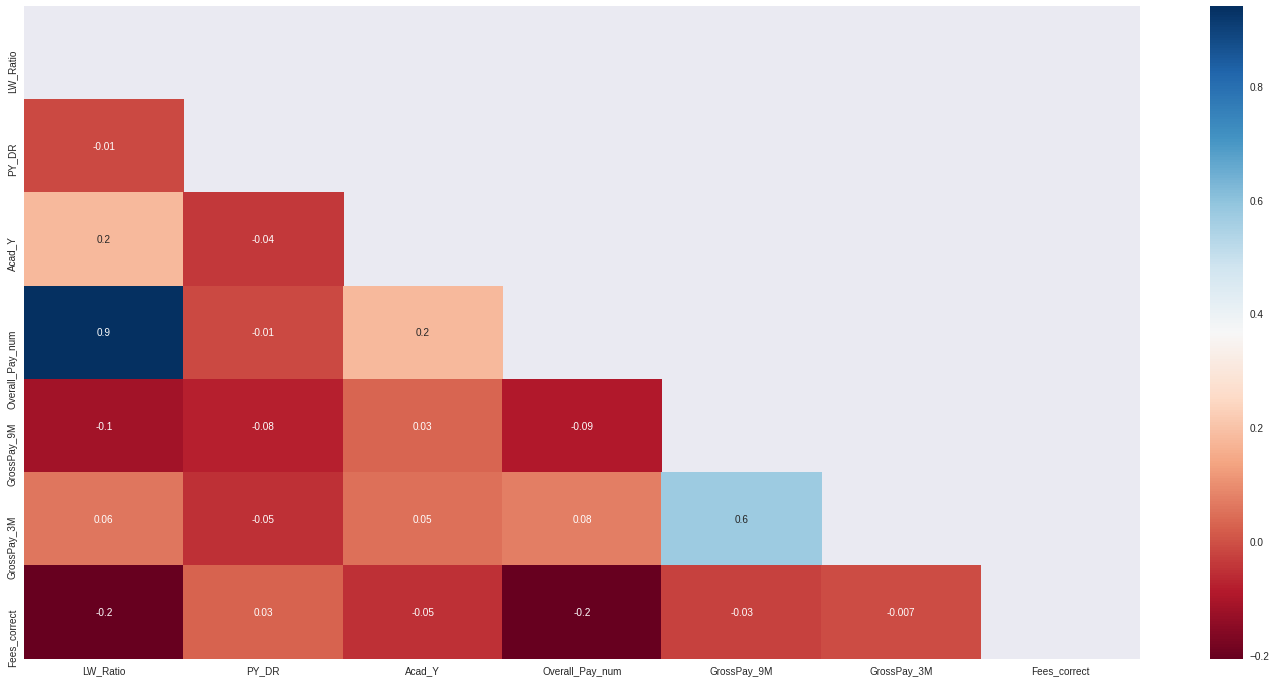

In [ ]:
# CONCLUSION: !!!!!! BEING PAID ON A PER9M SCHEME IS A VERY DESTRUCTIVE IDEA!!!! (OTHER CONFOUNDER HERE????) 
# overall pay num depends on GP12, but NOT AT ALL on GP9 and 3 -> if you are paid per 9M, you have already lost! ... ??? -> the same for CORRECTED ??????

# !!! LOL!!! it seems my df was sorted by Academic Year! -> remove index from corrmat :D

# need to remove the strongest collinearities:

#get correlations of each features in dataset
corrmat = corr_morerel.corr()
top_corr_features = corrmat.index

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,12))
# plt.legend(loc='left')
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map

# plot heat map
g=sns.heatmap(corr_morerel[top_corr_features].corr(),annot=True,cmap="RdBu", mask=mask, fmt='.1g')

In [ ]:
corr_morerel2 = corr_morerel.drop(['Overall_Pay_num'], axis=1)

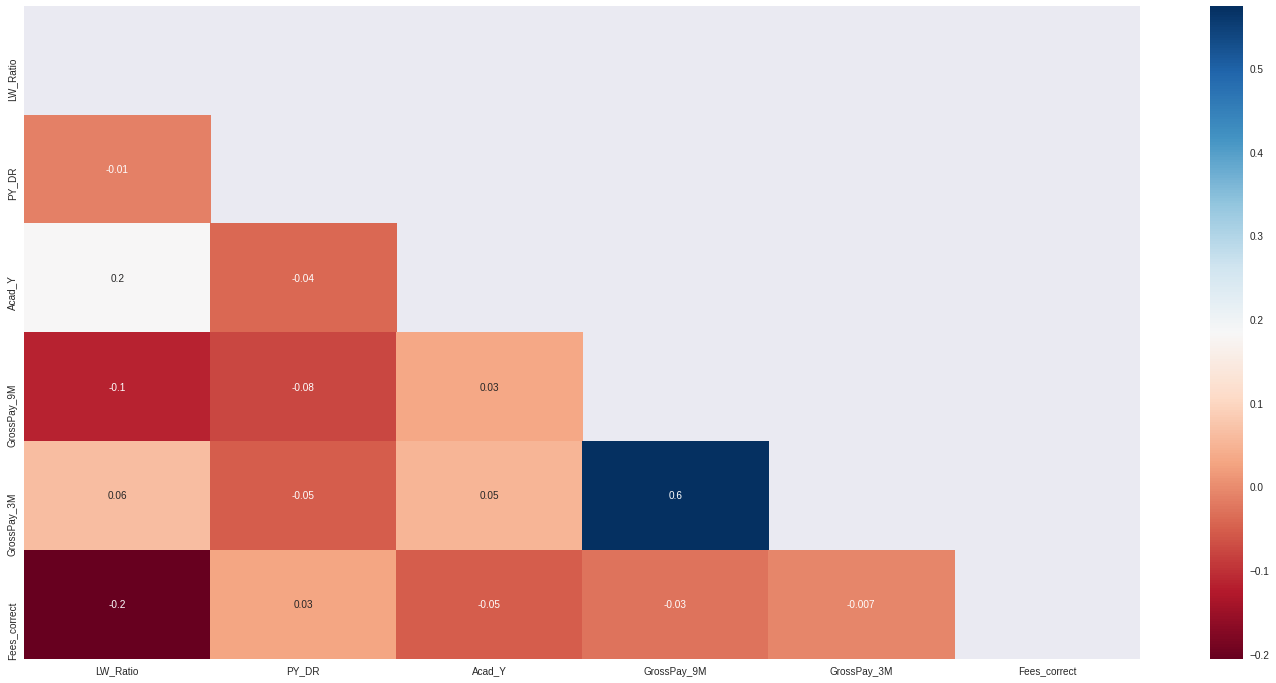

In [ ]:
# CONCLUSION: !!!!!! BEING PAID ON A PER9M SCHEME IS A VERY DESTRUCTIVE IDEA!!!! (OTHER CONFOUNDER HERE????) 
# overall pay num depends on GP12, but NOT AT ALL on GP9 and 3 -> if you are paid per 9M, you have already lost! ... ??? -> the same for CORRECTED ??????

# !!! LOL!!! it seems my df was sorted by Academic Year! -> remove index from corrmat :D

# need to remove the strongest collinearities:

#get correlations of each features in dataset
corrmat = corr_morerel2.corr()
top_corr_features = corrmat.index

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,12))
# plt.legend(loc='left')
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map

# plot heat map
g=sns.heatmap(corr_morerel2[top_corr_features].corr(),annot=True,cmap="RdBu", mask=mask, fmt='.1g')

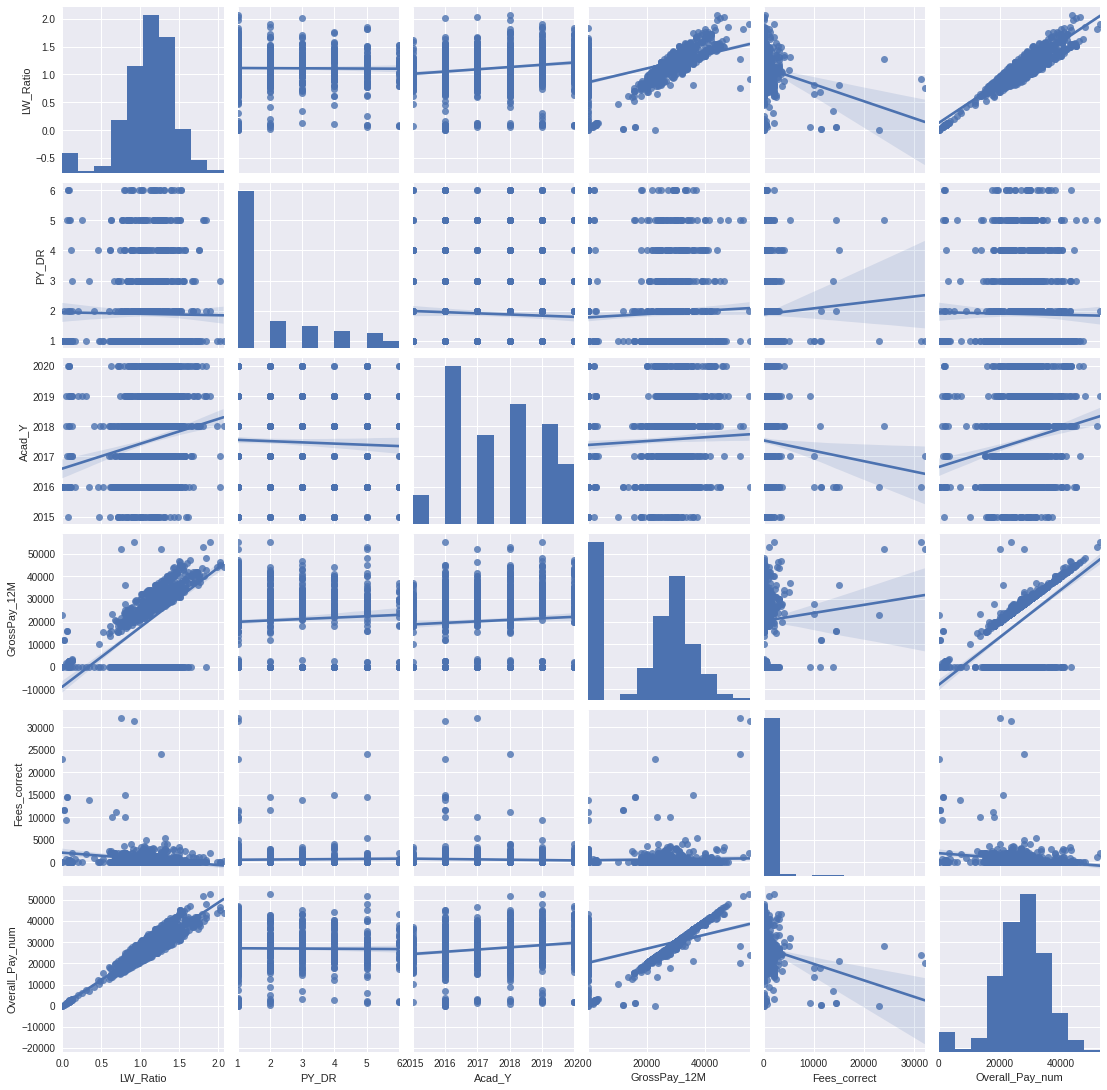

In [ ]:
# PURE VISUAL INSPECTION IMPRESSION: 
# -> OVERALL PAY INFLUENCED BY LW RATIO !!! > GROSS PAY, EVIDENTLY ... > ACADEMIC YEAR !!! > FEE SIZE, EVIDENTLY ... >>> RATHER NOT DEPENDENT ON: PROGRAM YEAR !!!!! 

# slight positive correlation remains: still higher representation of late PYs in early academic years -> may introduce bias!
# however ROW 6 TAKES ALL FACTORS INTO CONSIDERATION -> SAVE TO INTERPRET THESE?!!! -> 

sns.pairplot(stip_nouda6_1520, vars=['LW_Ratio', 'PY_DR', 'Acad_Y', 'GrossPay_12M', 'Fees_correct', 'Overall_Pay_num'],
                 kind='reg')

In [ ]:
stip_nouda6_1520.columns

Index(['Unnamed: 0', 'University', 'Department', 'LW_Ratio', 'Academic_Year',
       'Program_Year', 'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num',
       'GrossPay_12M', 'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3',
       'Dep_DR', 'Dep_DR_top14', 'GP9_binary', 'MissingFees_DR',
       'Fees_correct', 'uni_and_dept'],
      dtype='object')

In [ ]:
stip_nouda6_1520.shape

(1049, 20)

In [ ]:
# need to remove the 3 LWR=0 -> OP_corr = inf values ...... (for this type of analysis, only?? .. ???? inf probably cause outliers in plots????)

stip_nouda6_1520 = stip_nouda6_1520.drop(stip_nouda6_1520[(stip_nouda6_1520.LW_Ratio == 0)].index)
stip_nouda6_1520.shape



(1046, 20)

In [ ]:
stip_nouda6_1520 = stip_nouda6_1520.drop(stip_nouda6_1520[(stip_nouda6_1520.Fees_corr > 50000)].index)
stip_nouda6_1520.shape

(1041, 22)

In [ ]:
stip_nouda6_1520['Overall_Pay_corr'] = stip_nouda6_1520.Overall_Pay_num / stip_nouda6_1520.LW_Ratio

In [ ]:
stip_nouda6_1520['Fees_corr'] = stip_nouda6_1520.Fees_correct / stip_nouda6_1520.LW_Ratio

In [ ]:
# DECISION: drop the 5 rows that have Fees_corr > 50k! clear outliers
# 609 of x students indicated to not pay fees at all 

stip_nouda6_1520.sort_values(by='Fees_corr', ascending=0)[0:49]

# .sort_values(by = ['GrossPay_12M', 'GrossPay_9M'], ascending=[0, 0])[0:49]

Unnamed: 0                                         University                           Department  LW_Ratio Academic_Year Program_Year                                           Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3                          Dep_DR                    Dep_DR_top14 GP9_binary  MissingFees_DR  Fees_correct                                       uni_and_dept  Overall_Pay_corr     Fees_corr
603         4719        University of California - San Diego (UCSD)                            Sociology      0.76     2017-2018          1st                          Includes Health Insurance      1    2017            20000         52121            0            0            52121                      HistPolSoc                      HistPolSoc        low           32121         32121  University of California - San Diego UCSD_Hist...      26315.789474  42264.473684
858         6578                        University of Kentucky (UK)                          Mathematics      0.34     2016-2017          3rd       Summer support in not guaranteed every year.      3    2016             6983             0        16375         4533            20908  MathematicsAndComputer Science  MathematicsAndComputer Science       high           13925         13925  University of Kentucky UK_MathematicsAndComput...      20538.235294  40955.882353
723         5714      University of California - Los Angeles (UCLA)                       Bioengineering      0.92     2016-2017          1st                                                NaN      1    2016            23854         55281            0            0            55281                     Engineering                     Engineering        low           31427         31427  University of California - Los Angeles UCLA_En...      25928.260870  34159.782609
302         2467  University of Illinois - Urbana- Champaign (UIUC)                          Psychology       1.27     2018-2019          5th                                                NaN      5    2018            28000         52000            0            0            52000                      HistPolSoc                      HistPolSoc        low           24000         24000  University of Illinois - Urbana- Champaign UIU...      22047.244094  18897.637795
715         5658      University of California - Los Angeles (UCLA)                    Molecular Biology      0.81     2016-2017          4th                                                NaN      4    2016            21000         36000            0            0            36000                         Biology                         Biology        low           15000         15000  University of California - Los Angeles UCLA_Bi...      25925.925926  18518.518519
547         4284      University of California - Los Angeles (UCLA)                    political science      0.69     2018-2019          1st                                                NaN      1    2018            17794             0        25000         4000            29000                      HistPolSoc                      HistPolSoc       high           11206         11206  University of California - Los Angeles UCLA_Hi...      25788.405797  16240.579710
842         6436                 Purdue University - West Lafayette               Biomedical Engineering      0.64     2016-2017          1st                                                NaN      1    2016            13500         23500            0            0            23500                     Engineering                     Engineering        low           10000         10000     Purdue University - West Lafayette_Engineering      21093.750000  15625.000000
155         1215             University of Colorado - Boulder (UCB)                       Communication       0.13     2019-2020          2nd                                                NaN      2    2019             3240             0        

In [ ]:
# my FINAL stip1520...:

from google.colab import files

stip_nouda6_1520.to_csv('stip_nouda6_1520.csv')
files.download('stip_nouda6_1520.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### stip_nouda6_csv import

In [99]:
url = 'https://raw.githubusercontent.com/avocadosquirrel/PhD-Stipends---DSS-Competition/master/stip_nouda6_1520_final.csv?token=AN3DAR5D6IVVJ3KD7F6SJSK7CSZU6'
stip_nouda6_1520 = pd.read_csv(url)
stip_nouda6_1520.head()

Unnamed: 0                                         University               Department  LW_Ratio Academic_Year Program_Year Comments  PY_DR  Acad_Y  Overall_Pay_num  GrossPay_12M  GrossPay_9M  GrossPay_3M  GrossPay_sumOf3                       Dep_DR                 Dep_DR_top14 GP9_binary  MissingFees_DR  Fees_correct                                       uni_and_dept  Overall_Pay_corr   Fees_corr  Dep_LeftRight
0           0                          New York University (NYU)                Sociology      1.13     2020-2021          1st      NaN      1    2020            33500             0        30000         3500            33500                   HistPolSoc                   HistPolSoc       high               0             0                 New York University NYU_HistPolSoc      29646.017699    0.000000              1
1           1        Massachusetts Institute of Technology (MIT)     Chemical Engineering      1.55     2020-2021          3rd      NaN      3    2020            43380         43380            0            0            43380                  Engineering                  Engineering        low               0             0  Massachusetts Institute of Technology MIT_Engi...      27987.096774    0.000000              0
2           2                University of California - Berkeley               Psychology      1.04     2020-2021          1st      NaN      1    2020            29000         29000            0            0            29000                   HistPolSoc                   HistPolSoc        low               0             0     University of California - Berkeley_HistPolSoc      27884.615385    0.000000              1
3           3  Rutgers the State University of New Jersey - N...              Linguistics      1.04     2019-2020          1st      NaN      1    2019            26800             0        25000         2000            27000  LinguisticsAndCommunication  LinguisticsAndCommunication       high             200           200  Rutgers the State University of New Jersey - N...      25769.230769  192.307692              1
4           4                               Duke University (DU)  Biomedical Engineering       1.25     2019-2020          4th      NaN      4    2019            27700         28500            0            0            28500                  Engineering                  Engineering        low             800           800                     Duke University DU_Engineering      22160.000000  640.000000              0

In [ ]:
sorted(unique9)[-20:-1]

[38545,
 40000,
 41885,
 43000,
 44560,
 45000,
 46000,
 47995,
 52593,
 53595,
 54587,
 56899,
 67000,
 77400,
 87467,
 90000,
 101280,
 120000,
 180000]

(array([858.,  88.,  48.,  23.,   6.,   7.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   2.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([    0.        ,   845.28947368,  1690.57894737,  2535.86842105,
         3381.15789474,  4226.44736842,  5071.73684211,  5917.02631579,
         6762.31578947,  7607.60526316,  8452.89473684,  9298.18421053,
        10143.47368421, 10988.76315789, 11834.05263158, 12679.34210526,
        13524.63157895, 14369.92105263, 15215.21052632, 16060.5       ,
        16905.78947368, 17751.07894737, 18596.36842105, 19441.65789474,
        20286.94736842, 21132.23684211, 21977.52631579, 22822.81578947,
        23668.10526316, 24513.39473684, 25358.68421053, 26203.97368421,
        27049.26315789, 27894.55263158, 28739.84210526, 29585.13157895,
        30

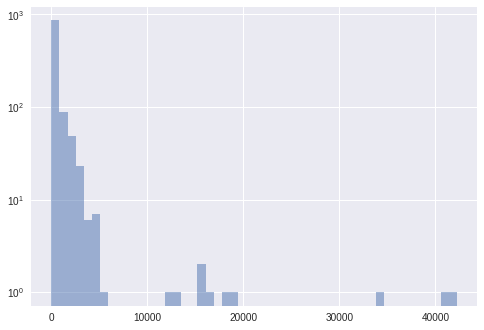

In [ ]:
# create a histogram of corrected fees to remove upper outliers in Fees:
# über ca 60k sind noch höchstens ca 3 obs per value range

plt.hist(stip_nouda6_1520.Fees_corr, label = "Fees adjusted for LW Ratio", log=True, bins=50, alpha=0.5) 




In [ ]:
stip_nouda6_1520.describe()

Unnamed: 0     LW_Ratio        PY_DR       Acad_Y  Overall_Pay_num  GrossPay_12M   GrossPay_9M   GrossPay_3M  GrossPay_sumOf3  MissingFees_DR  Fees_correct  Overall_Pay_corr     Fees_corr
count  1041.000000  1041.000000  1041.000000  1041.000000      1041.000000   1041.000000   1041.000000   1041.000000      1041.000000     1041.000000   1041.000000       1041.000000   1041.000000
mean   4148.777137     1.121700     1.896254  2017.521614     27276.545629  20541.106628   6548.082613    689.279539     27778.468780      501.923151    501.923151      24277.296796    600.480427
std    2357.125080     0.311329     1.419912     1.463585      8106.799192  14941.619811  10649.407636   1906.100632      8121.592408     1903.024954   1903.024954       2530.354973   2567.821361
min       9.000000     0.050000     1.000000  2015.000000      1043.000000      0.000000      0.000000      0.000000      1300.000000        0.000000      0.000000      20000.000000      0.000000
25%    2209.000000     0.960000     1.000000  2016.000000     23000.000000      0.000000      0.000000      0.000000     23500.000000        0.000000      0.000000      22388.059701      0.000000
50%    4133.000000     1.150000     1.000000  2018.000000     28000.000000  26000.000000      0.000000      0.000000     28212.000000        0.000000      0.000000      23363.970588      0.000000
75%    6179.000000     1.320000     3.000000  2019.000000     32200.000000  31800.000000  17000.000000      0.000000     32500.000000      461.000000    461.000000      25838.926174    400.000000
max    8305.000000     2.070000     6.000000  2020.000000     53000.000000  55281.000000  40000.000000  12868.000000     55281.000000    32121.000000  32121.000000      31034.482759  42264.473684

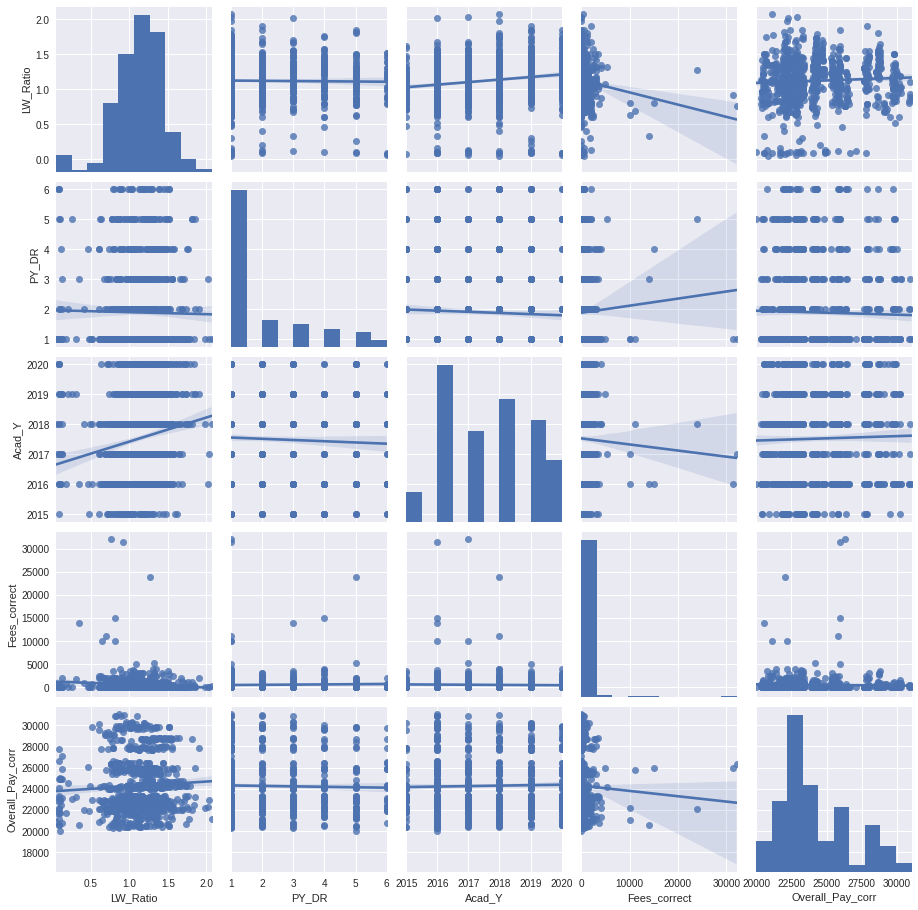

In [ ]:
# REPEAT THE SAME LAST STEP, BUT USING OVERALL PAY CORR INSTEAD OF NUM !!! :)
# now, higher OP corr correlate with HIGHER LWR !!!! however I have to remove GP12 from this guy here... !!! NO! FROM CORRMAT /scikit.... MODEL ONLY! removing one PLOT VISUALIZATION WONT CHANGE MY DATA ahahhahaaha .... ;) .....

# PURE VISUAL INSPECTION IMPRESSION: 
# -> OVERALL PAY INFLUENCED BY LW RATIO !!! > GROSS PAY, EVIDENTLY ... > ACADEMIC YEAR !!! > FEE SIZE, EVIDENTLY ... >>> RATHER NOT DEPENDENT ON: PROGRAM YEAR !!!!! 

# slight positive correlation remains: still higher representation of late PYs in early academic years -> may introduce bias!
# however ROW 6 TAKES ALL FACTORS INTO CONSIDERATION -> SAVE TO INTERPRET THESE?!!! -> 

sns.pairplot(stip_nouda6_1520, vars=['LW_Ratio', 'PY_DR', 'Acad_Y', 'Fees_correct', 'Overall_Pay_corr'],
                 kind='reg')



In [ ]:
stip_nouda6_1520.columns

Index(['Unnamed: 0', 'University', 'Department', 'LW_Ratio', 'Academic_Year',
       'Program_Year', 'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num',
       'GrossPay_12M', 'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3',
       'Dep_DR', 'Dep_DR_top14', 'GP9_binary', 'MissingFees_DR',
       'Fees_correct', 'uni_and_dept', 'Overall_Pay_corr', 'Fees_corr'],
      dtype='object')

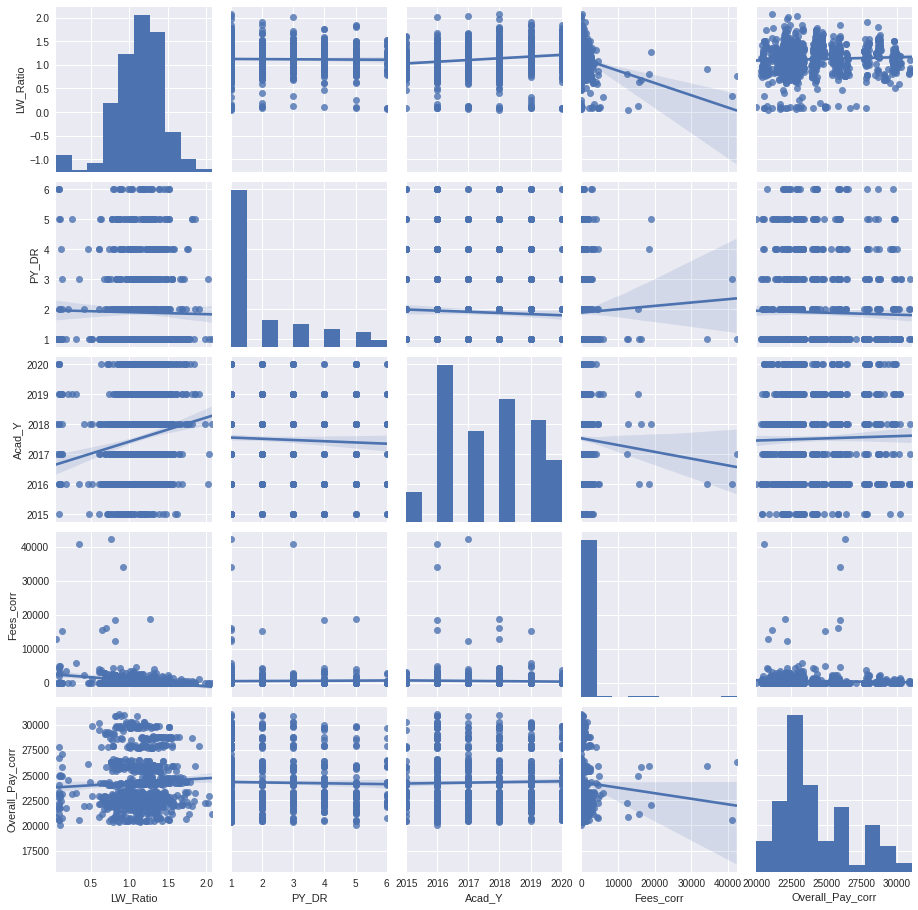

In [ ]:
sns.pairplot(stip_nouda6_1520, vars=['LW_Ratio', 'PY_DR', 'Acad_Y', 'Fees_corr', 'Overall_Pay_corr'],
                 kind='reg')


In [ ]:
stip_nouda6_1520.columns

Index(['Unnamed: 0', 'University', 'Department', 'LW_Ratio', 'Academic_Year',
       'Program_Year', 'Comments', 'PY_DR', 'Acad_Y', 'Overall_Pay_num',
       'GrossPay_12M', 'GrossPay_9M', 'GrossPay_3M', 'GrossPay_sumOf3',
       'Dep_DR', 'Dep_DR_top14', 'GP9_binary', 'MissingFees_DR',
       'Fees_correct', 'uni_and_dept', 'Overall_Pay_corr', 'Fees_corr'],
      dtype='object')

In [ ]:
stip_nouda6_1520['longitude']= stip_nouda6_1520['University'].map(dict_long)

In [ ]:
stip_nouda6_1520['latitude']= stip_nouda6_1520['University'].map(dict_lat)

In [ ]:
stip_nouda6_1520.Dep_DR_top14.unique()

array(['HistPolSoc', 'Engineering', 'LinguisticsAndCommunication',
       'MathematicsAndComputer Science', 'Chemistry',
       'PhysicsAndAstronomy', 'Biology', 'Geography',
       'BusinessAndManagement', 'Medical', 'ArtsAndTheology'],
      dtype=object)

In [ ]:
stip_nouda6_1520['Dep_LeftRight'] = stip_nouda6_1520.Dep_DR_top14.replace([('BusinessAndManagement', 'MathematicsAndComputer Science', 'Medical', 'Engineering', 'Biology', 'Chemistry',
       'PhysicsAndAstronomy', 'Geography')], 0) # 0 for left brain
stip_nouda6_1520['Dep_LeftRight'] = stip_nouda6_1520.Dep_LeftRight.replace([('HistPolSoc', 'ArtsAndTheology', 'LinguisticsAndCommunication', 'Education')], 1) # 1 for right brain

In [ ]:
stip_nouda6_1520['Dep_LeftRight'].value_counts(dropna=False)

0    542
1    499
Name: Dep_LeftRight, dtype: int64

In [ ]:
type(stip_nouda6_1520.Dep_LeftRight[34])

numpy.int64

In [ ]:
# my FINAL stip1520...:

from google.colab import files

stip_nouda6_1520.to_csv('stip_nouda6_1520_final.csv')
files.download('stip_nouda6_1520_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# long & lat unfortunately not useful for these 1041 ;(

stip_nouda6_1520.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 0 to 1126
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   University        1041 non-null   object 
 1   Department        1041 non-null   object 
 2   LW_Ratio          1041 non-null   float64
 3   Academic_Year     1041 non-null   object 
 4   Program_Year      1041 non-null   object 
 5   Comments          310 non-null    object 
 6   PY_DR             1041 non-null   int64  
 7   Acad_Y            1041 non-null   int64  
 8   Overall_Pay_num   1041 non-null   int64  
 9   GrossPay_12M      1041 non-null   int64  
 10  GrossPay_9M       1041 non-null   int64  
 11  GrossPay_3M       1041 non-null   int64  
 12  GrossPay_sumOf3   1041 non-null   int64  
 13  Dep_DR            1041 non-null   object 
 14  Dep_DR_top14      1041 non-null   object 
 15  GP9_binary        1041 non-null   object 
 16  MissingFees_DR    1041 non-null   int64  


In [ ]:
stip_nouda6_1520 = stip_nouda6_1520.drop(['Unnamed: 0'], axis=1)

In [ ]:
stip_nouda6_1520 = stip_nouda6_1520.drop(['longitude'], axis=1)
stip_nouda6_1520 = stip_nouda6_1520.drop(['latitude'], axis=1)

In [ ]:
corrmat_final = stip_nouda6_1520[['Dep_LeftRight', 'LW_Ratio', 'PY_DR', 'Acad_Y', 'Fees_correct', 'Fees_corr', 'Overall_Pay_num', 'Overall_Pay_corr']]
# corrmat_final = corrmat_final.drop(['Academic_Year'], axis=1)


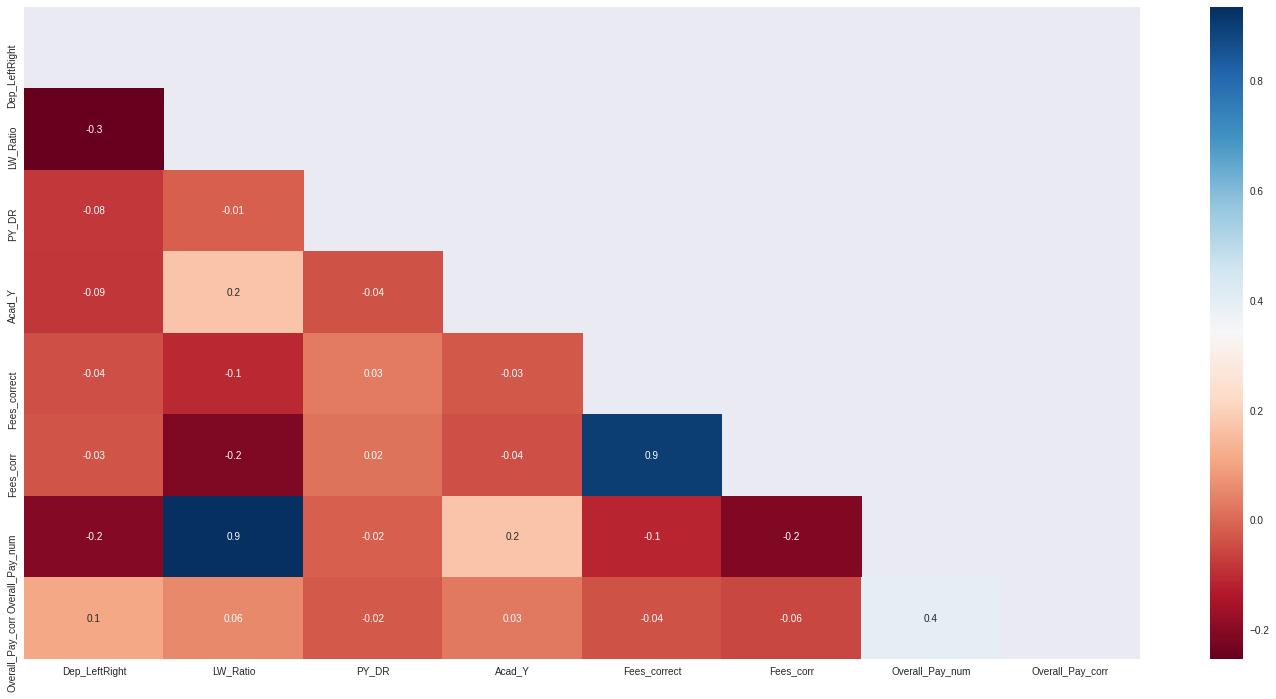

In [ ]:
# FINAL CONCLUSION: THE OBVIOUS CORRELATIONS HIDE ANY OTHERS, IF PRESENT ... -> REMOVE COLLINEARITIES: DROP THE 2 VALUES NOT YET ADJUSTED FOR LWR :)

#get correlations of each features in dataset
corrmat = corrmat_final.corr()
top_corr_features = corrmat.index

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,12))
# plt.legend(loc='left')
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map

# plot heat map
g=sns.heatmap(corrmat_final[top_corr_features].corr(),annot=True,cmap="RdBu", mask=mask, fmt='.1g')

In [ ]:
corrmat_FINAL = corrmat_final.drop(['Overall_Pay_num'], axis=1)
corrmat_FINAL = corrmat_FINAL.drop(['Fees_correct'], axis=1)

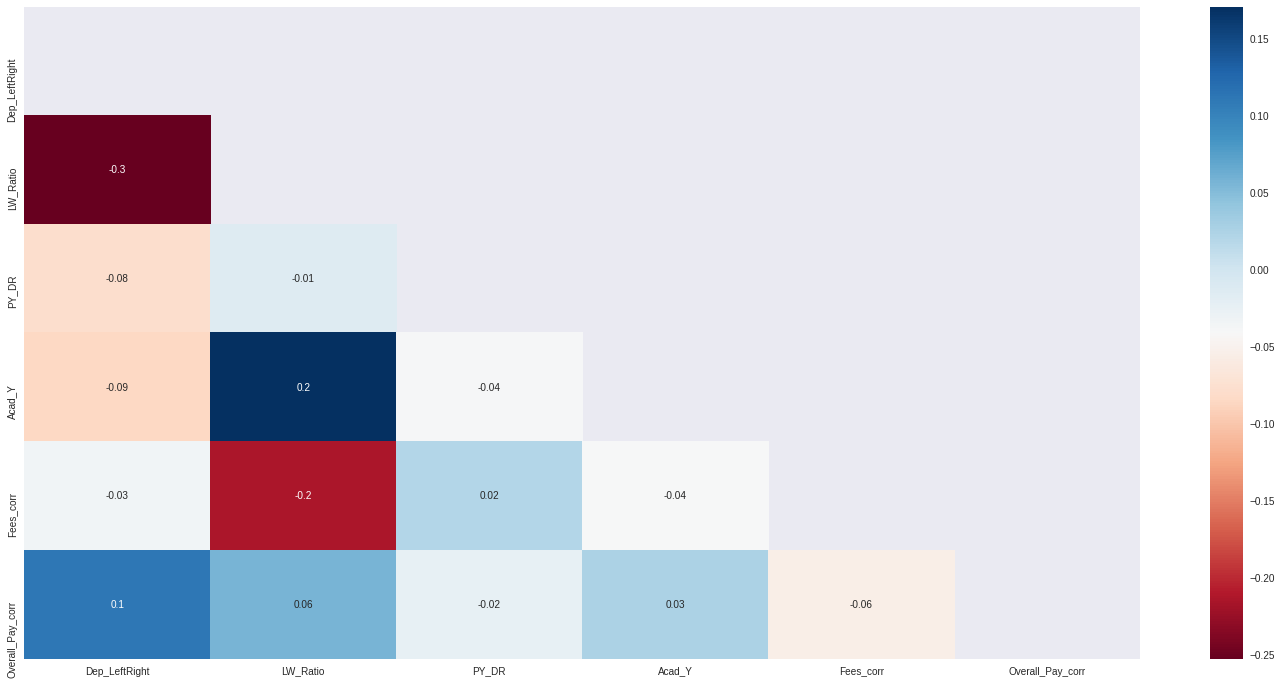

In [ ]:
corrmat = corrmat_FINAL.corr()
top_corr_features = corrmat.index

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,12))
# plt.legend(loc='left')
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map

# plot heat map
g=sns.heatmap(corrmat_FINAL[top_corr_features].corr(),annot=True,cmap="RdBu", mask=mask, fmt='.1g')

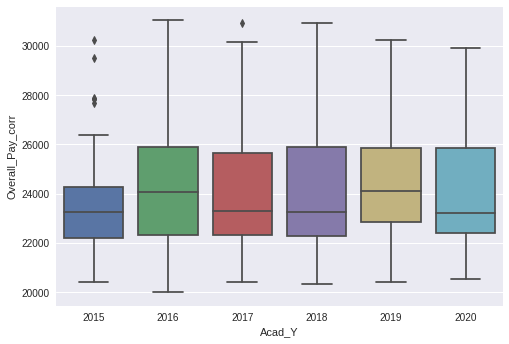

In [ ]:
sns.boxplot( x=corrmat_FINAL["Acad_Y"], y=corrmat_FINAL["Overall_Pay_corr"] )

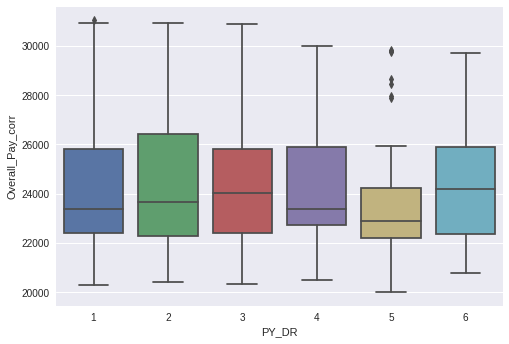

In [ ]:
sns.boxplot(x=corrmat_FINAL["PY_DR"], y=corrmat_FINAL["Overall_Pay_corr"] )

## ANOVA USING STATSMODELS

In [ ]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
stip_statsmodel = stip_no_other_unideptAbove6[['', '', '']]

In [ ]:
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)', data=data).fit()

In [ ]:
stip_no_other.Dep_DR_top14.unique()

array(['BusinessAndManagement', 'MathematicsAndComputer Science',
       'HistPolSoc', 'ArtsAndTheology', 'Medical', 'Engineering',
       'LinguisticsAndCommunication', 'Biology', 'Chemistry',
       'PhysicsAndAstronomy', 'Education', 'Geography'], dtype=object)

In [ ]:
stip_no_other['Dep_LeftRight'] = stip_no_other.Dep_DR_top14.replace([('BusinessAndManagement', 'MathematicsAndComputer Science', 'Medical', 'Engineering', 'Biology', 'Chemistry',
       'PhysicsAndAstronomy', 'Geography')], 'Left')
stip_no_other['Dep_LeftRight'] = stip_no_other.Dep_LeftRight.replace([('HistPolSoc', 'ArtsAndTheology', 'LinguisticsAndCommunication', 'Education')], 'Right')

In [ ]:
stip_no_other['Dep_LeftRight'].value_counts(dropna=False)

Left     1982
Right    1072
Name: Dep_LeftRight, dtype: int64

In [ ]:
# forget about Northeast etc... I have coordinates only for the top 20+20 of the 6+ unixdept-cats... ;( ...

In [ ]:
# no need to include OP_corr into this model -> no added value, if several perfectly correlating values are included! ... ...

# do not include GPs for 3/9/12m as numerical values, but use a binary for summer job yes/no

In [ ]:
no_3M = stip_no_other.loc[stip_no_other.GrossPay_3M == 0]
len(no_3M)

2678

In [ ]:
per_12M = stip_no_other.loc[stip_no_other.GrossPay_9M == 0]
len(per_12M)

2099

In [ ]:
per_9M = stip_no_other.loc[stip_no_other.GrossPay_12M == 0]
len(per_9M)

958

In [ ]:
# idea: those who earn sth either for 12M or for 9+3 will obviously earn more than those who "don't work in summer" -> distinguish the 9M-without-3M-additional-pay from the rest:



In [ ]:
stip_no_other.shape

(3054, 28)

In [ ]:
stip_no_other.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 8706
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   University       3054 non-null   object 
 1   Department       3054 non-null   object 
 2   Overall_Pay      3050 non-null   object 
 3   LW_Ratio         3054 non-null   float64
 4   Academic_Year    3054 non-null   object 
 5   Program_Year     3054 non-null   object 
 6   12_M_Gross_Pay   2096 non-null   object 
 7   9_M_Gross_Pay    955 non-null    object 
 8   3_M_Gross_Pay    376 non-null    object 
 9   Fees             1175 non-null   object 
 10  Comments         863 non-null    object 
 11  PY_DR            3054 non-null   Int64  
 12  Acad_Y           3054 non-null   Int64  
 13  Overall_Pay_num  3054 non-null   Int64  
 14  GrossPay_12M     3054 non-null   Int64  
 15  GrossPay_9M      3054 non-null   Int64  
 16  GrossPay_3M      3054 non-null   Int64  
 17  GrossPay_sumOf

In [ ]:
# include AcadY from 2015-2020 only (heavily skewed distribution)

stip_no_other = stip_no_other.drop(stip_no_other[(stip_no_other.Acad_Y < 2015)].index)
stip_no_other.shape

(2706, 28)

In [ ]:
stip_no_other = stip_no_other.drop(stip_no_other[(stip_no_other.Acad_Y > 2020)].index)
stip_no_other.shape

(2706, 28)

In [ ]:
stip_no_other['Obs_Year'] = stip_no_other.Acad_Y - 2014

In [ ]:
stip_no_other.Obs_Year.value_counts(dropna=False)

2      717
4      600
5      499
3      452
6      268
1      170
NaN      0
Name: Obs_Year, dtype: Int64

In [ ]:
stip_LinReg = stip_no_other[['Dep_LeftRight', 'Obs_Year', 'PY_DR', 'LW_Ratio', 'Fees_correct', 'Overall_Pay_num']]    # add the 3M criterion in addition, after finding out & ... code again ...

In [ ]:
stip_LinReg.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2706 entries, 0 to 8305
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dep_LeftRight    2706 non-null   object 
 1   Obs_Year         2706 non-null   Int64  
 2   PY_DR            2706 non-null   Int64  
 3   LW_Ratio         2706 non-null   float64
 4   Fees_correct     2706 non-null   Int64  
 5   Overall_Pay_num  2706 non-null   Int64  
dtypes: Int64(4), float64(1), object(1)
memory usage: 158.6+ KB


In [ ]:
# version 1: use stip - Universities with >=20 students, but including combis with less than 6 students -> -> decided to use "no-other" version to be able to include dept in some way into my regression
# for LinReg, would be nice to have also Uni and Dept in some form encoded into numerical vars ... for Uni -> use 0/1 for long/lat each -> forget it! I have these values for 20 unis only!! -> restrict to a sub-df. .......

In [ ]:
# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce

pd.pandas.set_option('display.max_columns', None)

In [ ]:
stip_LinReg_num_only = stip_no_other[['Acad_Y', 'PY_DR', 'LW_Ratio', 'Fees_correct', 'Overall_Pay_num']]

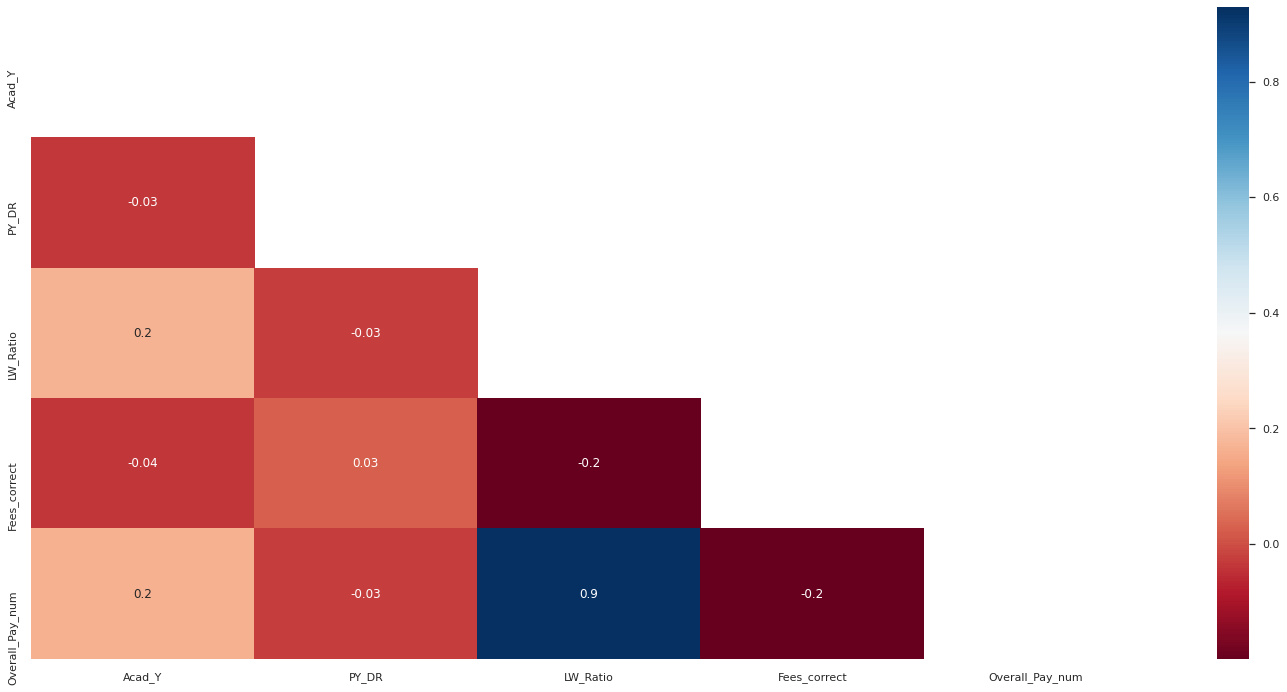

In [ ]:
#get correlations of each features in dataset
corrmat = stip_LinReg_num_only.corr()
top_corr_features = corrmat.index

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,12))
# plt.legend(loc='left')
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map

# plot heat map
g=sns.heatmap(stip_LinReg_num_only[top_corr_features].corr(),annot=True,cmap="RdBu", mask=mask, fmt='.1g')

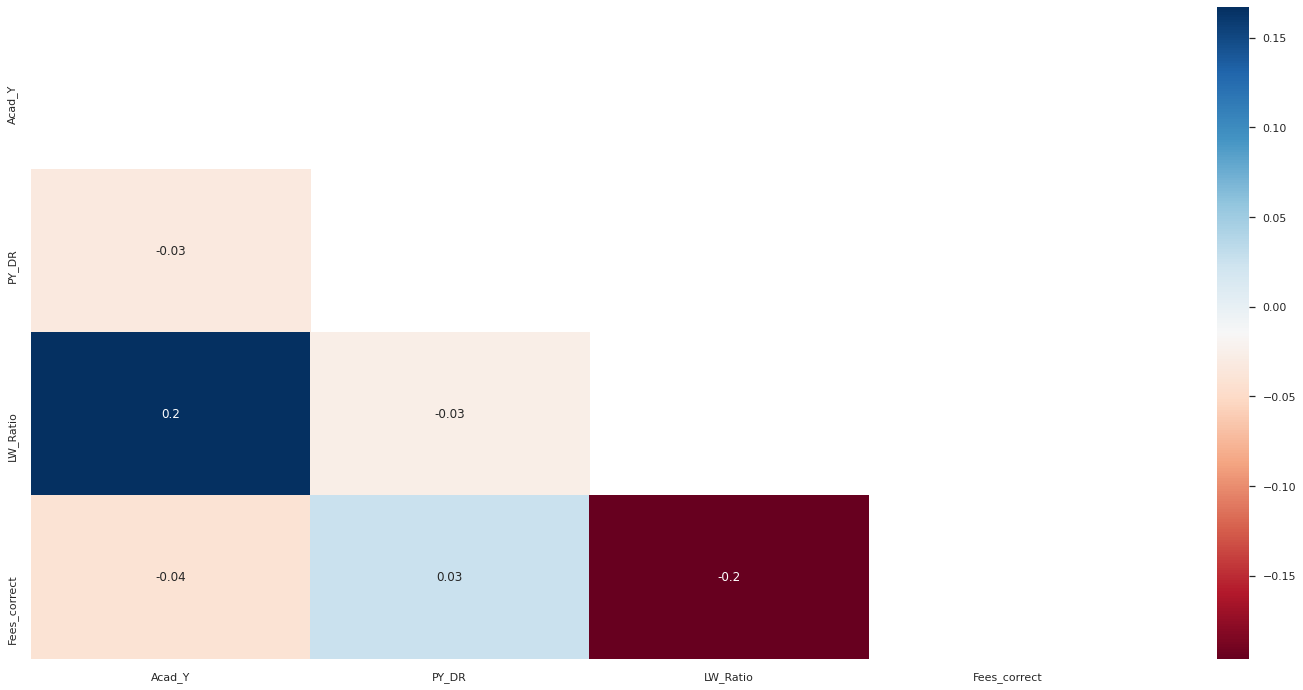

In [ ]:
# NO CORRELATIONS :) -> GOOD! my features are independent of each other :)

#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,12))
# plt.legend(loc='left')
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map

# plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdBu", mask=mask, fmt='.1g')

In [ ]:
X = stip_LinReg.drop(['Overall_Pay_num'], axis=1)

In [ ]:
y = stip_LinReg.Overall_Pay_num

In [ ]:
# find categorical variables

categorical = [var for var in X.columns if X[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


In [ ]:
categorical

['Dep_LeftRight']

In [ ]:
# make a list of the numerical variables first
numerical = [var for var in X.columns if X[var].dtype!='O']    # and var != 'Household_Key' and var != 'Individual_Key' <- no such keys this time ... all truly numerical

print('There are {} numerical variables'.format(len(numerical)))

There are 4 numerical variables


In [ ]:
numerical

['Obs_Year', 'PY_DR', 'LW_Ratio', 'Fees_correct']

In [ ]:
# let's visualize the values of the discrete variables
discrete = []

for var in numerical:
    if len(X[var].unique()) < 20:
        print(var, ' values: ', X[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

Obs_Year  values:  <IntegerArray>
[6, 5, 1, 3, 2, 4]
Length: 6, dtype: Int64
PY_DR  values:  <IntegerArray>
[1, 2, 3, 4, 5, 6]
Length: 6, dtype: Int64

There are 2 discrete variables


In [ ]:
discrete

['Obs_Year', 'PY_DR']

In [ ]:
continuous = [var for var in X.columns if X[var].dtype!='O' and var not in discrete] #and X!='survived' and var != 'Individual_Key'
continuous

['LW_Ratio', 'Fees_correct']

In [ ]:
# let's output variables with NA and the percentage of NA -> no NA! :)

for var in X.columns:
    if X[var].isnull().sum() > 0:
        print(var, X[var].isnull().mean())

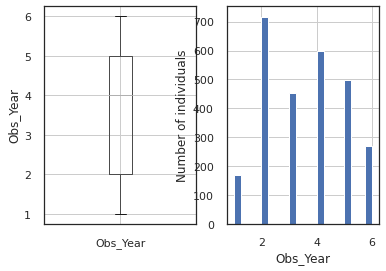

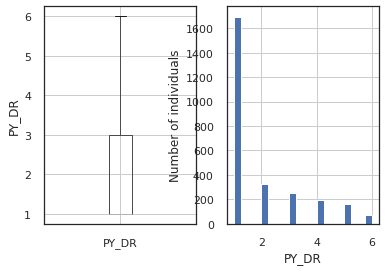

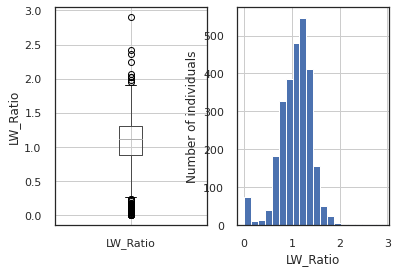

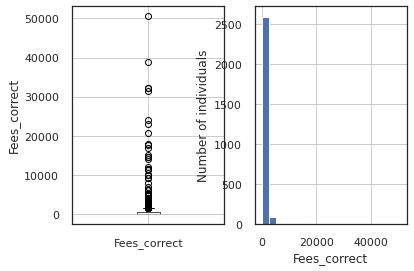

In [ ]:
# PY_DR: oversampling py 2-6 might be an option? probably BETTER: Variable Transformation!! for program year + fees!?!!
# keep in mind that my DATASET IS HEAVILY SKEWED TOWARDS 1ST YEAR STUDENTS!!!!
# Also Fees_correct are heavily left-skewed!!

# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in numerical:
    plt.figure(figsize=(6,4))
    plt.subplot(1, 2, 1)
    fig = X.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = X[var].hist(bins=20)
    fig.set_ylabel('Number of individuals')
    fig.set_xlabel(var)

    plt.show()

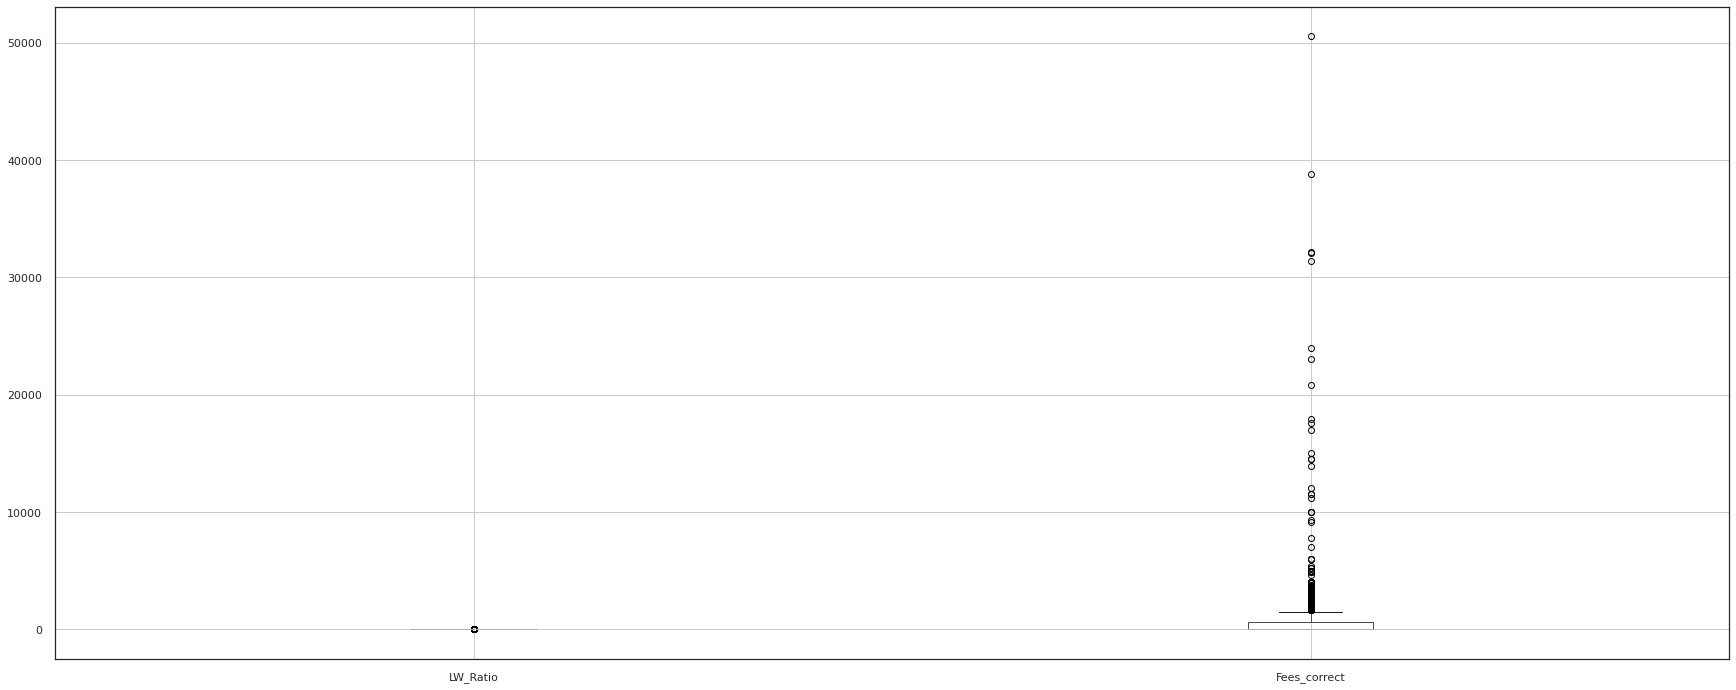

In [ ]:
# outliers

X[continuous].boxplot(figsize=(30,12))

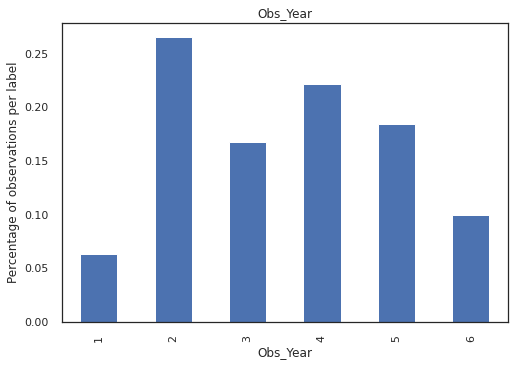

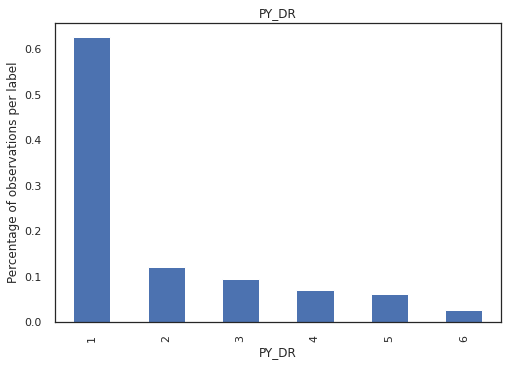

In [ ]:
# outliers in discrete variables

for var in discrete:
    (X.groupby(var)[var].count() / np.float(len(X))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

In [ ]:
# feature magnitude # FEES ARE DISTURBING LIKE CRAZY!?!??!!!

X.describe()

Obs_Year        PY_DR     LW_Ratio  Fees_correct
count  2706.000000  2706.000000  2706.000000   2706.000000
mean      3.497044     1.898004     1.077384    621.394678
std       1.456260     1.402117     0.324759   2189.421365
min       1.000000     1.000000     0.000000      0.000000
25%       2.000000     1.000000     0.880000      0.000000
50%       4.000000     1.000000     1.110000      0.000000
75%       5.000000     3.000000     1.300000    600.000000
max       6.000000     6.000000     2.900000  50555.000000

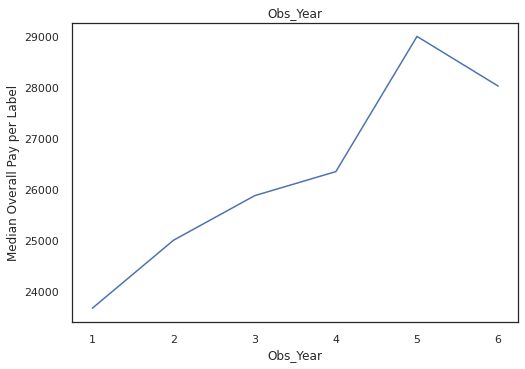

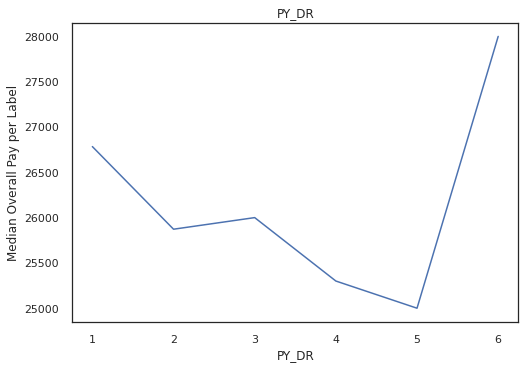

In [ ]:
# 4th & 5th year students seem to differ from the rest in some way .... -> check, whether e.g. LW_Ratio Areas are overrepresented here? Or less students earning money also in summer months?
# tryout mean instead of median to get rid of the fact, that most members cause 0 costs, lol... ...if I work with revenue for AAA instead of ERS costs 1, I get rid of the 0-bias :) :)
# -> -> these plots probably just represent the fact, that the average member produced ZERO costs to AAA! -> engineer this ERS cost variable differently..?!!?!?

for var in discrete:
    stip_LinReg.groupby(var)['Overall_Pay_num'].median().plot()
#     clean_rows.groupby(var)['ERS_Member_Cost_Year_1'].median().plot()
    plt.ylabel('Median Overall Pay per Label')
    plt.title(var)
    plt.show()

Text(0, 0.5, 'Number of different categories')

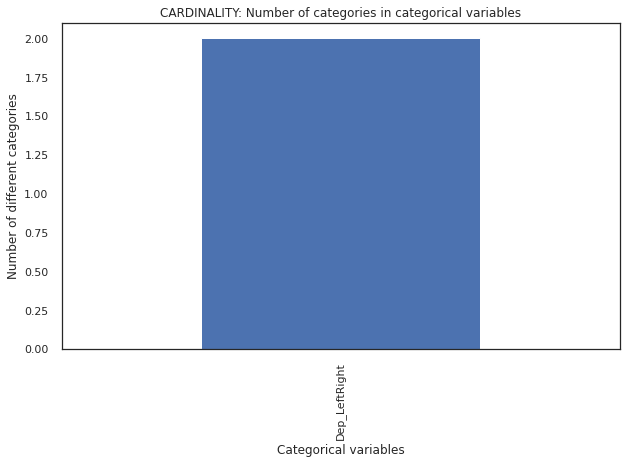

In [ ]:
# plot number of categories per categorical variable

X[categorical].nunique().plot.bar(figsize=(10,6))
plt.title('CARDINALITY: Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories')

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1894, 5), (812, 5))

In [ ]:
# Building the Pipeline - Instantiate all tools I want to use:                   # add sth to transform the skewed variables in a later step :)))

# Equal Frequency Discretizer:                                    # try Discretization plus categorical encoding (Sole chpt. 85)
EqualFreqDiscretiser = dsc.EqualFrequencyDiscretiser(q=10, variables=['Fees_correct',
 'LW_Ratio'], return_object=True) 
# Ordinal Categorical Encoder:
OrdCatEnc = ce.OrdinalCategoricalEncoder(encoding_method = 'ordered', variables=['Fees_correct',
 'LW_Ratio'])

categorical_OHE = ce.OneHotCategoricalEncoder(top_categories=None, variables=['Dep_LeftRight'], drop_last=True)

# transform numerical values to get rid of skewed distributions ? ........... aber die discretization macht ja nicht viel anderes?...

scaler = StandardScaler()                                                 # what exactly will be scaled? discrete AND continuous???

# SMOTE
# smt =  SMOTE(random_state=42)                                   # run it for the product part!!! ;)

# oversampling_SMOTE(X_train, y_train, path)                      # (dont know how to call Rai's fct within the pipeline...)

# Logistic Regression                                             # for PDGMLAI: had used Lasso Reg, since feature space was large -> sparsity ...
reg = LinearRegression()


In [ ]:
X_train_transformed3

Obs_Year  PY_DR  LW_Ratio  Fees_correct  Dep_LeftRight_Left
6142         2      1         2             2                   1
7036         2      3         5             3                   0
1296         5      6         6             2                   0
2612         4      3         7             3                   0
6342         2      5         0             3                   0
...        ...    ...       ...           ...                 ...
5283         3      1         3             3                   0
2390         4      1         0             2                   0
2618         5      1         4             0                   1
5027         2      3         4             1                   1
7798         2      2         6             0                   1

[1894 rows x 5 columns]

In [ ]:
X_train_transformed1 = EqualFreqDiscretiser.fit_transform(X_train)
X_train_transformed2 = OrdCatEnc.fit_transform(X_train_transformed1, y_train)

X_train_transformed3 = categorical_OHE.fit_transform(X_train_transformed2)

# categorical vars to drop from transf5 before applying ssc.... :
# X_train_transformed6_droppedCats = X_train_transformed6.drop(['''], axis=1)     # das macht FE wohl ganz von alleine :D lol!!!!

X_train_transformed4 = scaler.fit_transform(X_train_transformed3)                 # it would probably be much wiser to just subtract 2014 years from my year values!?!??? -> try!    

In [ ]:
X_train_final = pd.DataFrame(X_train_transformed4, columns = X_train_transformed3.columns)

In [ ]:
scaler.mean_

array([3.50739176, 1.94878564, 4.44350581, 2.40654699, 0.63357973])

In [ ]:
y_train

6142    18440
7036    29000
1296    32400
2612    32000
6342    14400
        ...  
5283    20000
2390    12550
2618    23806
5027    23334
7798    25600
Name: Overall_Pay_num, Length: 1894, dtype: Int64

In [ ]:
# let's fit the Linear Regressor (pipeline)
reg.fit(X_train_final, y_train)

# let's get the predictions
X_train_preds = reg.predict(X_train_final)

In [ ]:
X_test_transformed1 = EqualFreqDiscretiser.transform(X_test)
X_test_transformed2 = OrdCatEnc.transform(X_test_transformed1)

X_test_transformed3 = categorical_OHE.transform(X_test_transformed2)

# categorical vars to drop from transf5 before applying ssc.... :
# X_train_transformed6_droppedCats = X_train_transformed6.drop(['''], axis=1)     # das macht FE wohl ganz von alleine :D lol!!!!

X_test_transformed4 = scaler.transform(X_test_transformed3)

In [ ]:
X_test_final = pd.DataFrame(X_test_transformed4, columns = X_test_transformed3.columns)

In [ ]:
X_test_preds = reg.predict(X_test_final)
X_test_preds

array([31590.29669758, 29671.21712119, 27069.25657664, 13568.01964263,
       22112.08780262, 29652.58102587, 22631.15736704, 27643.63169921,
       32273.17766575, 29862.66387813, 29766.94049966, 14736.61202062,
       17140.06614252, 32368.90104422, 32203.15004833, 32847.55278832,
       29315.95896051, 38007.14202106, 19940.53310974, 32350.26494889,
       24563.01941055, 29575.49374272, 22343.98723163, 37751.48642315,
       17263.42487419, 19414.40387959, 14180.87299337, 24448.65993675,
       29766.94049966, 32184.513953  , 14755.24811595, 32254.54157042,
       19914.83734869, 29575.49374272, 37458.46265953, 19359.09832144,
       32368.90104422, 14180.87299337, 32847.55278832, 35545.23671135,
       29678.27678691, 21872.39515325, 20054.89258353, 19646.3033086 ,
       17331.51289946, 22535.43398857, 29671.21712119, 37189.92861945,
       26618.27503748, 21846.6993922 , 32375.96070994, 29827.33127963,
       14666.5844032 , 29862.66387813, 27164.97995511, 26877.80981969,
      

In [ ]:
from math import sqrt

In [ ]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 17018542.772294182
train rmse: 4125.353654208834
train r2: 0.7637549303381214

test mse: 17088192.92840031
test rmse: 4133.78675410335
test r2: 0.7333979265112149


Text(0, 0.5, 'Predicted Overall Pay')

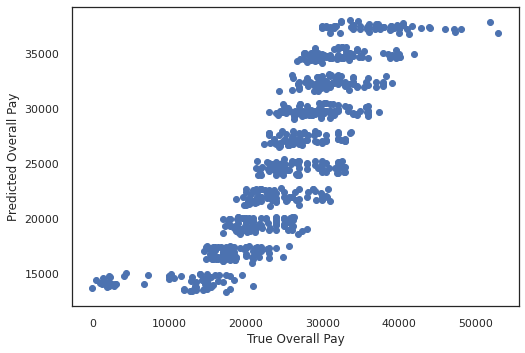

In [ ]:
# plot predictions vs real value -> my LinReg overestimates very low & underestimates very high OP values ...

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Overall Pay')
plt.ylabel('Predicted Overall Pay')

In [ ]:
# capture the column names for use later in the notebook
final_columns = X_train_final.columns

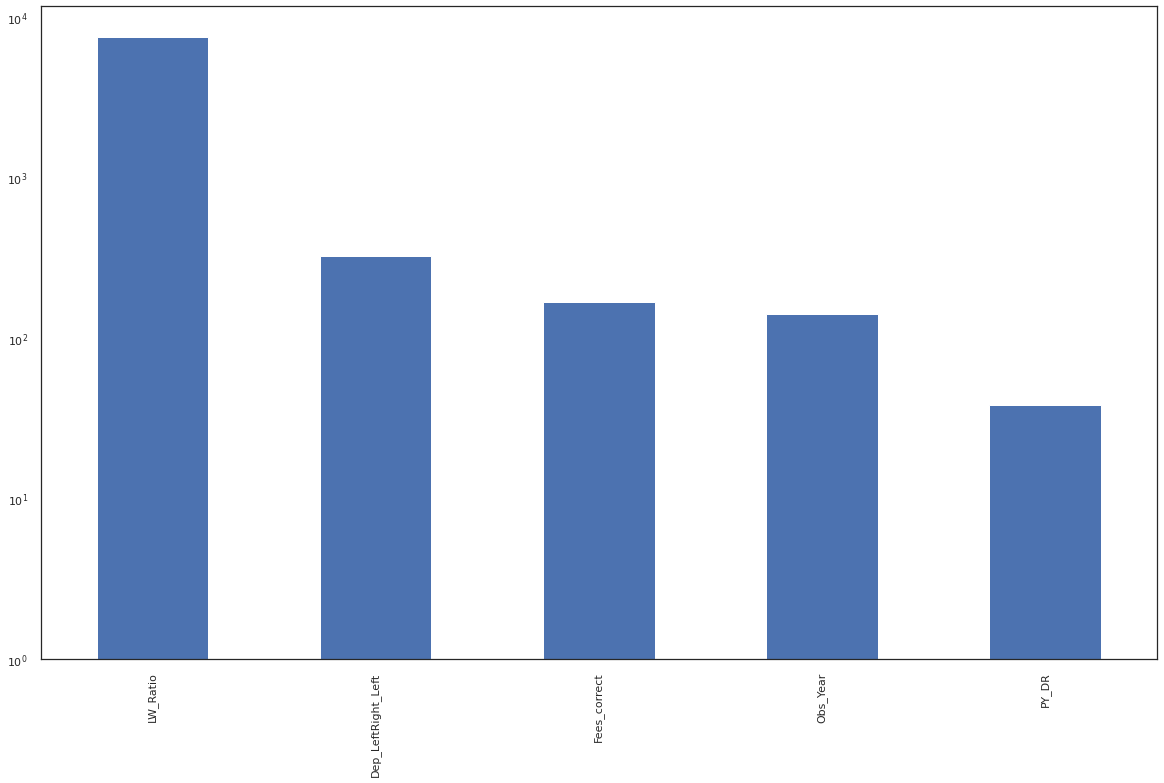

In [ ]:
# LOL !!! how 

# let's explore the importance of the features
# the importance is given by the absolute value of the coefficient
# assigned by the Lasso
importance = pd.Series(np.abs(reg.coef_))
importance.index = list(final_columns)   # +['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na'] - we don't need any additional ... these here were created last minute based on datetime vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(20,12), log=True)

In [ ]:
# why are my coefs all the same ???

coef_df = pd.DataFrame({'features': X_test_final.columns, 'coefs': reg.coef_[0]})  
coef_df

features       coefs
0            Obs_Year -139.689412
1               PY_DR -139.689412
2            LW_Ratio -139.689412
3        Fees_correct -139.689412
4  Dep_LeftRight_Left -139.689412

## IMPUTATION OF MISSING FEES USING K-NN - not necessary, gross-overall=fees ...

In [ ]:
# !!! replace by Dep_DR... after having cleaned the cat vars !!!

# TRY! use k-NN to estimate fees from other vars!!! they miss in >50% of the otherwise clean dataset, but contain other valuable info in these 3587 rows!!!


### Drop irrelevant categories
stip_for_kNN = stip.copy()[['University', 'Department', 'Acad_Y', 'PY_DR', 'Fees_num', 'LW_Ratio']]


### Drop "Fees" for purposes of KNN imputation:
y_target = stip_for_kNN.Fees_num
stip_kNN = stip_kNN.drop(['Fees_num'], axis = 1)  
stip_kNN.head()




# delete all observations with missing fees                                       .... >50% of data!!! if Universities were cleaned, I could roughly estimate fees from University+Dept+year

# stip = stip.drop(stip[(stip.Fees_num.isna() == True)].index)
# stip.shape

(2723, 19)

In [ ]:
### Adding dummy variables for categorical vars

to_dummy = ['University','Department']
stip_kNN = pd.get_dummies(stip_kNN, prefix = to_dummy, columns = to_dummy, drop_first = True)

stip_kNN.head()

In [ ]:
### Splitting data - on whether or not "Fees" are specified.

# Training data -- "Fees_num" Not null; "Fees_num" as target
train = stip_kNN[stip_kNN.Fees_num.notnull()]
X_train = train.drop(['Fees_num'], axis = 1)
y_train = train.Fees_num


# Data to impute, -- Where Fees_num is null; Remove completely-null "Fees_num" column.
impute = stip_kNN[stip_kNN.Fees_num.isnull()].drop(['Fees_num'], axis = 1)
print("Data to Impute")
print(impute.head(3))

# import algorithm
from sklearn.neighbors import KNeighborsRegressor

# Instantiate
knr = KNeighborsRegressor()

# Fit
knr.fit(X_train, y_train)

# Create Predictions
imputed_fees = knr.predict(impute)

# Add to Df
impute['Fees_num'] = imputed_fes
print("\nImputed Fees")
print(impute.head(3))

# Re-combine dataframes
stip_imputed = pd.concat([train, impute], sort = False, axis = 0)

# Return to original order - to match back up with "Survived"
stip_imputed.sort_index(inplace = True)
print("Shape with imputed values:", stip_imputed.shape)
print("Shape before imputation:", stip_knn.shape)
stip_imputed.head(7)